In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:01, 648.54it/s]
100%|██████████| 700/700 [00:08<00:00, 85.70it/s]
8400it [00:00, 225718.36it/s]
8400it [00:00, 224743.59it/s]
720it [00:03, 215.44it/s]
100%|██████████| 720/720 [00:08<00:00, 92.32it/s]
8280it [00:00, 231601.24it/s]
720it [00:01, 679.95it/s]
100%|██████████| 720/720 [00:08<00:00, 81.80it/s]
8280it [00:00, 228911.41it/s]
700it [00:00, 778.85it/s]
100%|██████████| 700/700 [00:08<00:00, 87.24it/s]
8280it [00:00, 231732.60it/s]
509it [00:00, 1096.68it/s]
100%|██████████| 509/509 [00:03<00:00, 169.31it/s]
3664it [00:00, 223276.96it/s]
700it [00:00, 742.75it/s]
100%|██████████| 700/700 [00:07<00:00, 87.55it/s]
8280it [00:00, 72421.90it/s]
700it [00:01, 400.73it/s]
100%|██████████| 700/700 [00:07<00:00, 87.84it/s]
8280it [00:00, 232562.81it/s]
710it [00:01, 368.13it/s]
100%|██████████| 710/710 [00:08<00:00, 92.90it/s]
8280it [00:00, 233319.03it/s]
710it [00:01, 361.21it/s]
100%|██████████| 710/710 [00:08<00:00, 84.68it/s]
8280it [00:00, 241149.03it/s]
710it [00:00, 7

In [8]:
len(data_train), len(data_val), len(data_test)

(8400, 8400, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [7]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [8]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [9]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [10]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.16857


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.064397
Epoch 1...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.09059


100%|██████████| 263/263 [00:20<00:00, 15.38it/s]


Mean val loss: 0.055551


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.087804


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.063394
EarlyStopping counter: 1 out of 5
Epoch 3...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.086095


100%|██████████| 263/263 [00:20<00:00, 15.41it/s]


Mean val loss: 0.051156


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.083482


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.056782
EarlyStopping counter: 1 out of 5
Epoch 5...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.082919


100%|██████████| 263/263 [00:20<00:00, 15.06it/s]


Mean val loss: 0.035725


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.081426


100%|██████████| 263/263 [00:20<00:00, 15.28it/s]


Mean val loss: 0.033099


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.080366


100%|██████████| 263/263 [00:20<00:00, 15.17it/s]


Mean val loss: 0.032364


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.079341


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.033713
EarlyStopping counter: 1 out of 5
Epoch 9...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.079393


100%|██████████| 263/263 [00:20<00:00, 15.30it/s]


Mean val loss: 0.03229


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.078747


100%|██████████| 263/263 [00:20<00:00, 15.35it/s]


Mean val loss: 0.028618


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.078161


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.031835
EarlyStopping counter: 1 out of 5
Epoch 12...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.078072


100%|██████████| 263/263 [00:20<00:00, 15.48it/s]


Mean val loss: 0.028455


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.078383


100%|██████████| 263/263 [00:20<00:00, 15.32it/s]


Mean val loss: 0.027877


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.077958


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.029637
EarlyStopping counter: 1 out of 5
Epoch 15...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.078094


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.028792
EarlyStopping counter: 2 out of 5
Epoch 16...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.078082


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.028037
EarlyStopping counter: 3 out of 5
Epoch 17...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.077553


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.032541
EarlyStopping counter: 4 out of 5
Epoch 18...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.077724


100%|██████████| 263/263 [00:20<00:00, 15.25it/s]


Mean val loss: 0.027706


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.076678


100%|██████████| 263/263 [00:20<00:00, 15.14it/s]


Mean val loss: 0.026705


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.076746


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.026894
EarlyStopping counter: 1 out of 5
Epoch 21...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.077208


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.033959
EarlyStopping counter: 2 out of 5
Epoch 22...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.076771
Epoch    22: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.027508
EarlyStopping counter: 3 out of 5
Epoch 23...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.076166


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.039769
EarlyStopping counter: 4 out of 5
Epoch 24...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.076033


100%|██████████| 263/263 [00:20<00:00, 15.18it/s]


Mean val loss: 0.026056


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.076122


100%|██████████| 263/263 [00:20<00:00, 15.18it/s]


Mean val loss: 0.026023


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.075633


100%|██████████| 263/263 [00:20<00:00, 15.42it/s]


Mean val loss: 0.025955


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.07616


100%|██████████| 263/263 [00:20<00:00, 15.38it/s]


Mean val loss: 0.025943


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 28...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.075839


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.026005
EarlyStopping counter: 1 out of 5
Epoch 29...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.074838


100%|██████████| 263/263 [00:20<00:00, 15.22it/s]


Mean val loss: 0.025745


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.075145


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025776
EarlyStopping counter: 1 out of 5
Epoch 31...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073586


100%|██████████| 263/263 [00:20<00:00, 15.23it/s]


Mean val loss: 0.025544


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 32...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.07357


100%|██████████| 263/263 [00:20<00:00, 15.06it/s]


Mean val loss: 0.025355


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 33...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073699


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025772
EarlyStopping counter: 1 out of 5
Epoch 34...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073921


100%|██████████| 263/263 [00:20<00:00, 15.45it/s]


Mean val loss: 0.02537


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 35...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073382


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.026071
EarlyStopping counter: 1 out of 5
Epoch 36...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073807


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025611
EarlyStopping counter: 2 out of 5
Epoch 37...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073628


100%|██████████| 263/263 [00:20<00:00, 15.24it/s]


Mean val loss: 0.025188


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 38...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073303


100%|██████████| 263/263 [00:20<00:00, 15.32it/s]


Mean val loss: 0.025141


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 39...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073434


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025363
EarlyStopping counter: 1 out of 5
Epoch 40...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073304


100%|██████████| 263/263 [00:20<00:00, 15.27it/s]


Mean val loss: 0.024728


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 41...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073113


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.024846
EarlyStopping counter: 1 out of 5
Epoch 42...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072795


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.024917
EarlyStopping counter: 2 out of 5
Epoch 43...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072944


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025138
EarlyStopping counter: 3 out of 5
Epoch 44...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.073251


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025187
EarlyStopping counter: 4 out of 5
Epoch 45...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072273


100%|██████████| 263/263 [00:20<00:00, 15.12it/s]


Mean val loss: 0.024503


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 46...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072619


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.024619
EarlyStopping counter: 1 out of 5
Epoch 47...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.0726


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.024981
EarlyStopping counter: 2 out of 5
Epoch 48...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072843
Epoch    48: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.02483
EarlyStopping counter: 3 out of 5
Epoch 49...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072341


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.025158
EarlyStopping counter: 4 out of 5
Epoch 50...


  0%|          | 0/263 [00:00<?, ?it/s]

Mean train loss: 0.072382


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.02459
EarlyStopping counter: 5 out of 5


100%|██████████| 259/259 [02:47<00:00,  1.66it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [16]:
model_conf

{'device': 'cpu', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [11]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

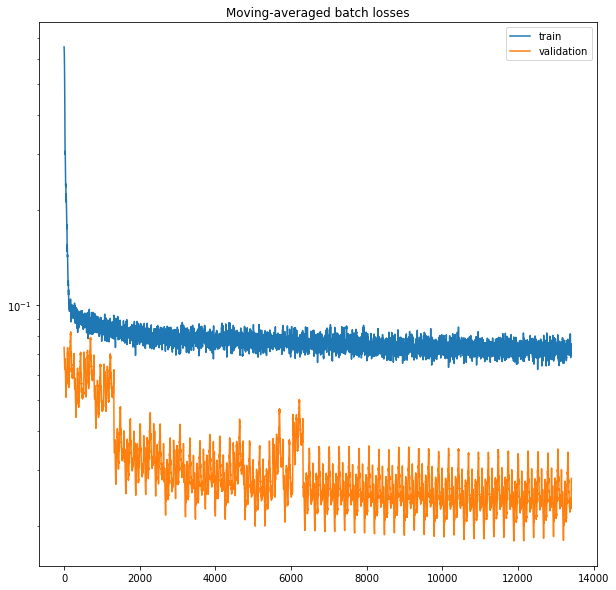

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

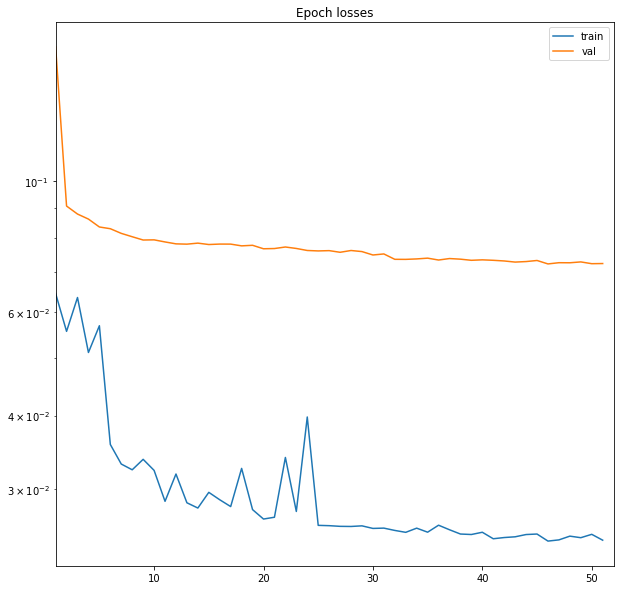

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample

In [26]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

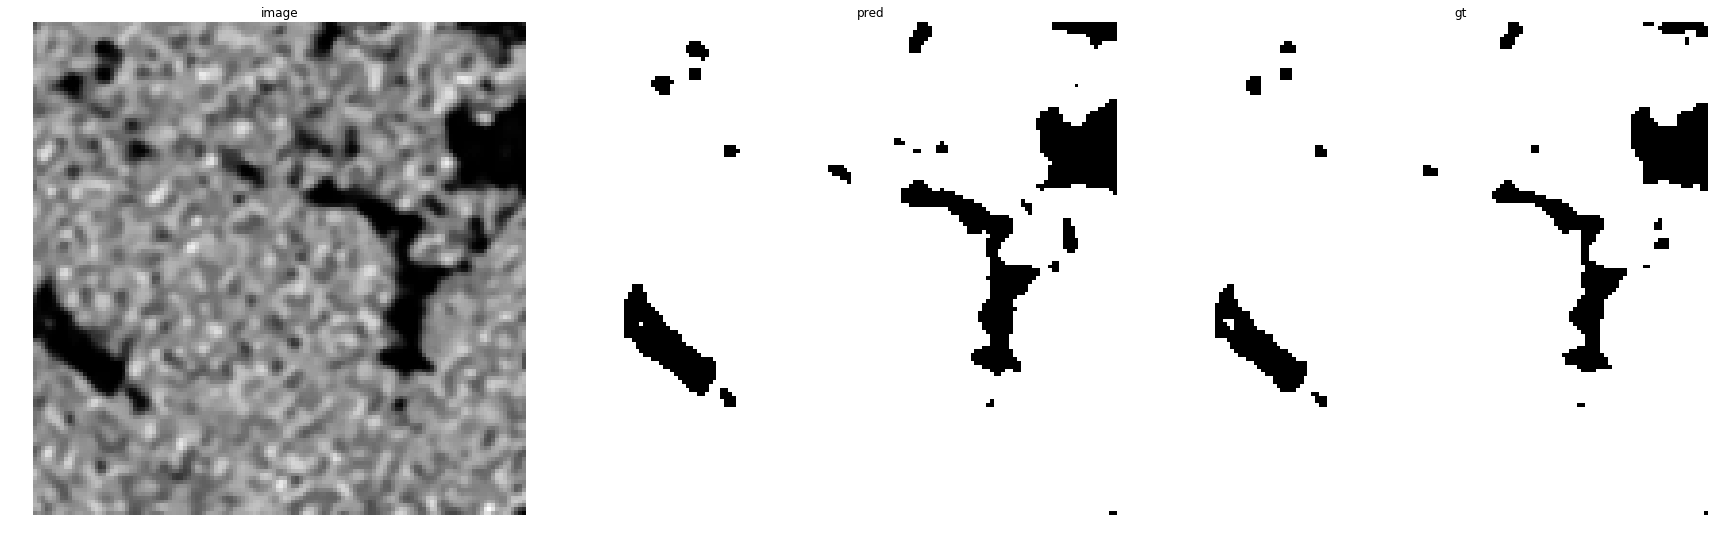

accuracy    : 0.98553466796875
precision   : 1.0
recall      : 0.9844559585492227
f1          : 0.9921671018276762
pr_auc      : 0.9999804638999577
iou         : 0.9844559585492227


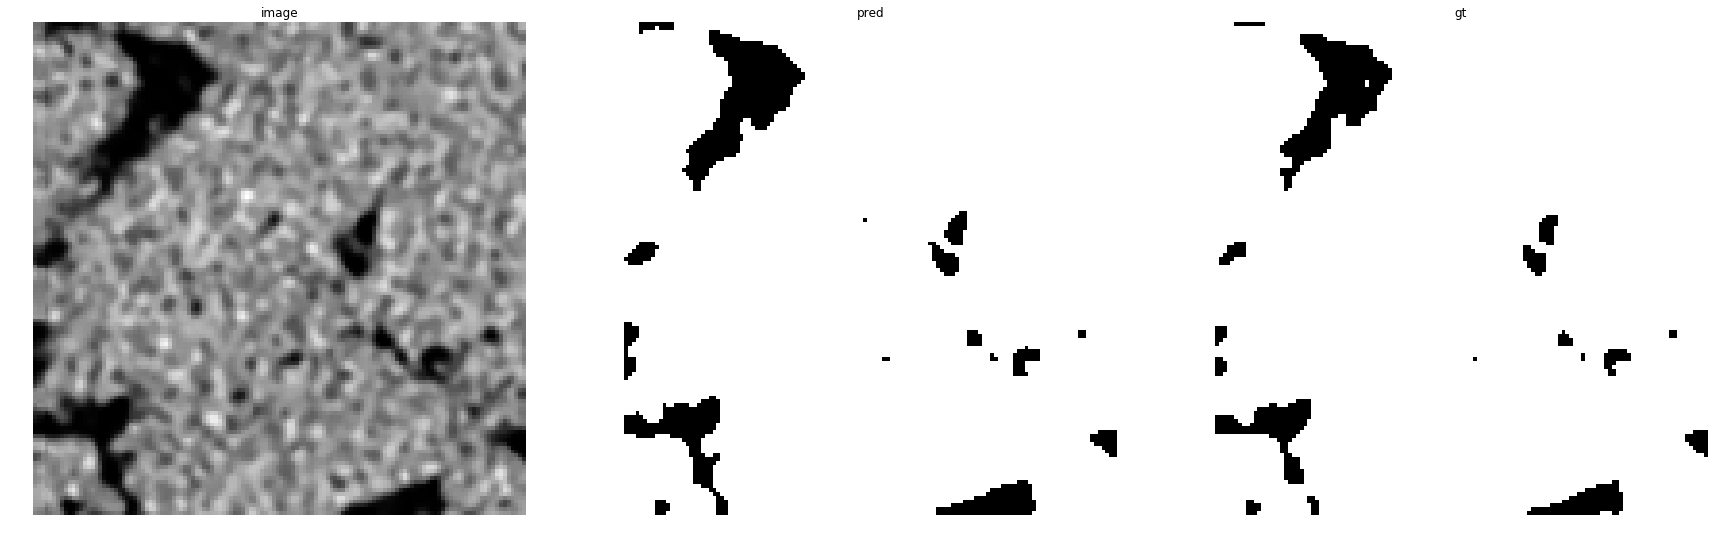

accuracy    : 0.98828125
precision   : 1.0
recall      : 0.9875162548764629
f1          : 0.9937189217482334
pr_auc      : 0.9999834061800462
iou         : 0.9875162548764629


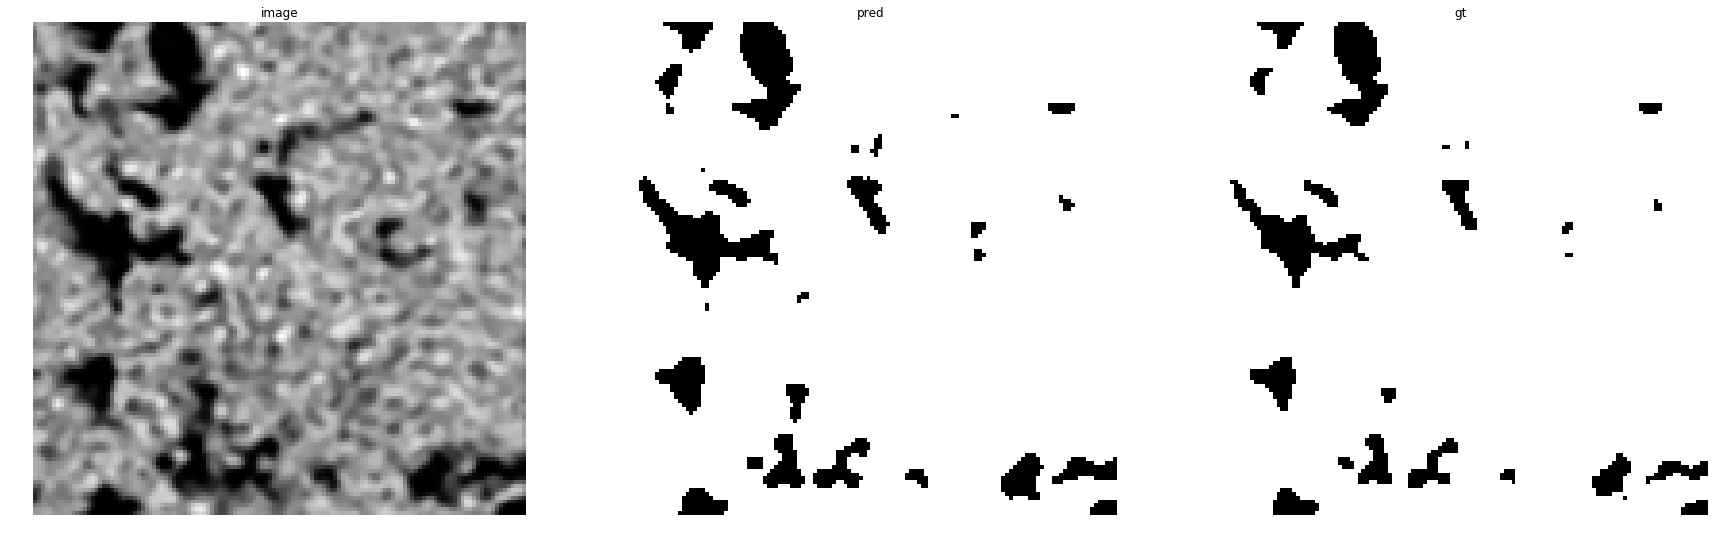

accuracy    : 0.9801025390625
precision   : 1.0
recall      : 0.9785568637768861
f1          : 0.9891622340425531
pr_auc      : 0.9999734645648266
iou         : 0.9785568637768861


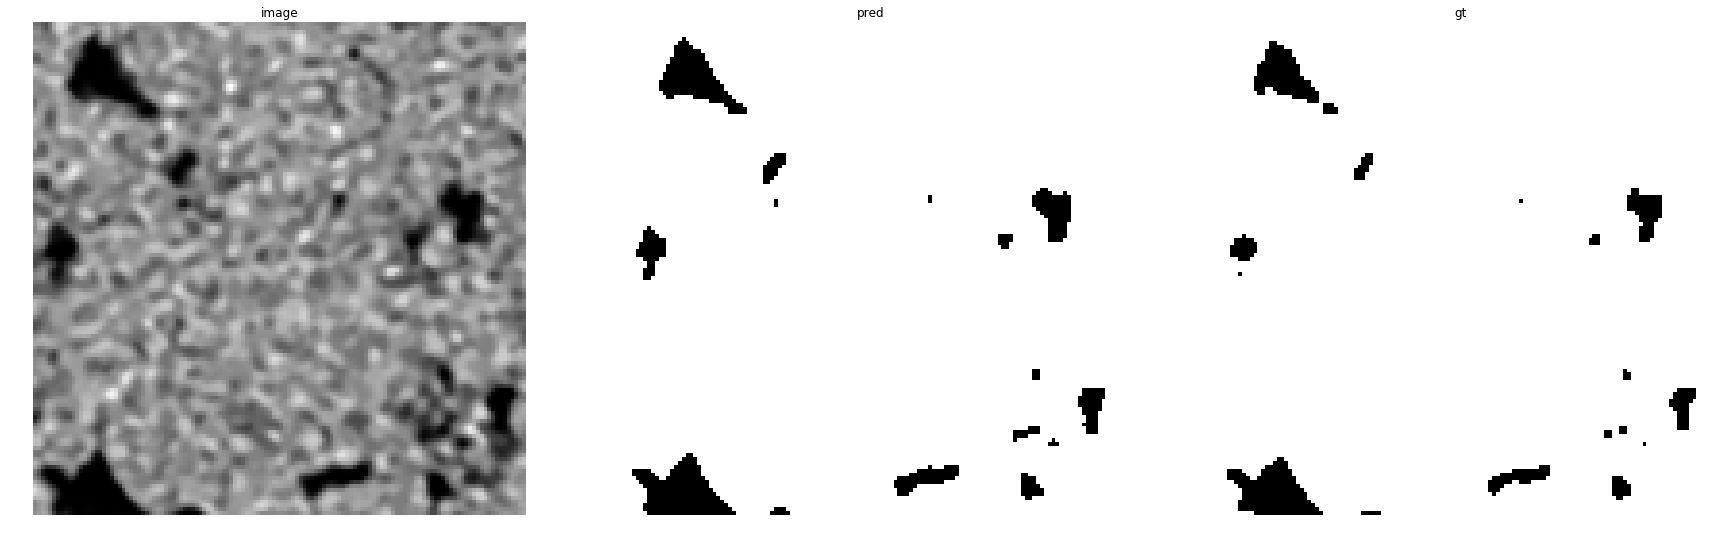

accuracy    : 0.99053955078125
precision   : 1.0
recall      : 0.9901405762992176
f1          : 0.9950458656950172
pr_auc      : 0.9999931404799937
iou         : 0.9901405762992176


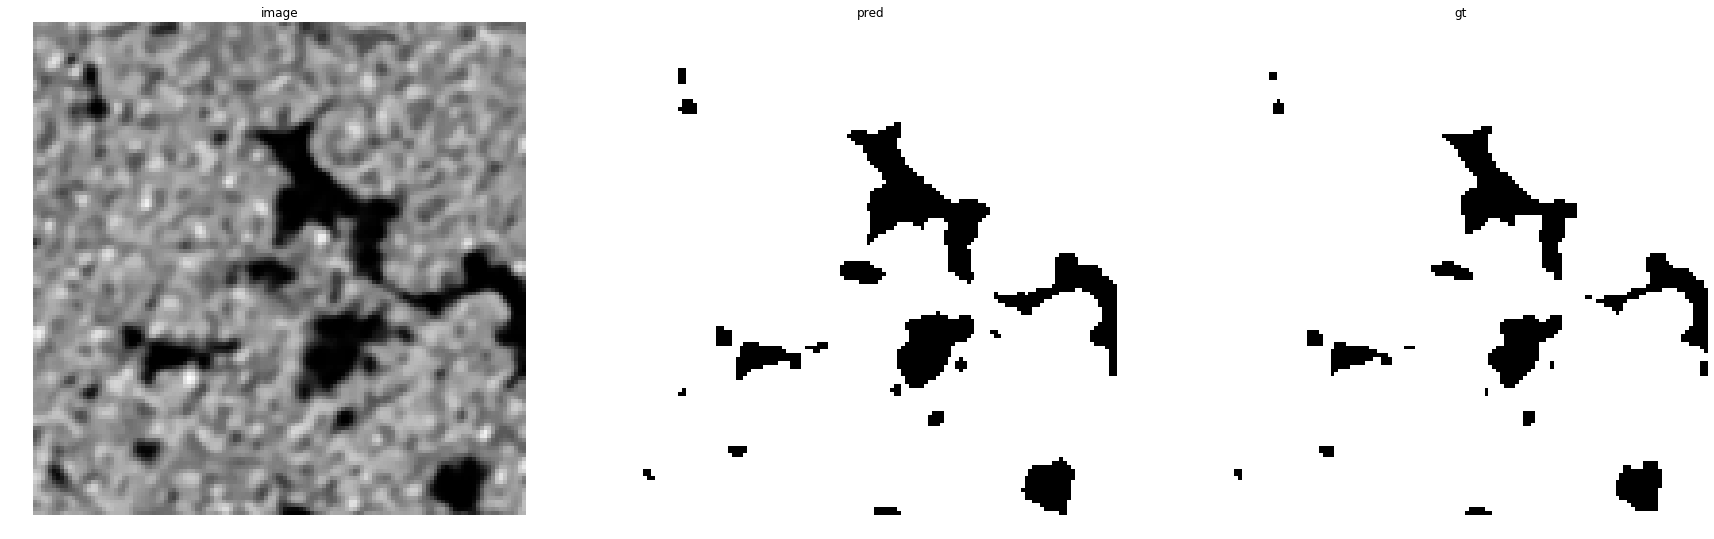

accuracy    : 0.98248291015625
precision   : 1.0
recall      : 0.9811716853637735
f1          : 0.9904963740521209
pr_auc      : 0.9999752547363848
iou         : 0.9811716853637735


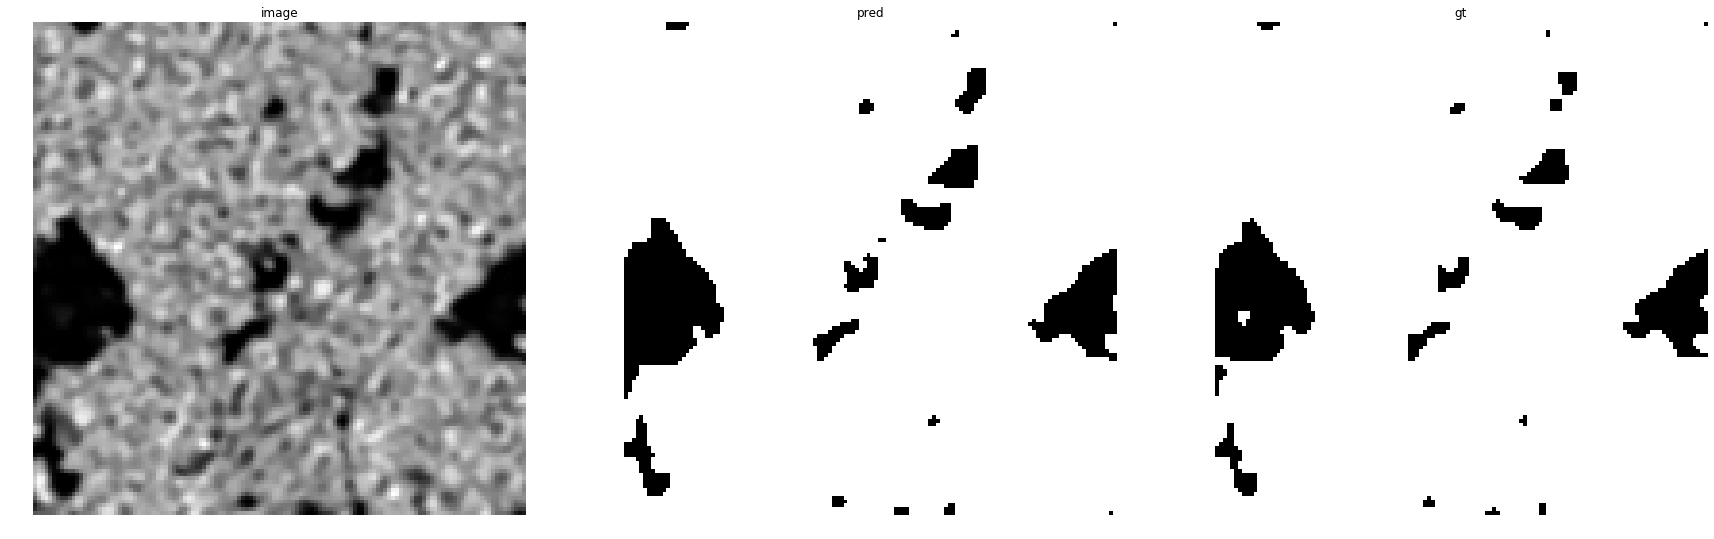

accuracy    : 0.9871826171875
precision   : 1.0
recall      : 0.9860158487048012
f1          : 0.9929586909871244
pr_auc      : 0.9999642853586399
iou         : 0.9860158487048012


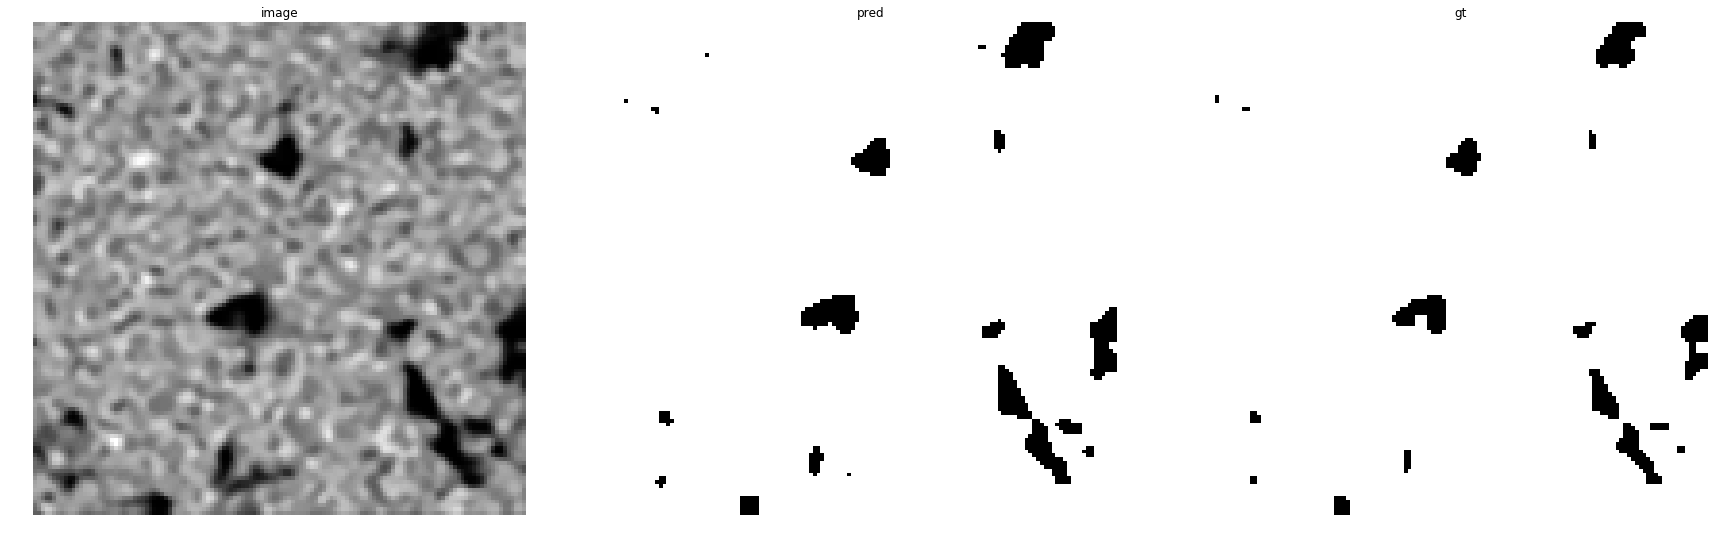

accuracy    : 0.99090576171875
precision   : 0.9999362976175309
recall      : 0.9906595140422846
f1          : 0.9952762895095584
pr_auc      : 0.9999942256299605
iou         : 0.9905969960873406


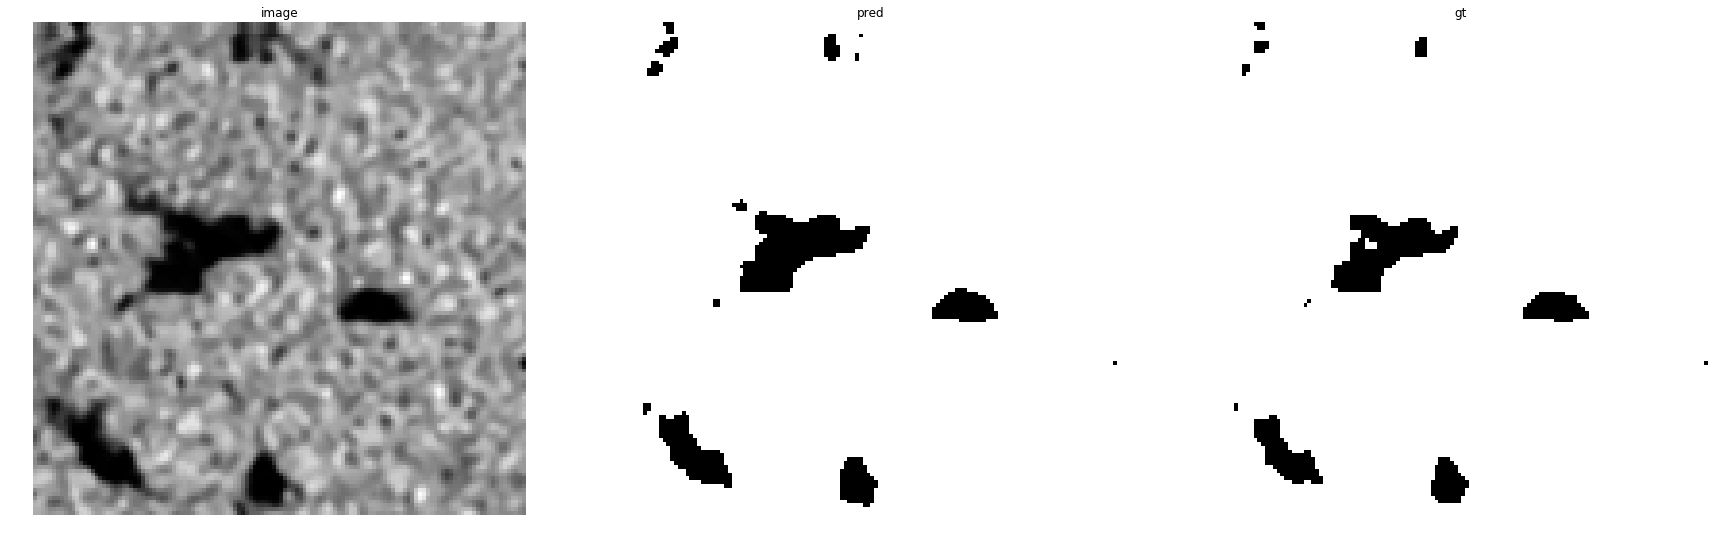

accuracy    : 0.99127197265625
precision   : 1.0
recall      : 0.9908725346269228
f1          : 0.9954153441697926
pr_auc      : 0.9999928487705749
iou         : 0.9908725346269228


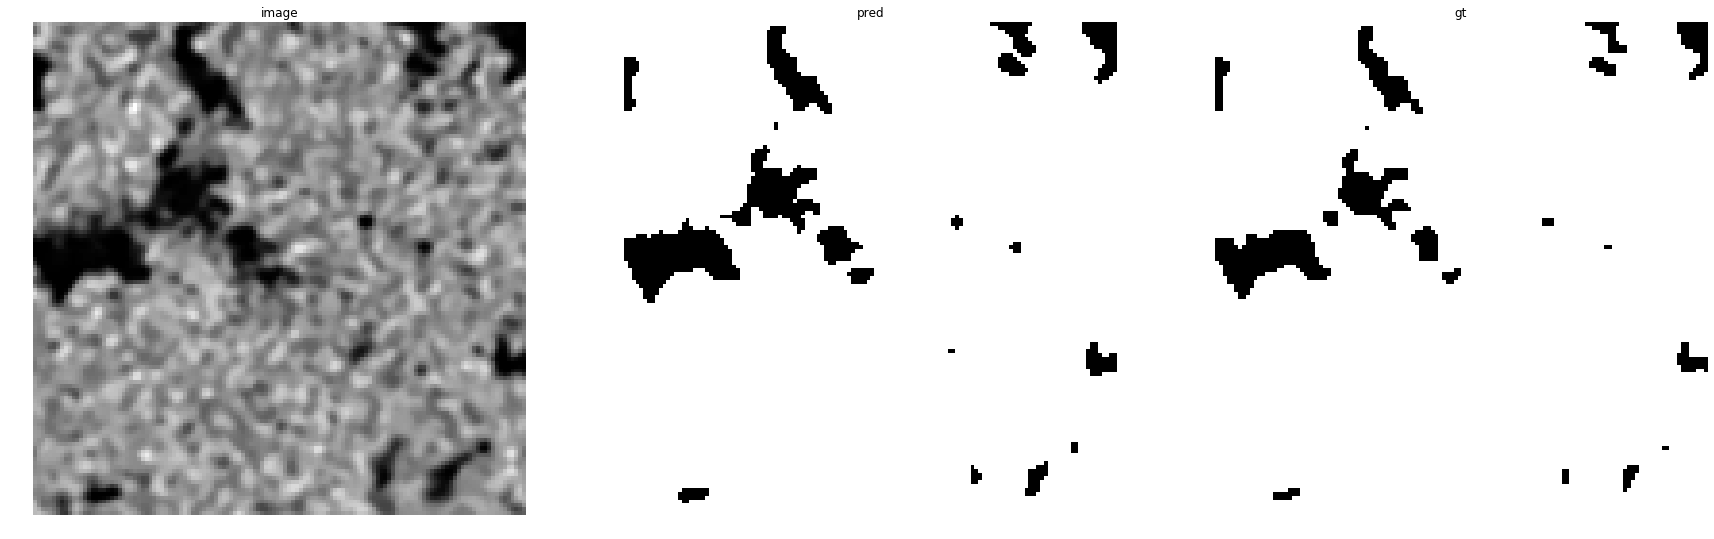

accuracy    : 0.98486328125
precision   : 1.0
recall      : 0.983946141895391
f1          : 0.9919081179848603
pr_auc      : 0.9999771935060902
iou         : 0.983946141895391


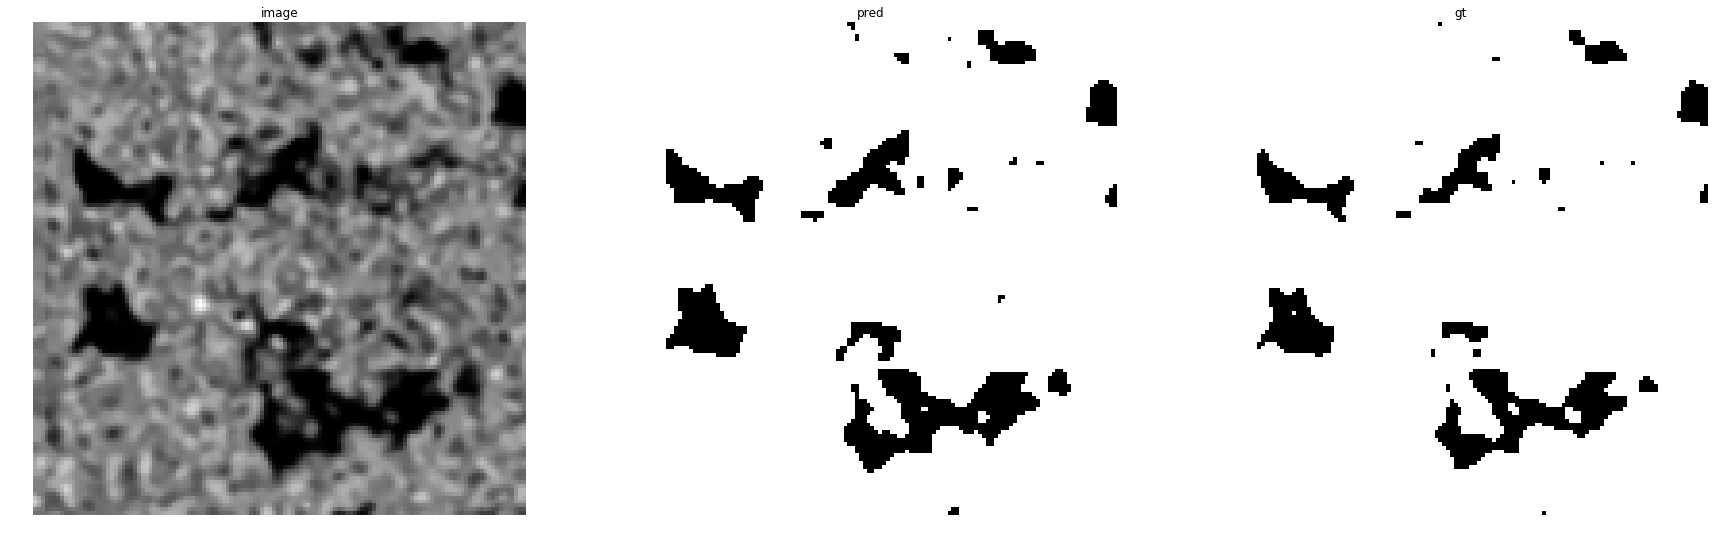

accuracy    : 0.9813232421875
precision   : 1.0
recall      : 0.9797458300238284
f1          : 0.9897693079237713
pr_auc      : 0.9999680967757921
iou         : 0.9797458300238284


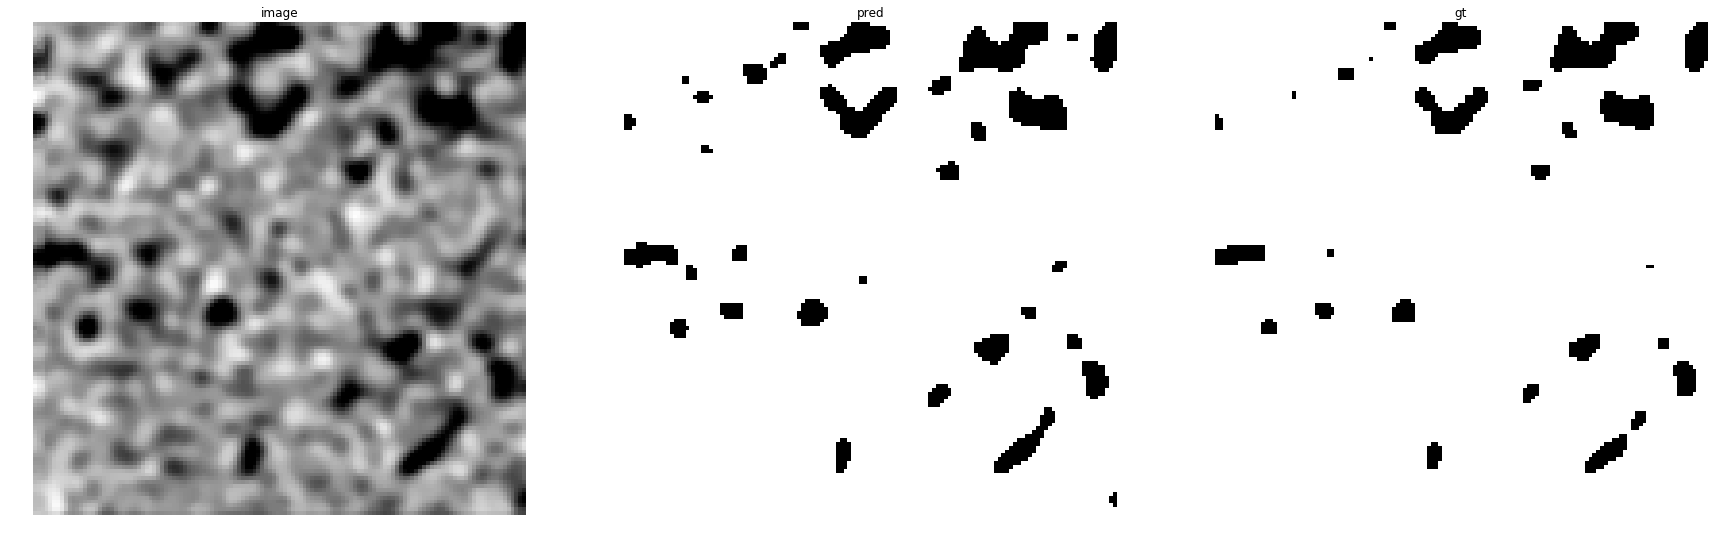

accuracy    : 0.98321533203125
precision   : 0.999933932346723
recall      : 0.9822181841780777
f1          : 0.9909968898346702
pr_auc      : 0.9999599909729886
iou         : 0.982154445165477


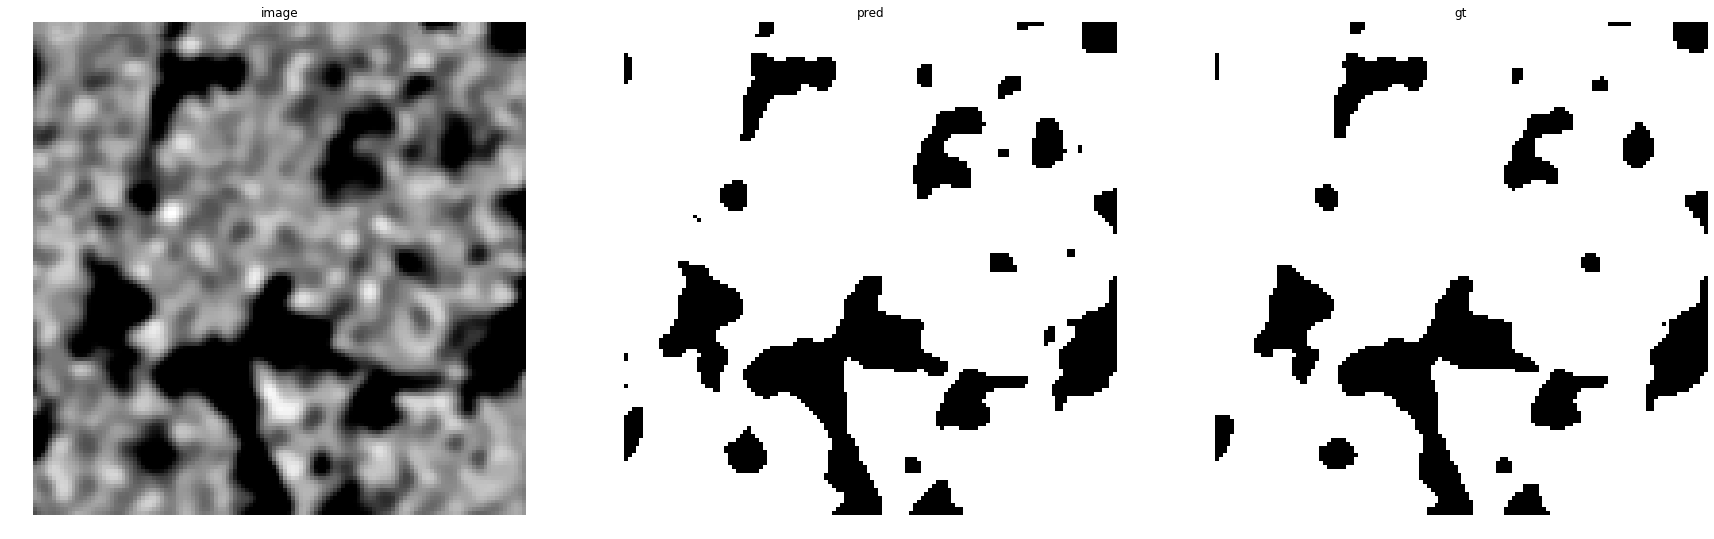

accuracy    : 0.97637939453125
precision   : 1.0
recall      : 0.9718463553033609
f1          : 0.9857221914775871
pr_auc      : 0.9998652607751839
iou         : 0.9718463553033609


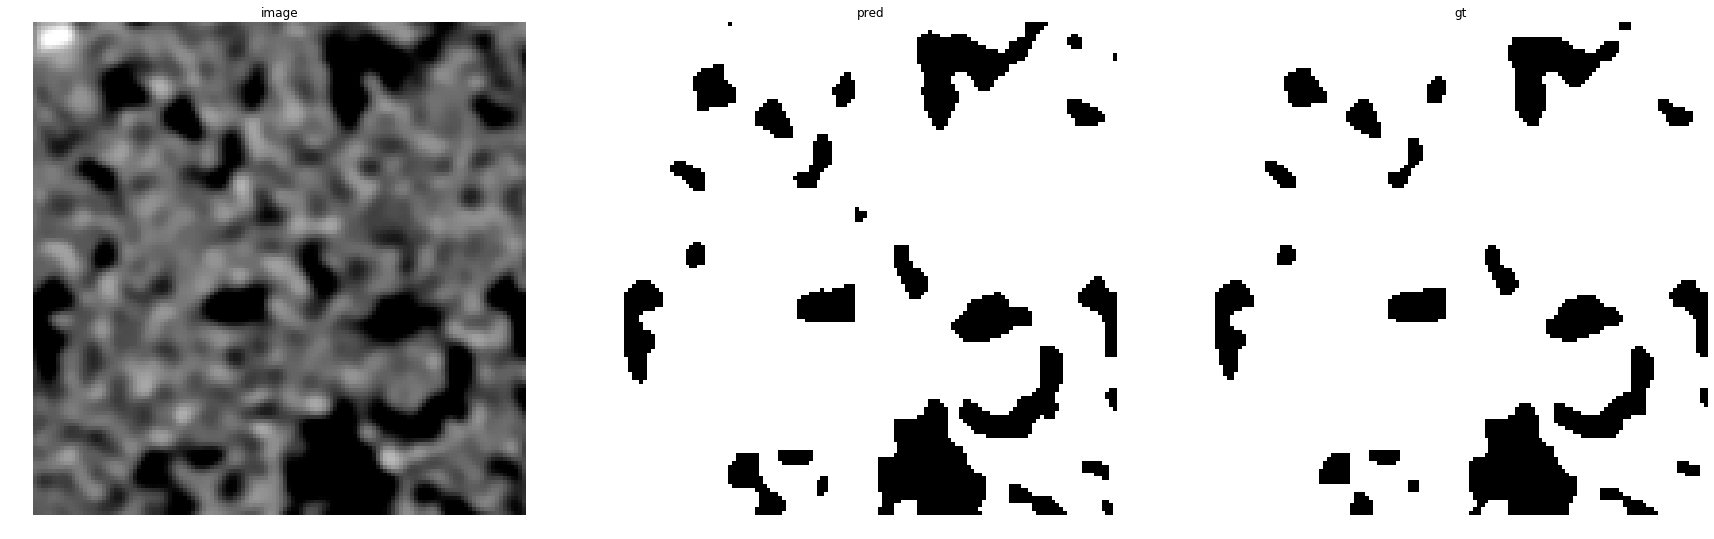

accuracy    : 0.980224609375
precision   : 0.999927927927928
recall      : 0.9772487145171516
f1          : 0.9884582502137362
pr_auc      : 0.9999141551941026
iou         : 0.9771798844907733


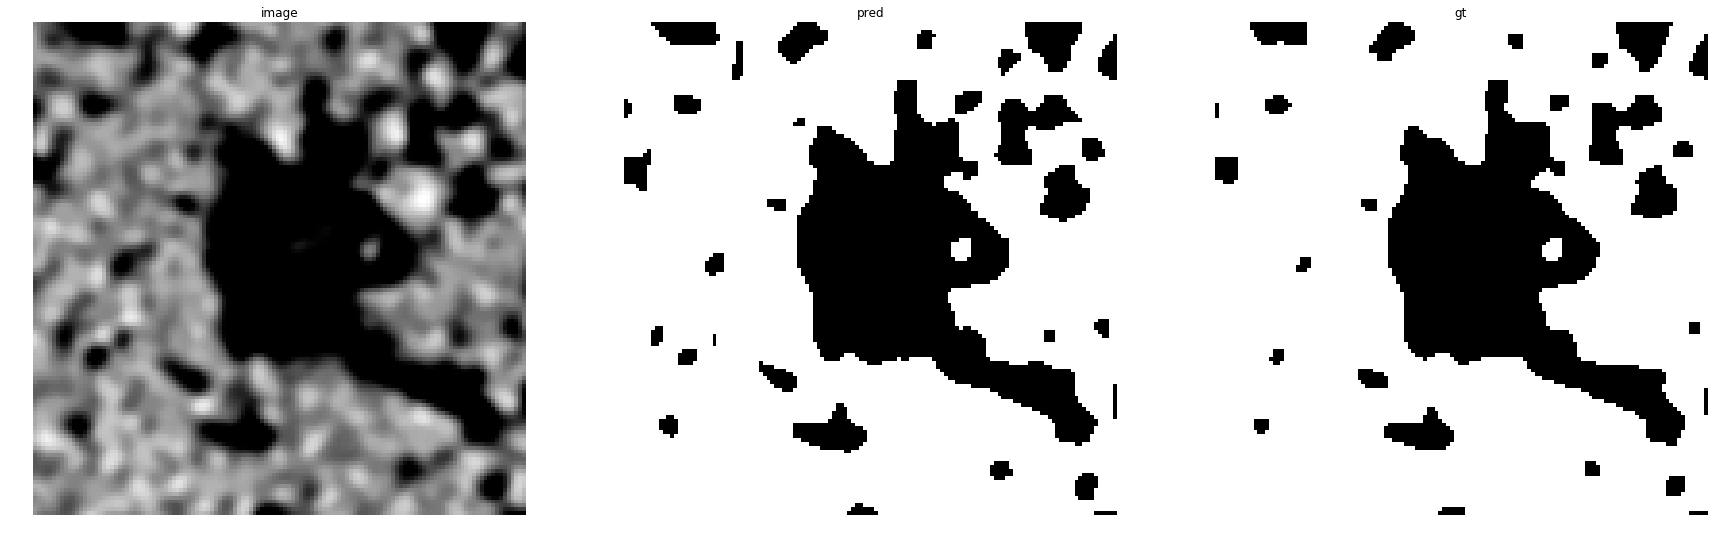

accuracy    : 0.97869873046875
precision   : 0.9995865034733709
recall      : 0.9723272464001287
f1          : 0.9857684622599193
pr_auc      : 0.9997898297671088
iou         : 0.9719363139273078


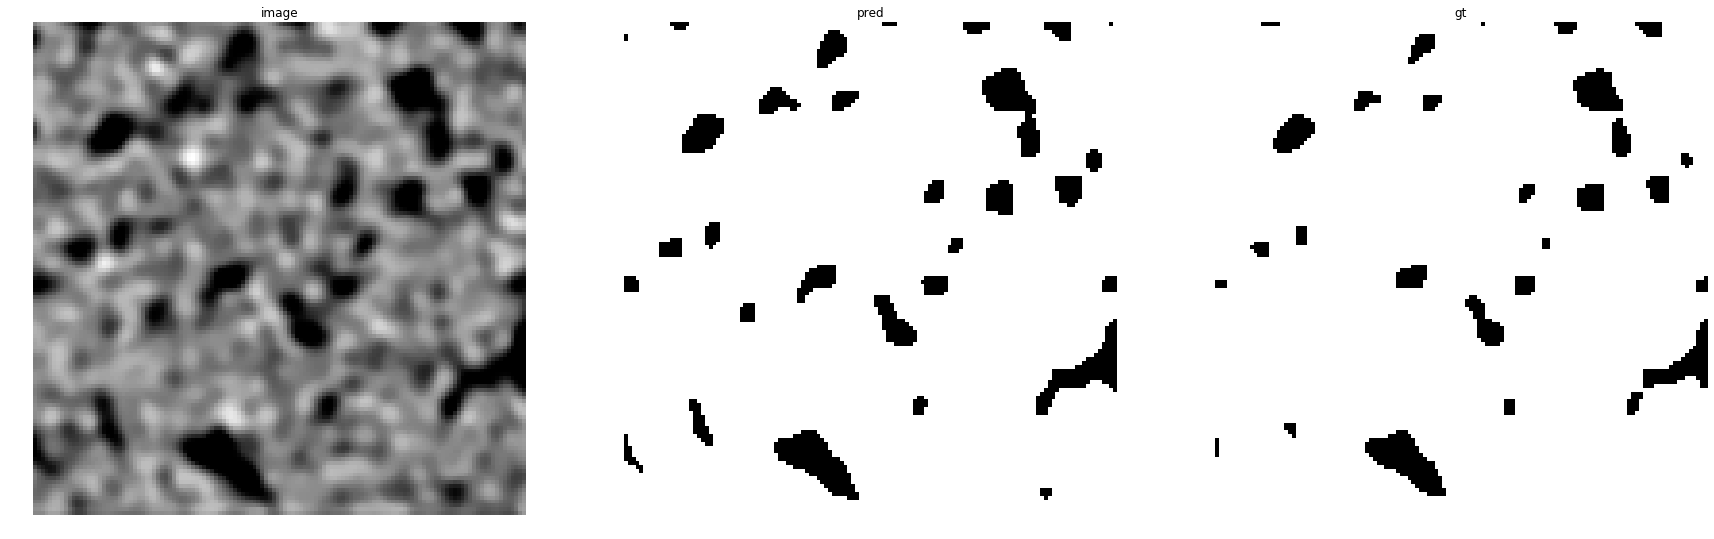

accuracy    : 0.97979736328125
precision   : 1.0
recall      : 0.9785399377593361
f1          : 0.9891535865255432
pr_auc      : 0.9999388095428243
iou         : 0.9785399377593361


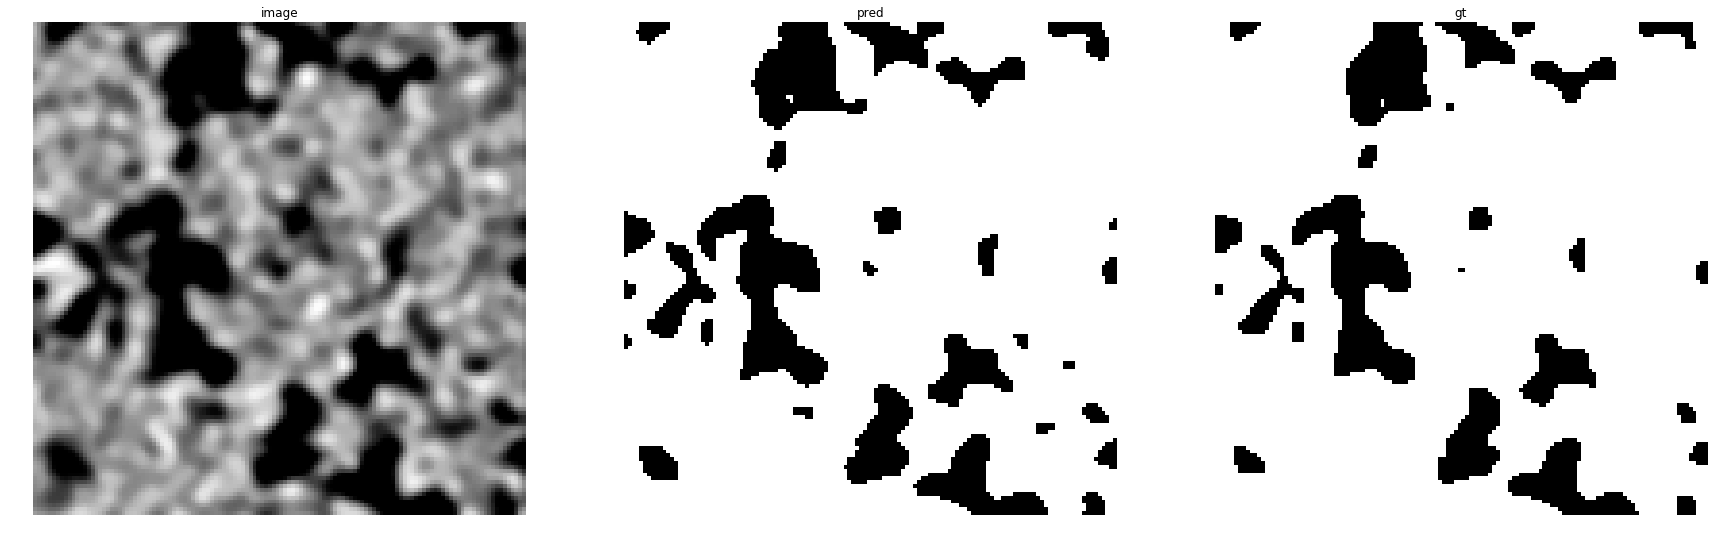

accuracy    : 0.9744873046875
precision   : 0.9995500562429697
recall      : 0.9700167382286587
f1          : 0.984561973703649
pr_auc      : 0.9997829178652258
iou         : 0.969593365825271


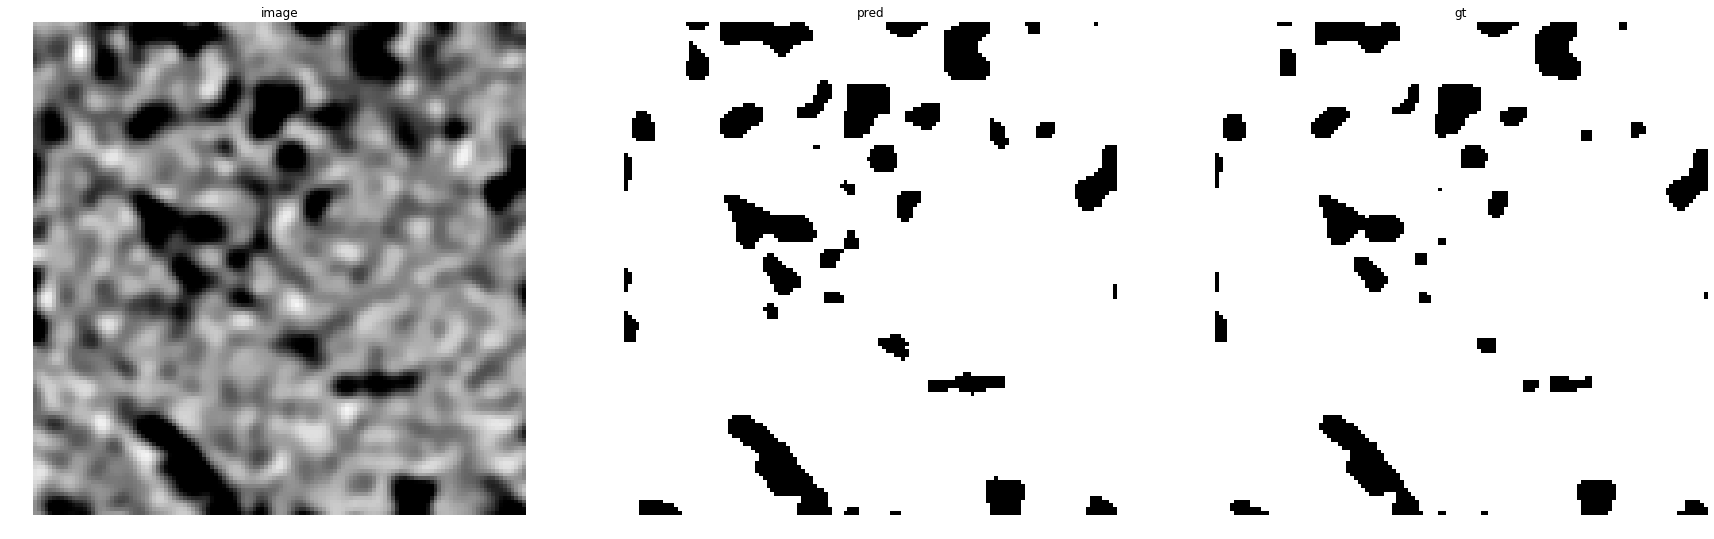

accuracy    : 0.9781494140625
precision   : 1.0
recall      : 0.9759489418878066
f1          : 0.9878280973752209
pr_auc      : 0.9999125160304569
iou         : 0.9759489418878066


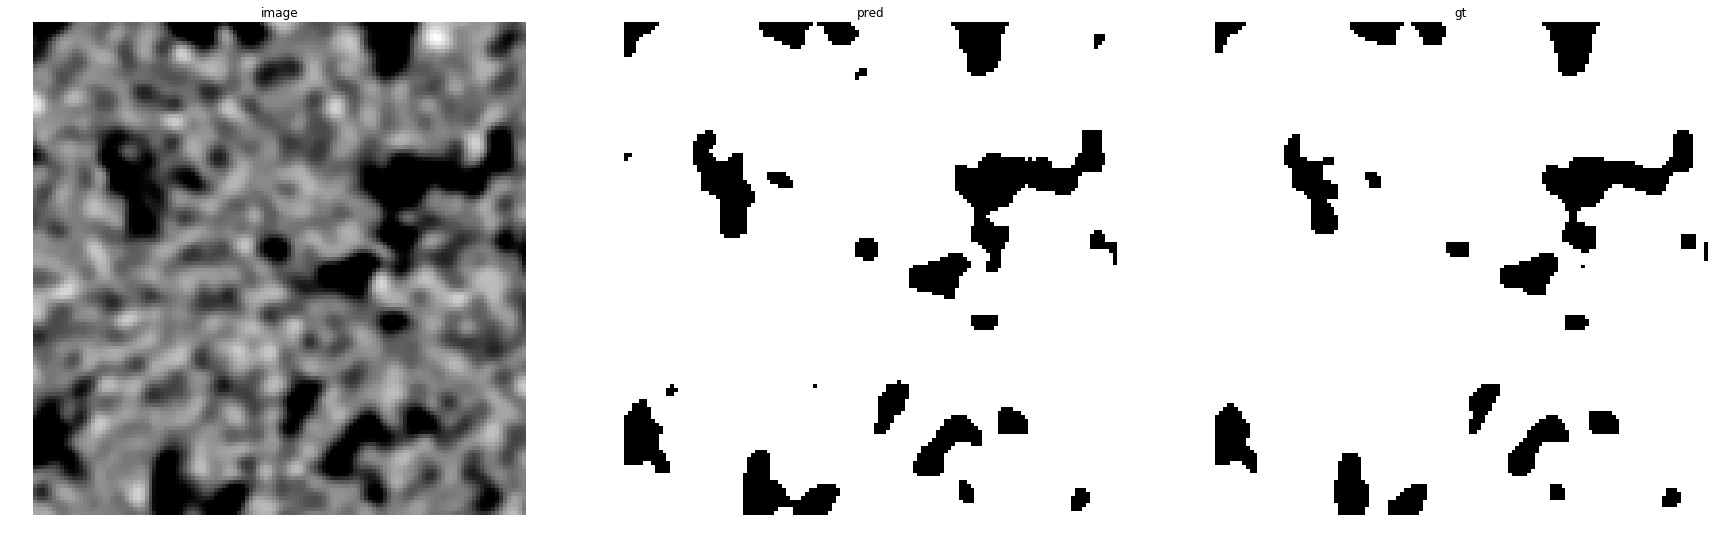

accuracy    : 0.98138427734375
precision   : 0.9997927317949427
recall      : 0.9795573004806065
f1          : 0.9895715799911102
pr_auc      : 0.999908792284244
iou         : 0.9793584190579318


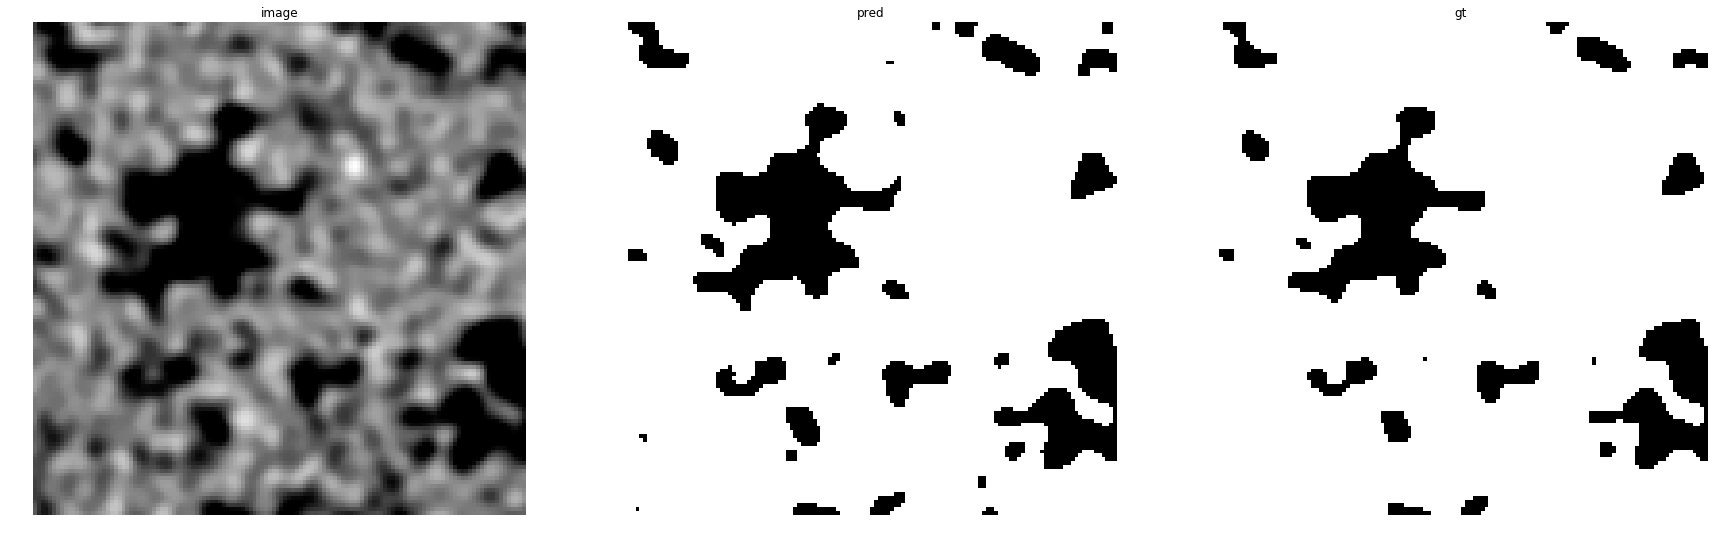

accuracy    : 0.9774169921875
precision   : 0.9998547461689302
recall      : 0.9739653342766184
f1          : 0.9867402522935781
pr_auc      : 0.9998734725725854
iou         : 0.9738275447407512


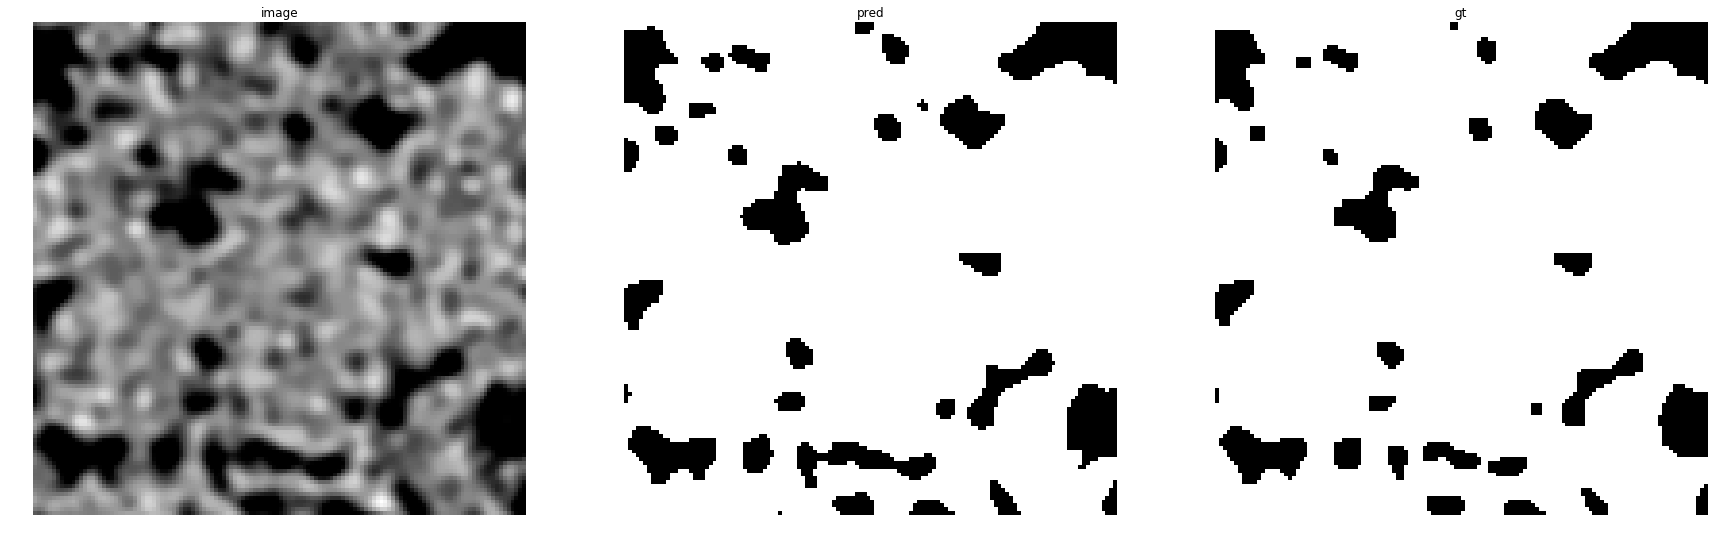

accuracy    : 0.979248046875
precision   : 0.9998564352882061
recall      : 0.9763089647438143
f1          : 0.9879424072629265
pr_auc      : 0.999887326620839
iou         : 0.9761721213820169


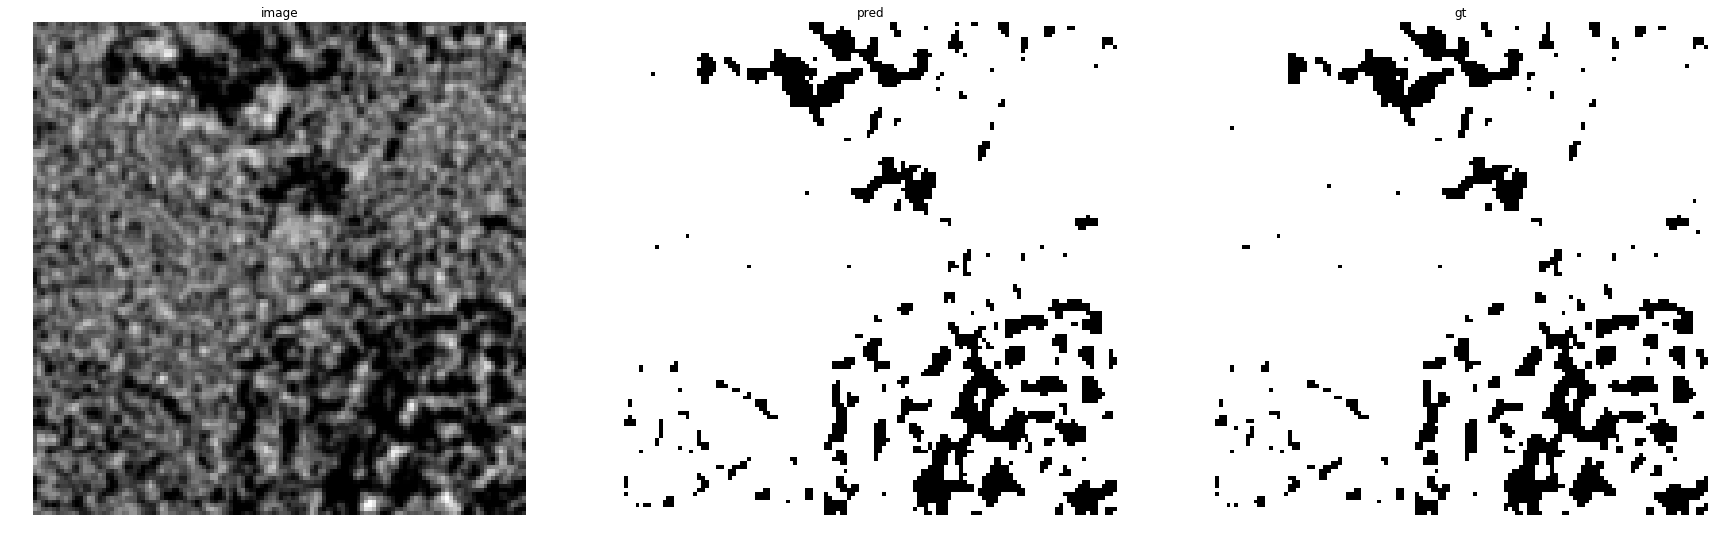

accuracy    : 0.98870849609375
precision   : 0.9922637301366044
recall      : 0.9948291524002516
f1          : 0.99354478523326
pr_auc      : 0.9998716014762523
iou         : 0.9871723755373735


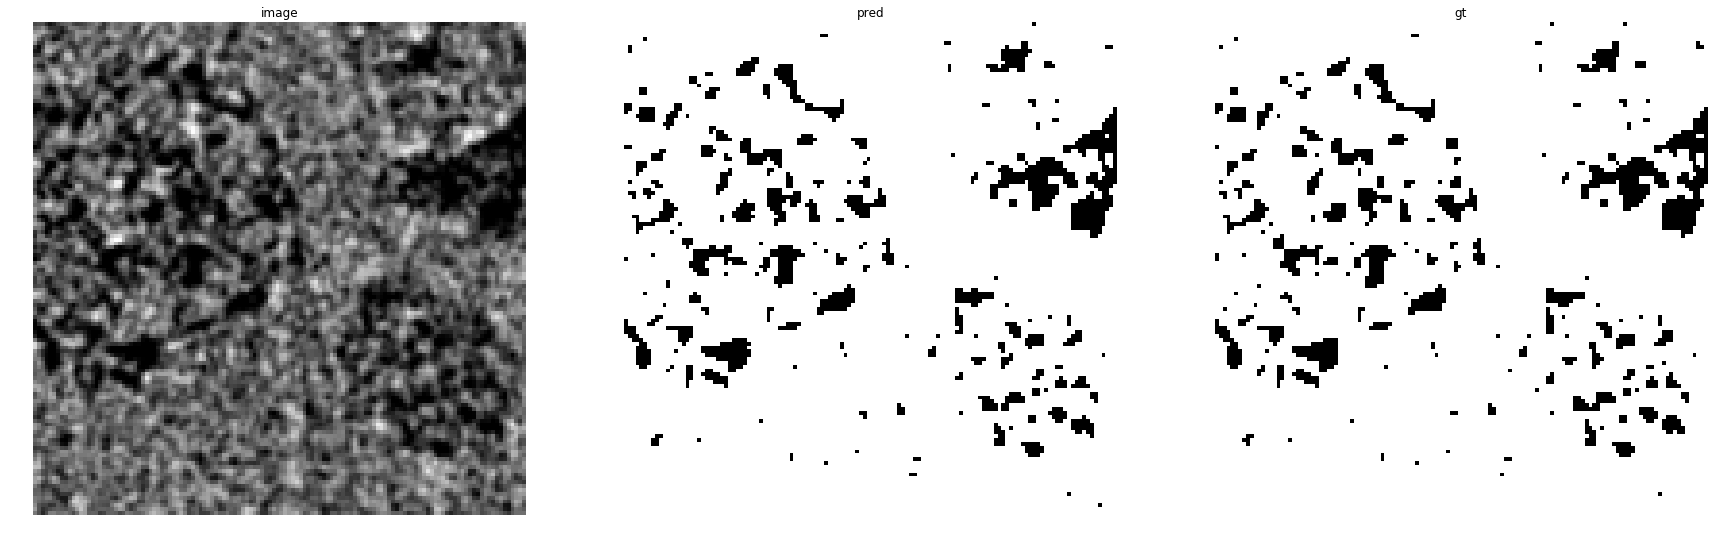

accuracy    : 0.9920654296875
precision   : 0.9953413003848491
recall      : 0.9958792136729041
f1          : 0.9956101843722563
pr_auc      : 0.9999241297882475
iou         : 0.9912587412587412


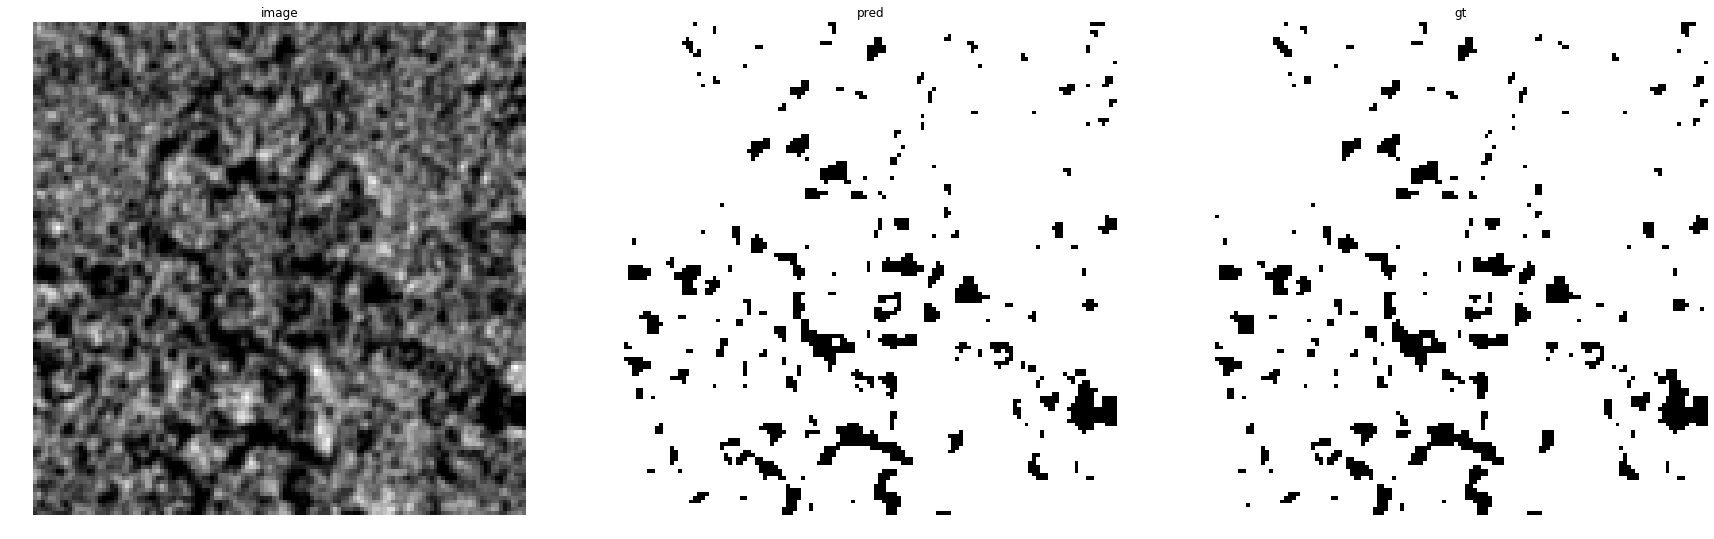

accuracy    : 0.99053955078125
precision   : 0.9932689103632123
recall      : 0.9963898916967509
f1          : 0.9948269532423322
pr_auc      : 0.9999186963364859
iou         : 0.989707151869314


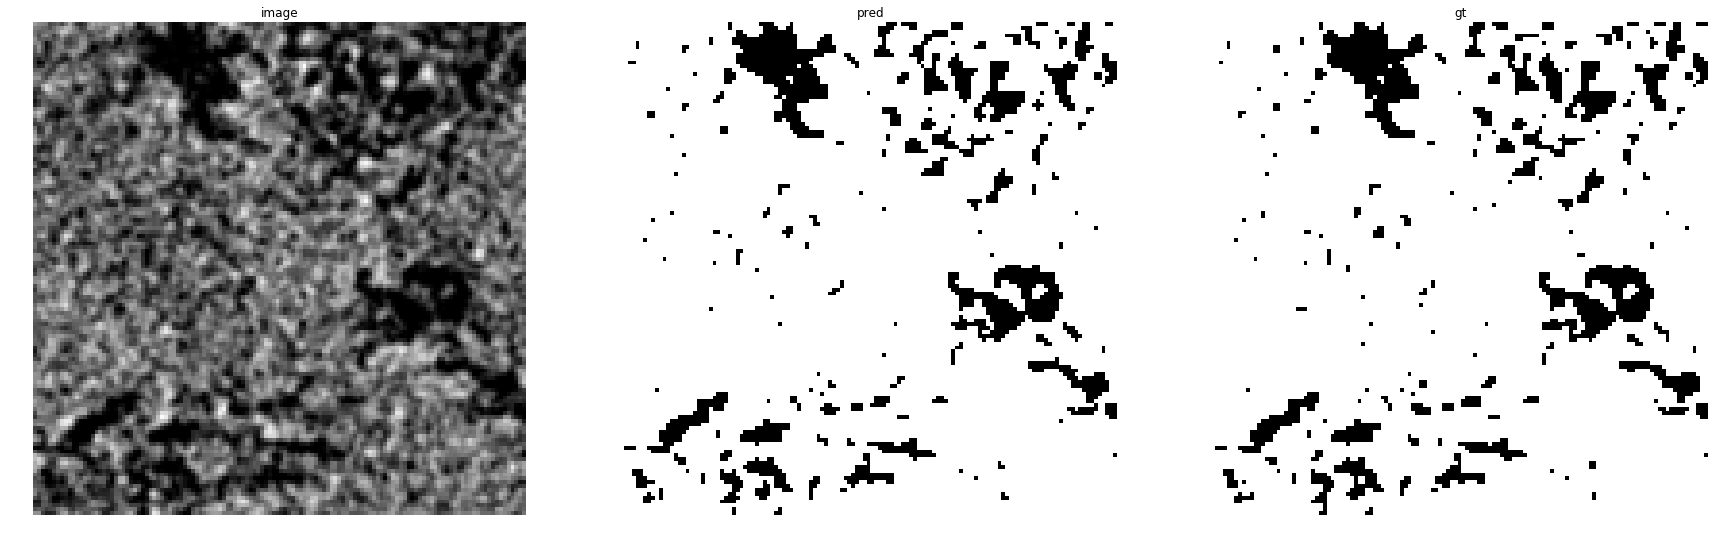

accuracy    : 0.99029541015625
precision   : 0.9942496882361092
recall      : 0.9947320995355929
f1          : 0.9944908353833893
pr_auc      : 0.9999103702980009
iou         : 0.9890420399724328


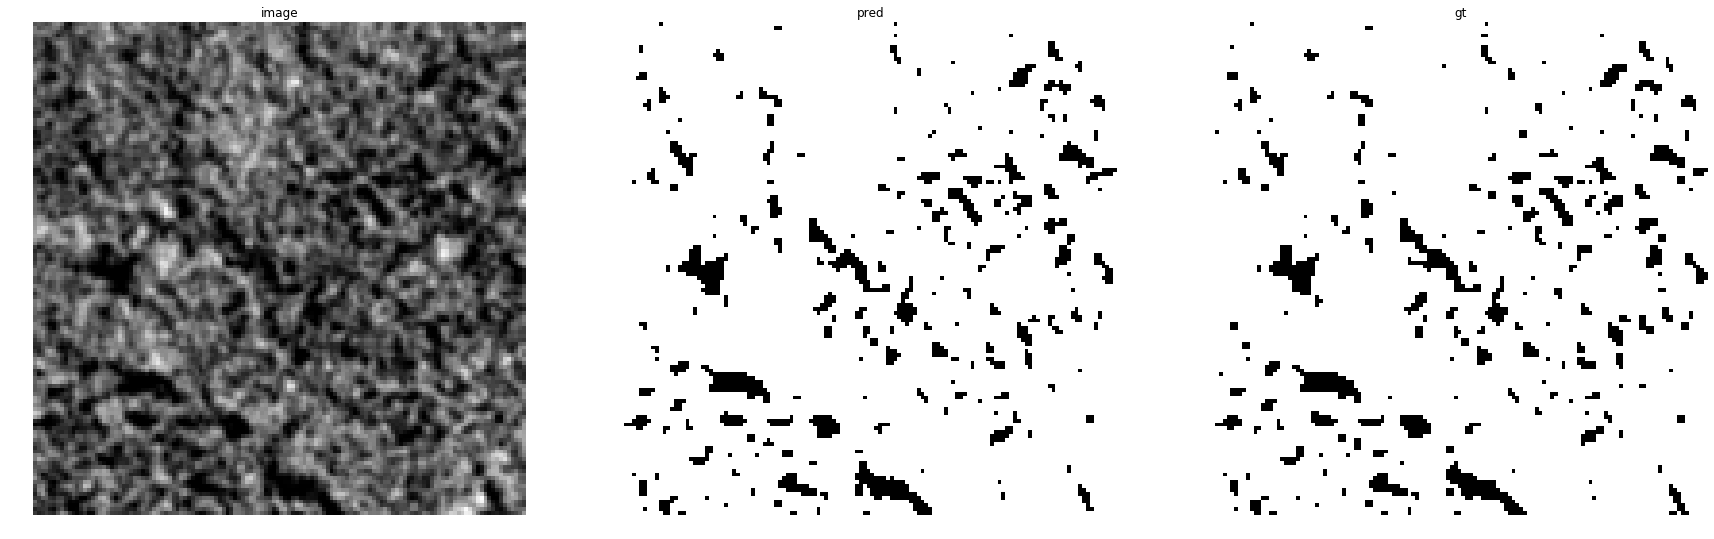

accuracy    : 0.9892578125
precision   : 0.9926695988271358
recall      : 0.9955888250233926
f1          : 0.994127068873465
pr_auc      : 0.9998863550571303
iou         : 0.9883227176220807


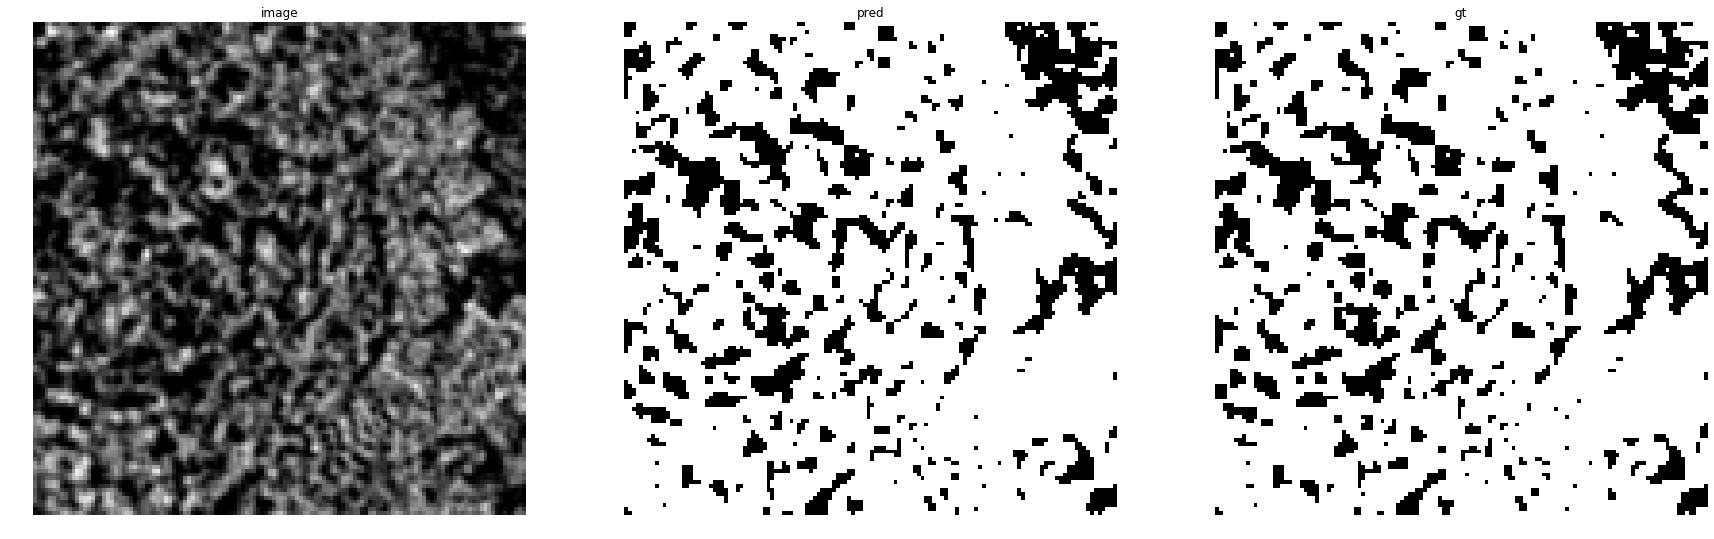

accuracy    : 0.9813232421875
precision   : 0.9861690619687838
recall      : 0.9901474010861133
f1          : 0.9881542273149582
pr_auc      : 0.999585466872468
iou         : 0.9765858137577473


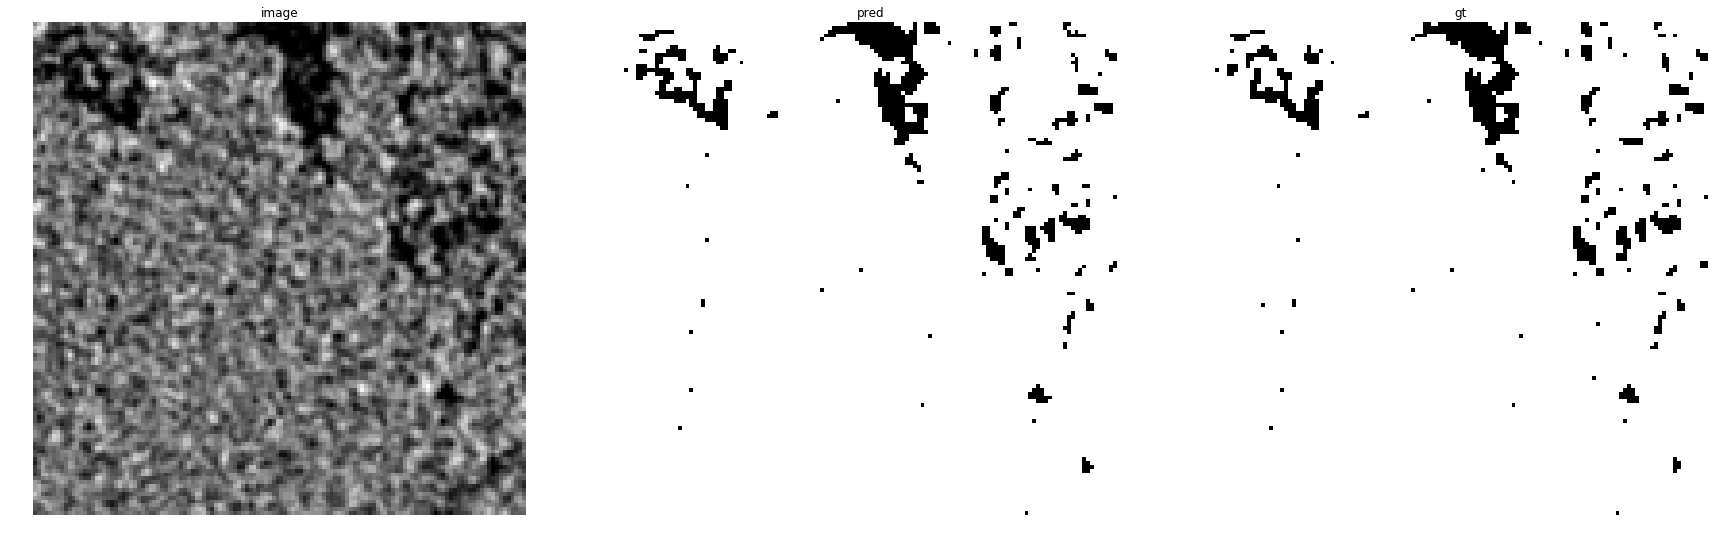

accuracy    : 0.995361328125
precision   : 0.9974243399871217
recall      : 0.9976813087723818
f1          : 0.9975528078310149
pr_auc      : 0.9999769087441127
iou         : 0.9951175639213671


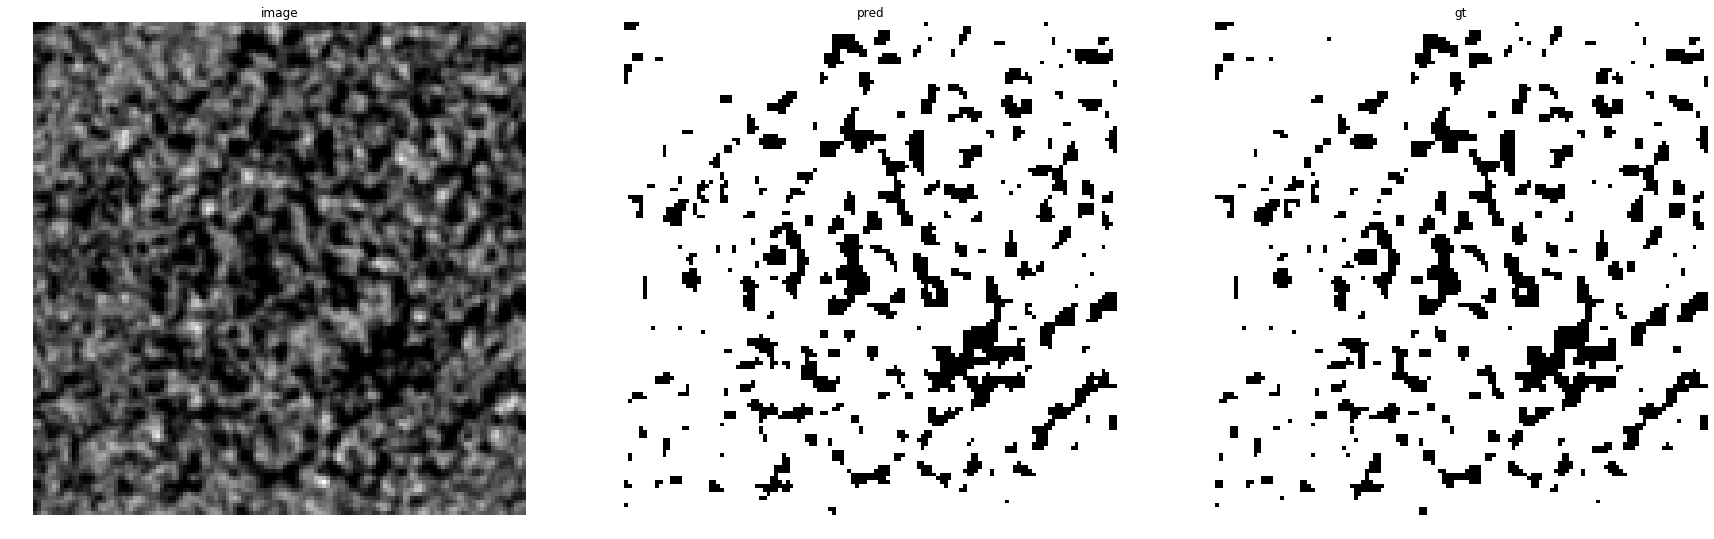

accuracy    : 0.98333740234375
precision   : 0.9886640837996843
recall      : 0.991723641597697
f1          : 0.9901914992993928
pr_auc      : 0.9997256776107735
iou         : 0.9805735430157262


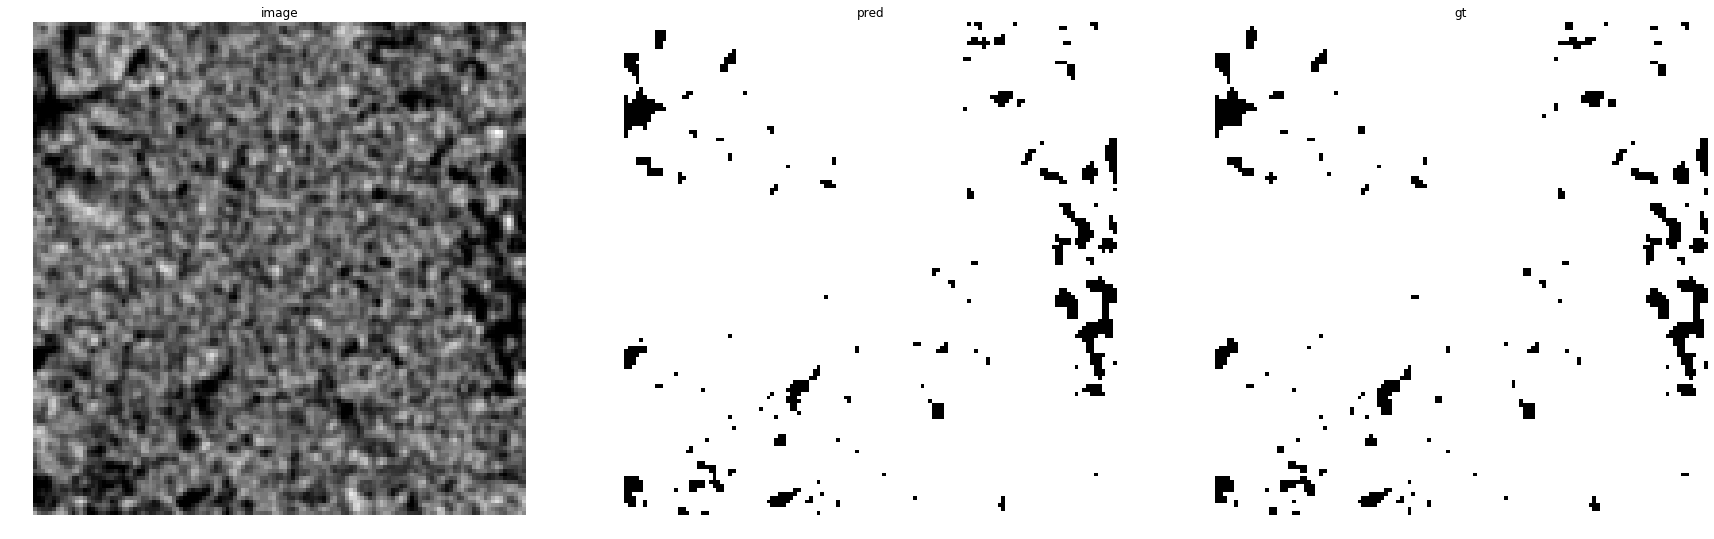

accuracy    : 0.99420166015625
precision   : 0.9955825864276568
recall      : 0.9983308724401361
f1          : 0.9969548354008398
pr_auc      : 0.9999760908989639
iou         : 0.9939281605522178


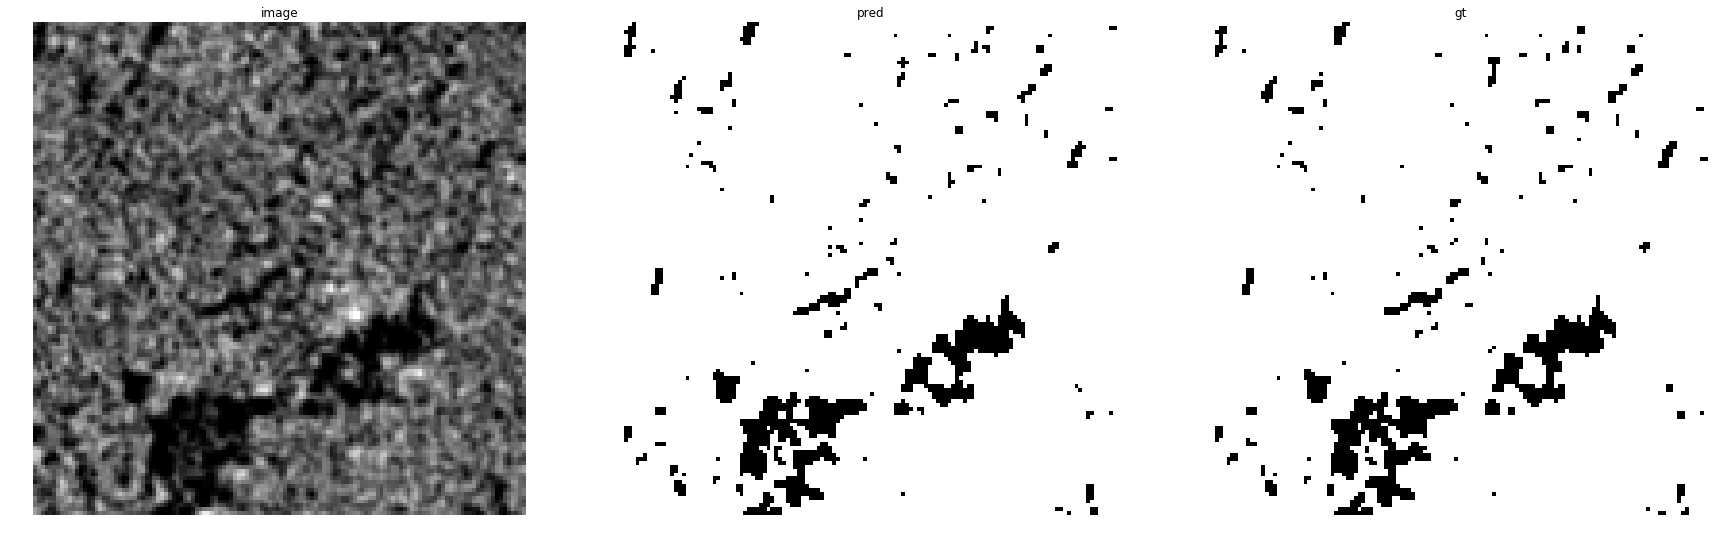

accuracy    : 0.9942626953125
precision   : 0.9963844333420984
recall      : 0.9974335351408266
f1          : 0.996908708234675
pr_auc      : 0.9999607262179947
iou         : 0.9938364697396892


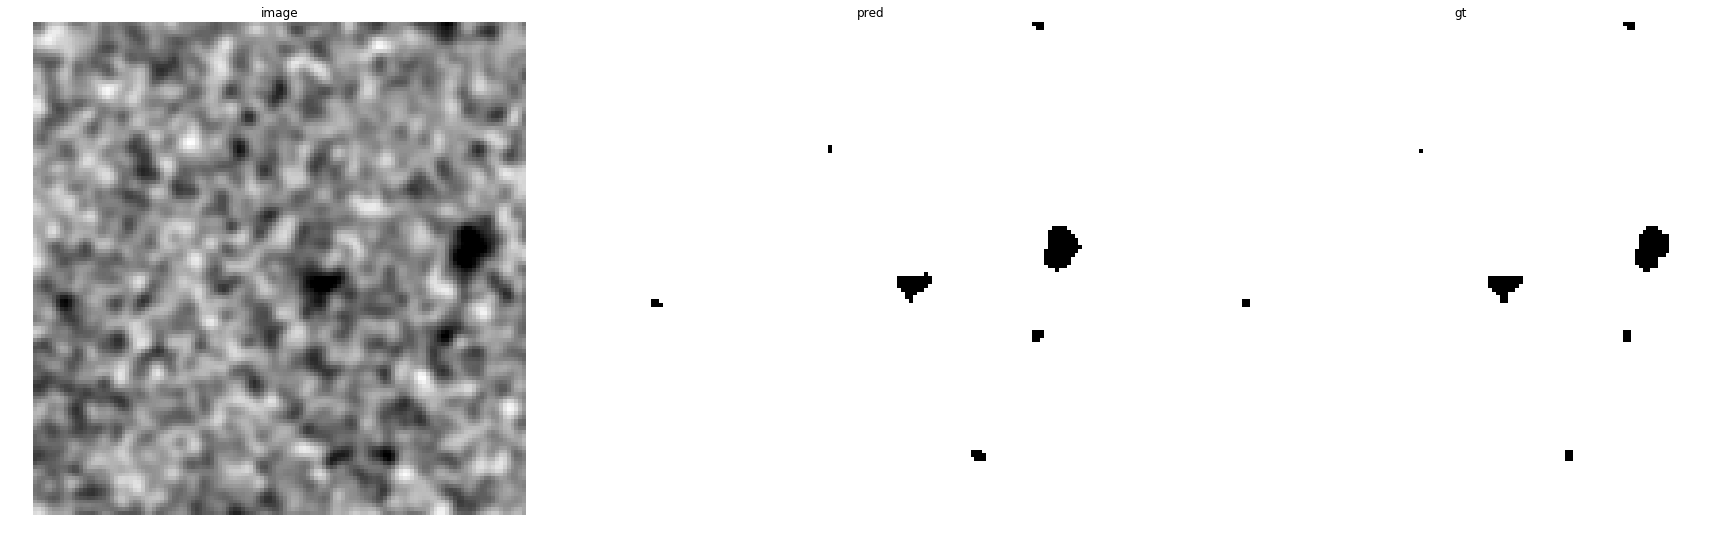

accuracy    : 0.99884033203125
precision   : 0.9997536338999754
recall      : 0.999076752631255
f1          : 0.9994150786565279
pr_auc      : 0.9999992950145524
iou         : 0.9988308411790043


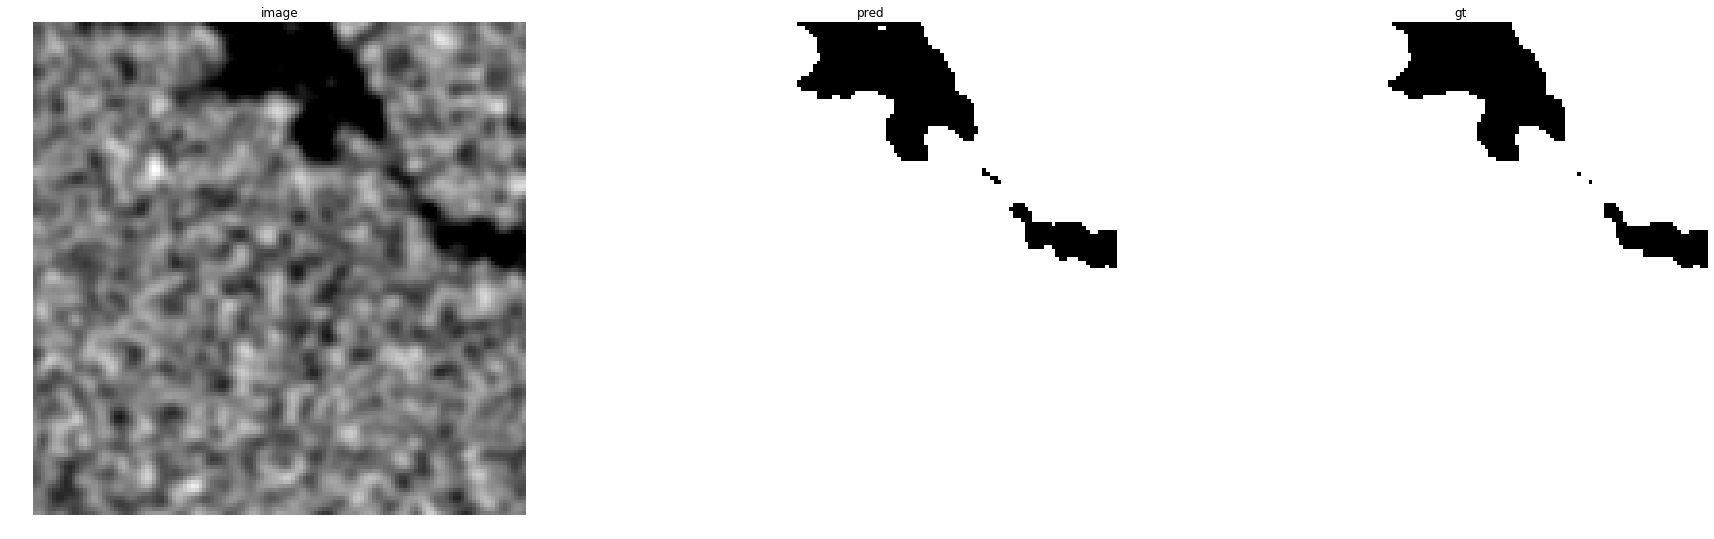

accuracy    : 0.99749755859375
precision   : 0.9995403808273146
recall      : 0.9977715147145573
f1          : 0.9986551644963427
pr_auc      : 0.9999962431420741
iou         : 0.9973139412997903


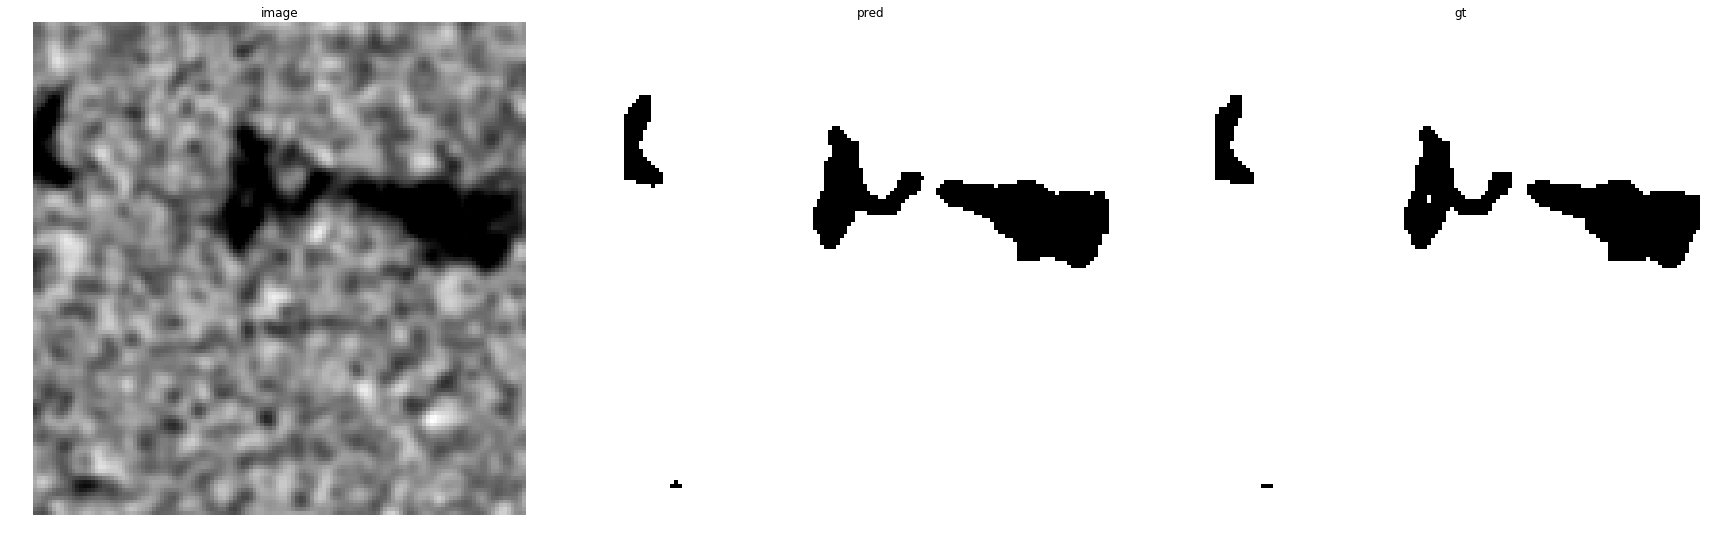

accuracy    : 0.997314453125
precision   : 0.9992135788714857
recall      : 0.9979056220956869
f1          : 0.9985591721789246
pr_auc      : 0.9999945099684773
iou         : 0.9971224903538028


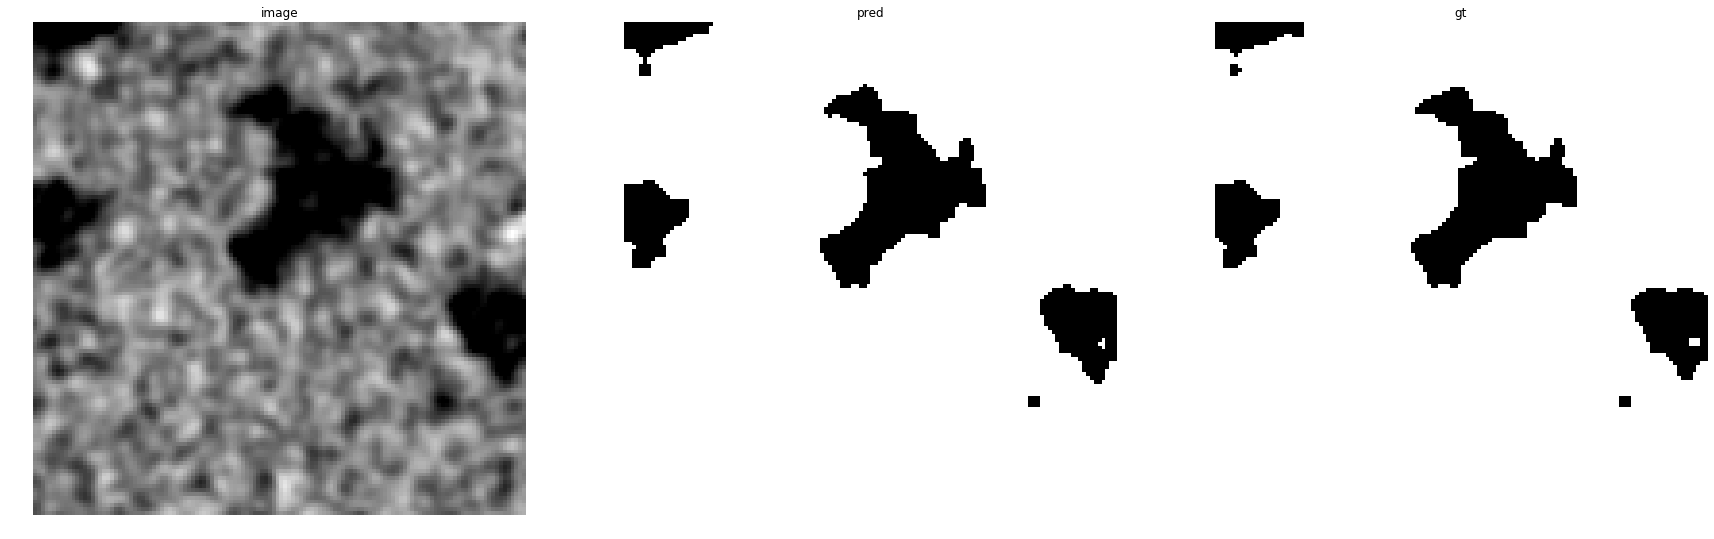

accuracy    : 0.99554443359375
precision   : 0.9984942851276436
recall      : 0.996516393442623
f1          : 0.9975043588253394
pr_auc      : 0.9999828529894886
iou         : 0.9950211430909834


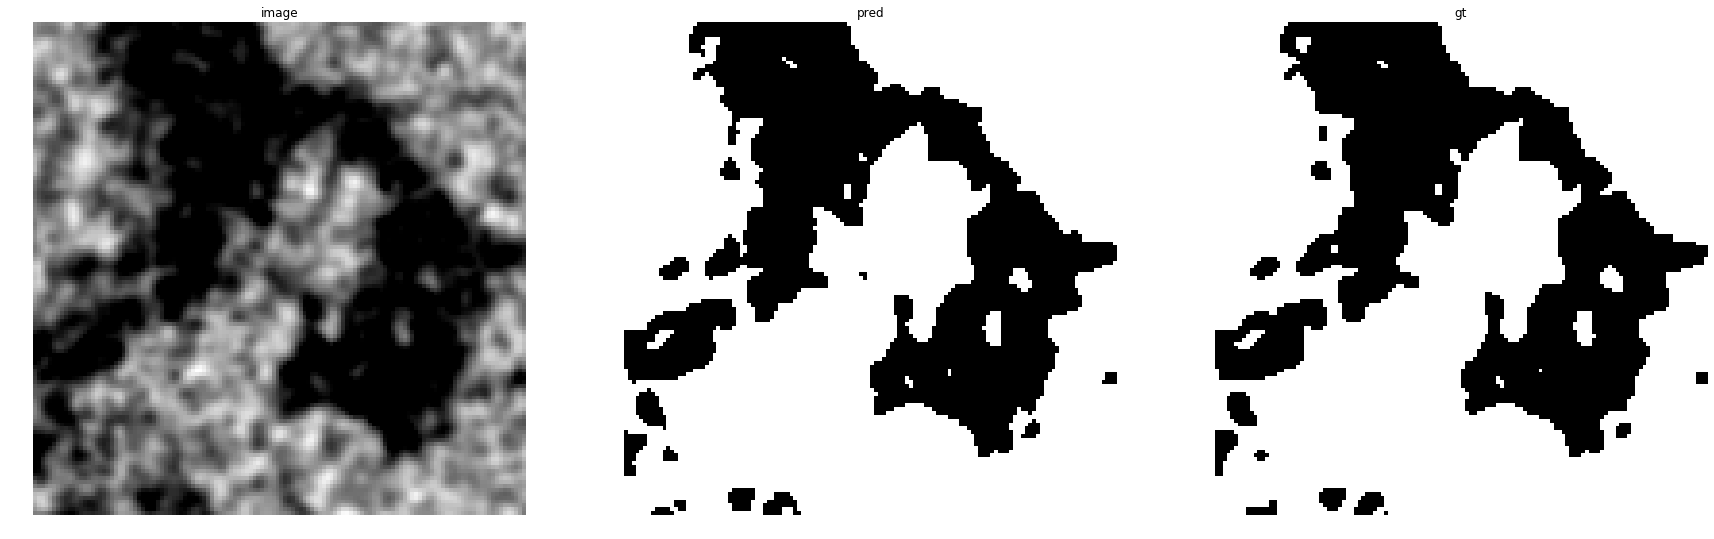

accuracy    : 0.98626708984375
precision   : 0.9930358288280033
recall      : 0.9864372838157656
f1          : 0.9897255582446687
pr_auc      : 0.999682172530129
iou         : 0.9796600976315314


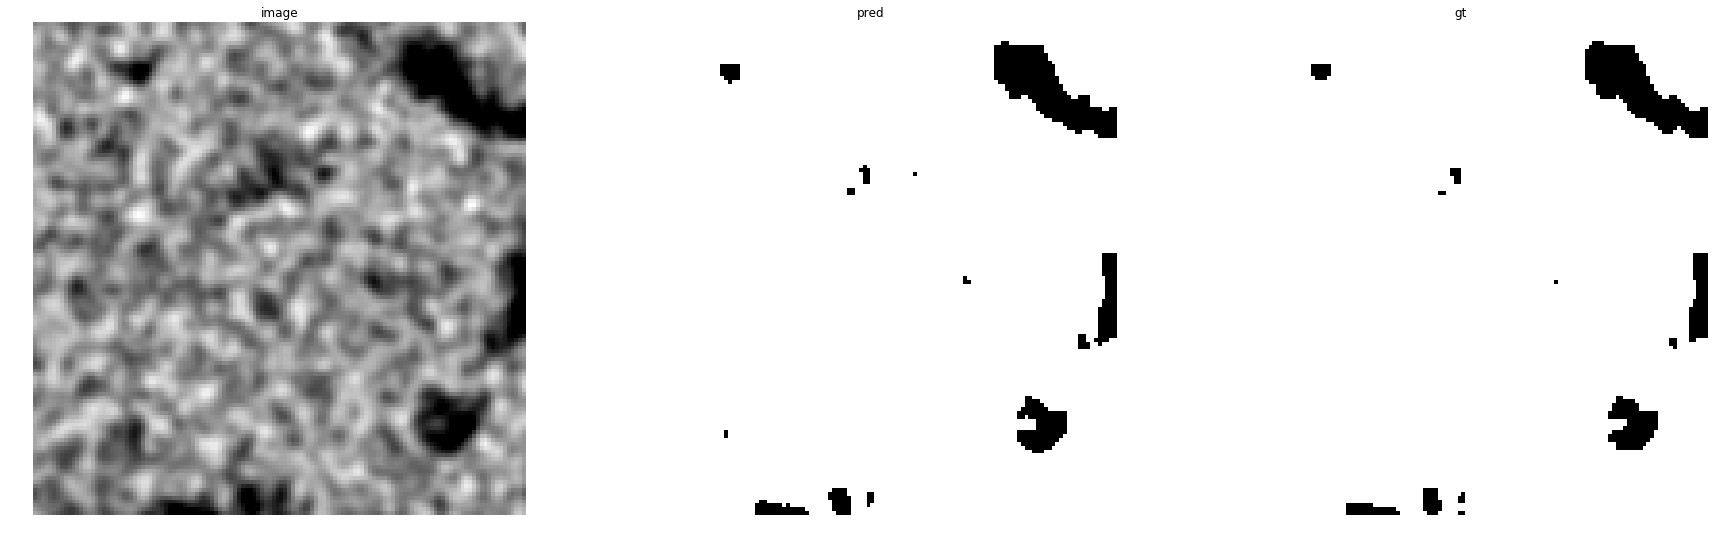

accuracy    : 0.996826171875
precision   : 0.9991071997959314
recall      : 0.997580388411334
f1          : 0.9983432103485631
pr_auc      : 0.9999931255004575
iou         : 0.996691901520453


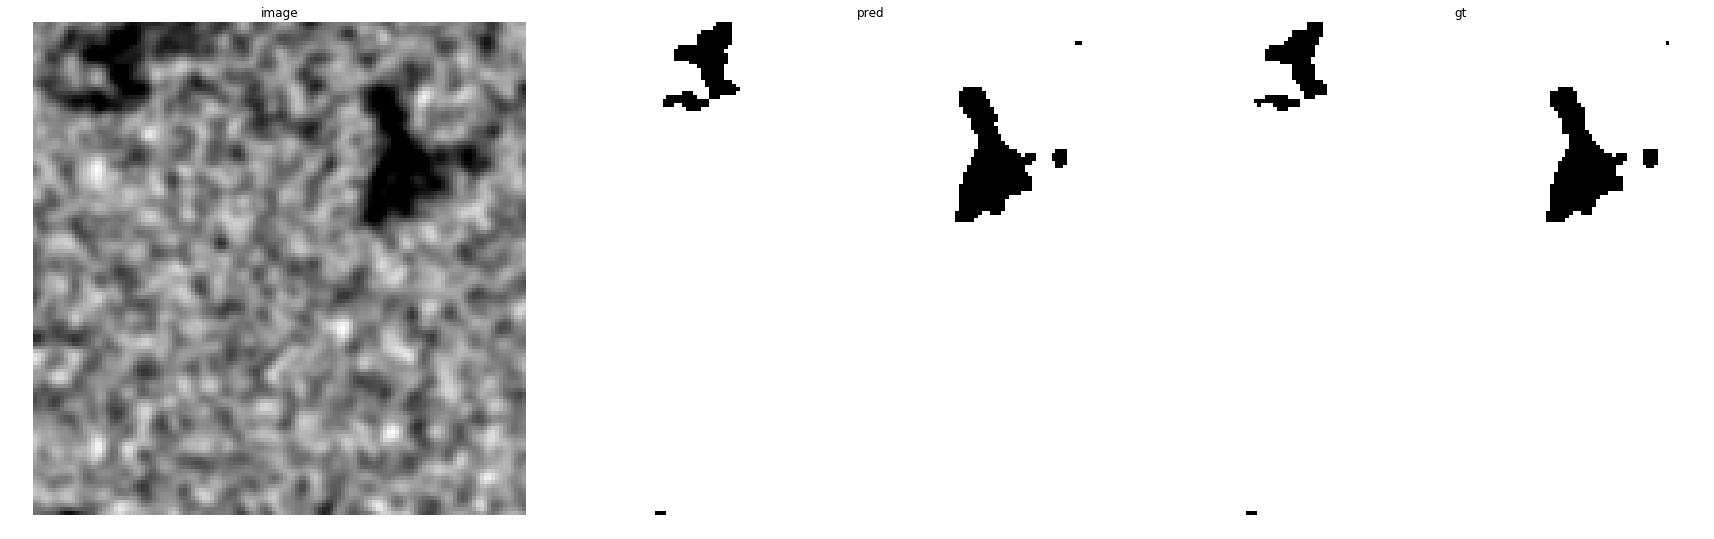

accuracy    : 0.99755859375
precision   : 0.9996198200481561
recall      : 0.9978494623655914
f1          : 0.9987338566725753
pr_auc      : 0.9999951299891913
iou         : 0.9974709155285787


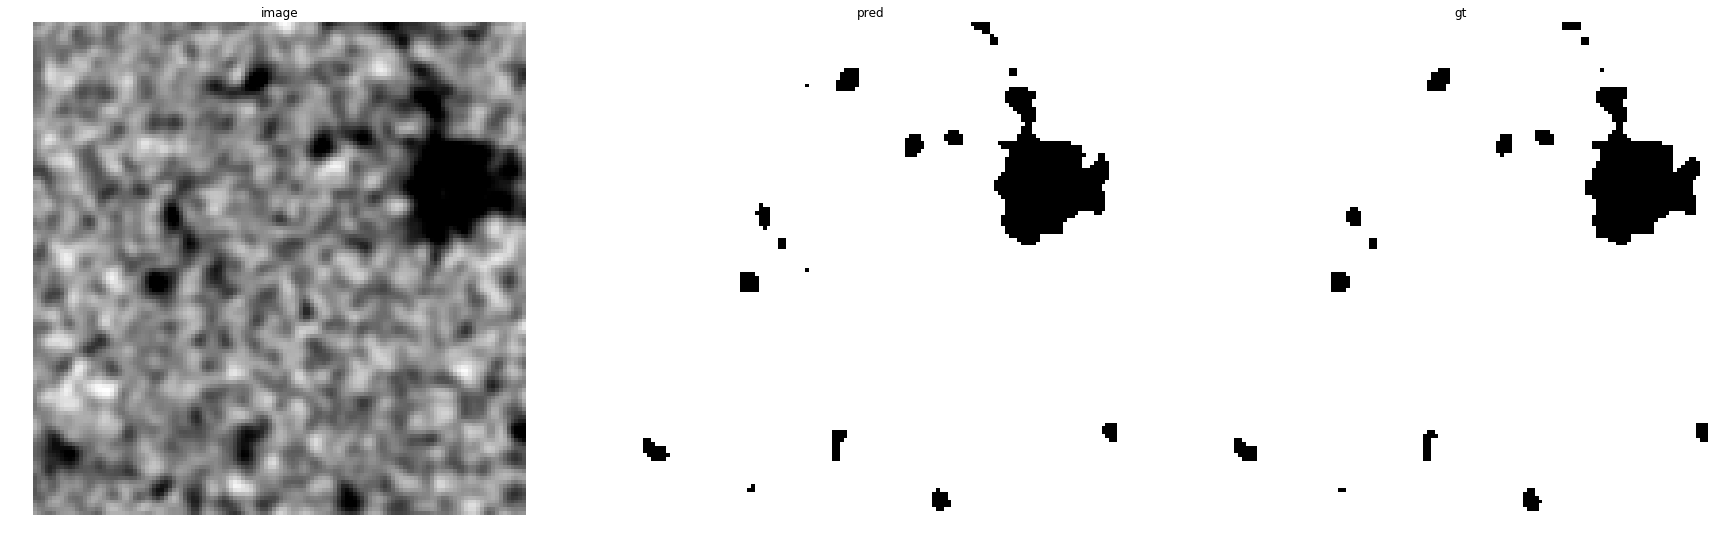

accuracy    : 0.996826171875
precision   : 0.9992261559295802
recall      : 0.9974251689732861
f1          : 0.9983248502029509
pr_auc      : 0.9999933777040292
iou         : 0.9966553032739435


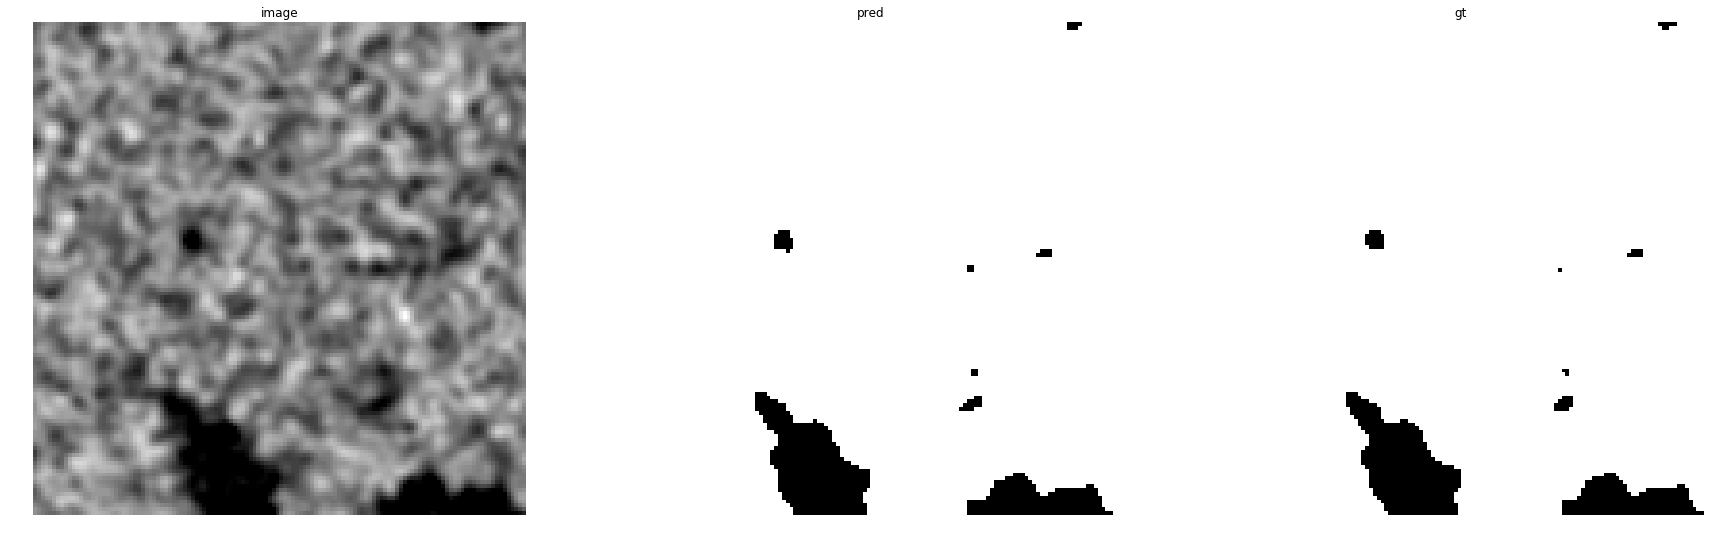

accuracy    : 0.99810791015625
precision   : 0.9994854643684075
recall      : 0.9985221358349933
f1          : 0.9990035678698852
pr_auc      : 0.9999978139318145
iou         : 0.998009119517051


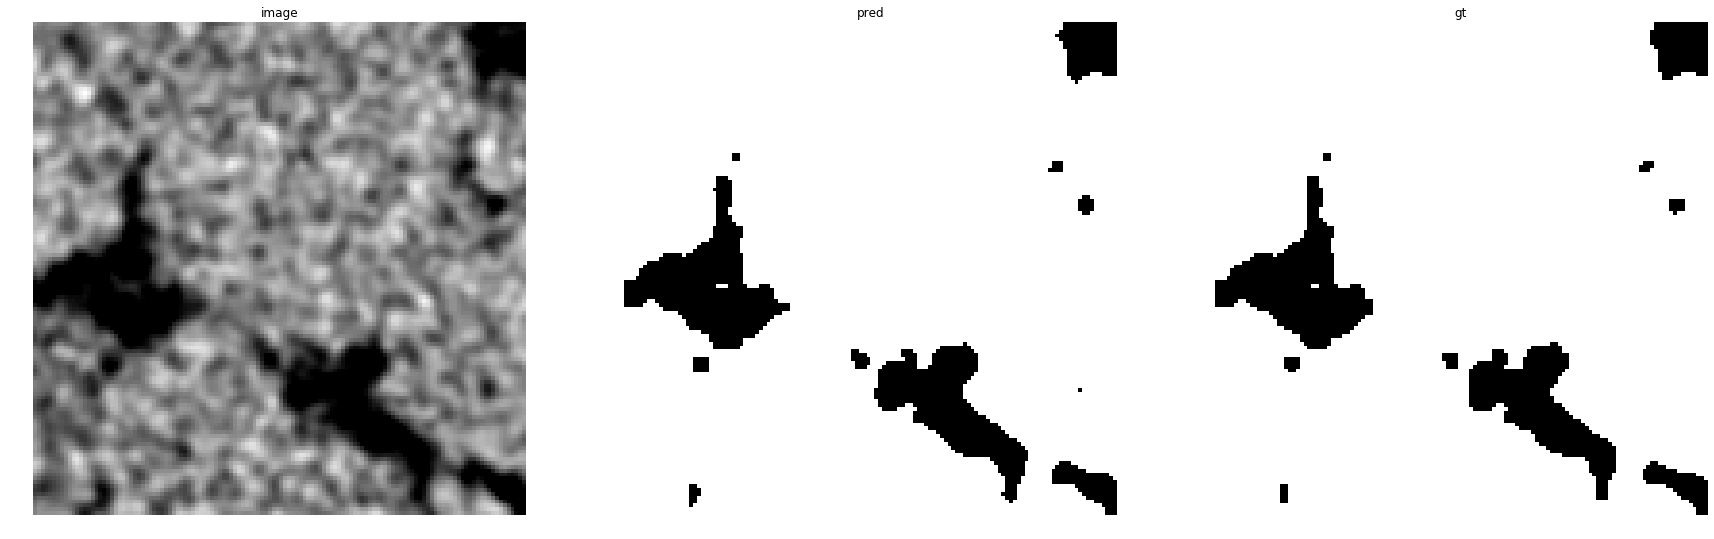

accuracy    : 0.9949951171875
precision   : 0.9995210727969349
recall      : 0.9948923998910378
f1          : 0.9972013651877133
pr_auc      : 0.9999864436909356
iou         : 0.9944183513715881


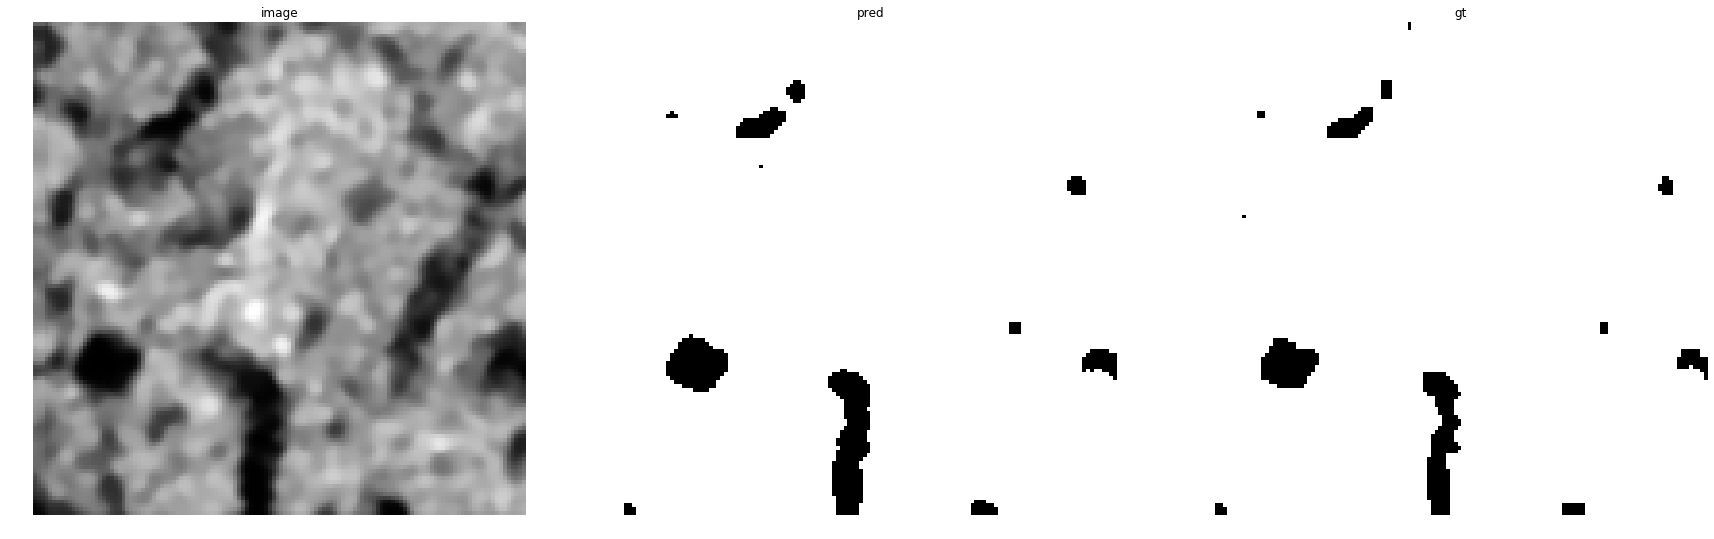

accuracy    : 0.99127197265625
precision   : 0.999618514750763
recall      : 0.9913613720915568
f1          : 0.9954728210972869
pr_auc      : 0.999982865422397
iou         : 0.990986448156319


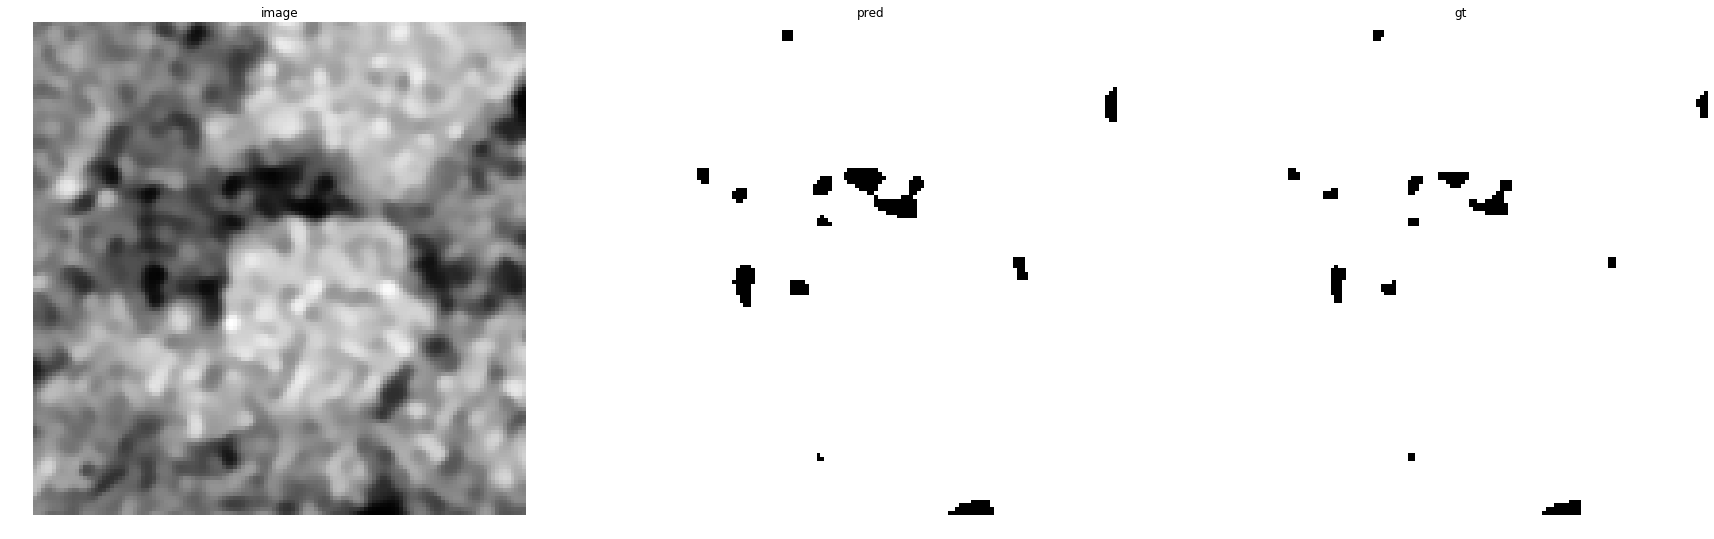

accuracy    : 0.9932861328125
precision   : 0.9998755135067845
recall      : 0.9933217907494435
f1          : 0.9965878776599044
pr_auc      : 0.9999896788972296
iou         : 0.993198961295907


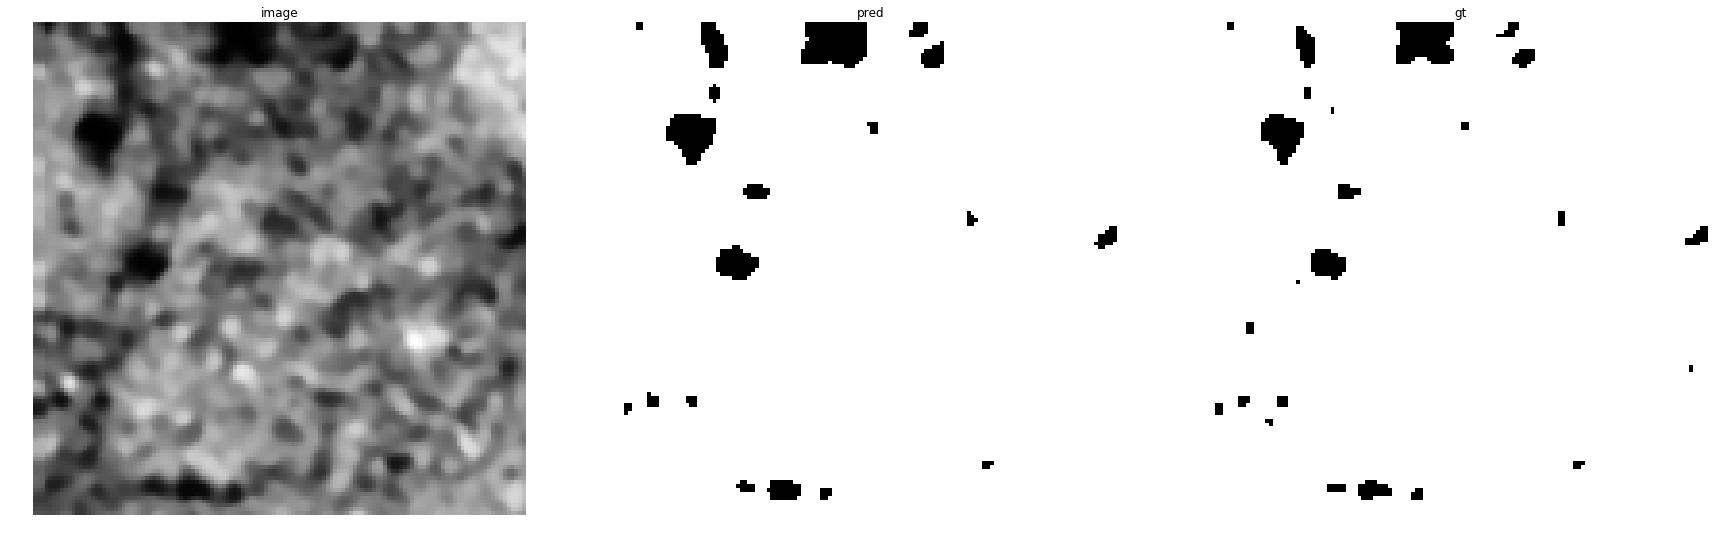

accuracy    : 0.9906005859375
precision   : 0.9985395898152264
recall      : 0.9917386643122911
f1          : 0.9951275074352971
pr_auc      : 0.9999574155950011
iou         : 0.9903022670025189


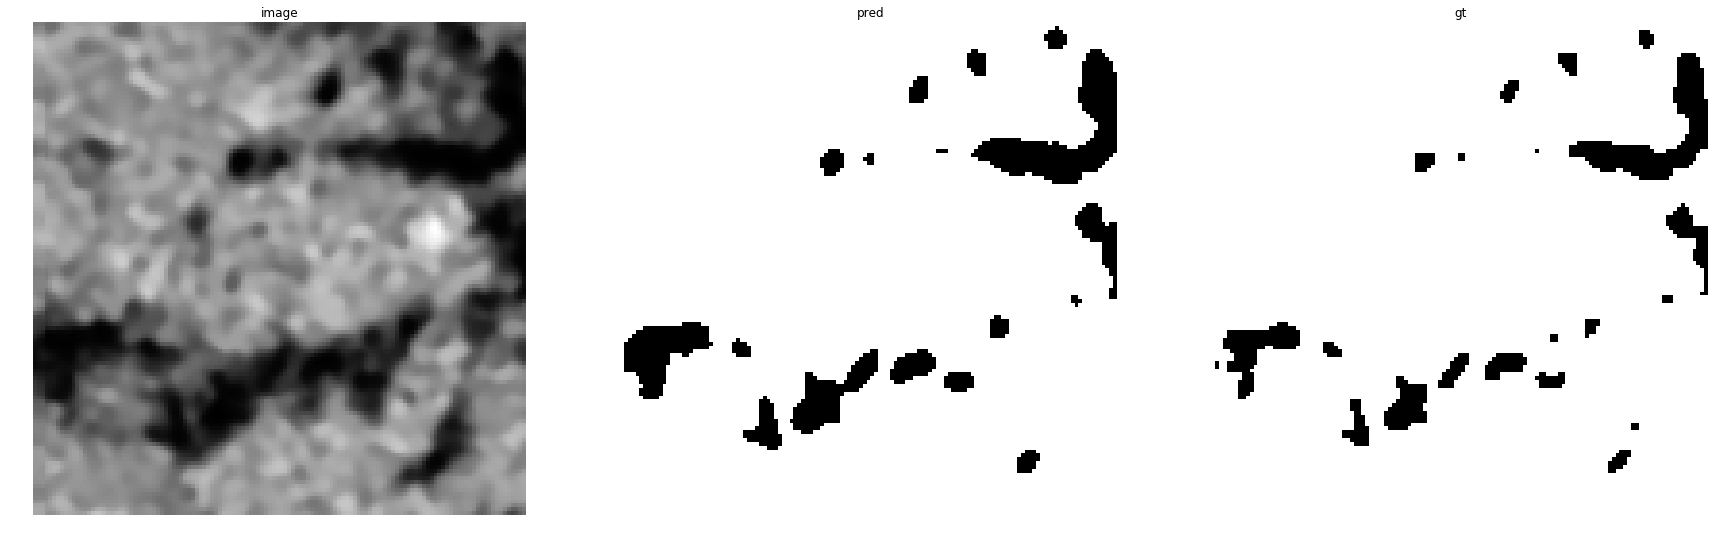

accuracy    : 0.97674560546875
precision   : 0.9992648533048185
recall      : 0.9758517164860985
f1          : 0.9874195146111937
pr_auc      : 0.9999122513205574
iou         : 0.9751516337311681


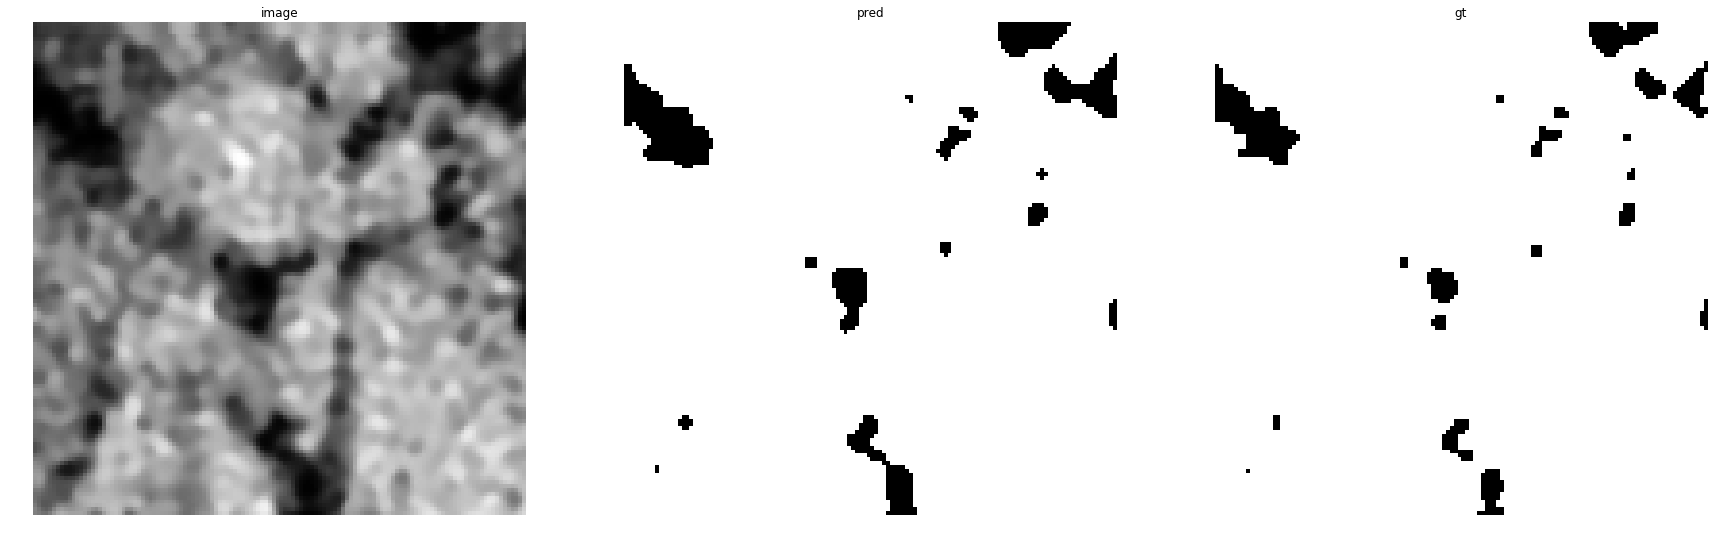

accuracy    : 0.98468017578125
precision   : 0.9994803845154585
recall      : 0.9844539696756446
f1          : 0.9919102716988428
pr_auc      : 0.9999404388954887
iou         : 0.9839503804591087


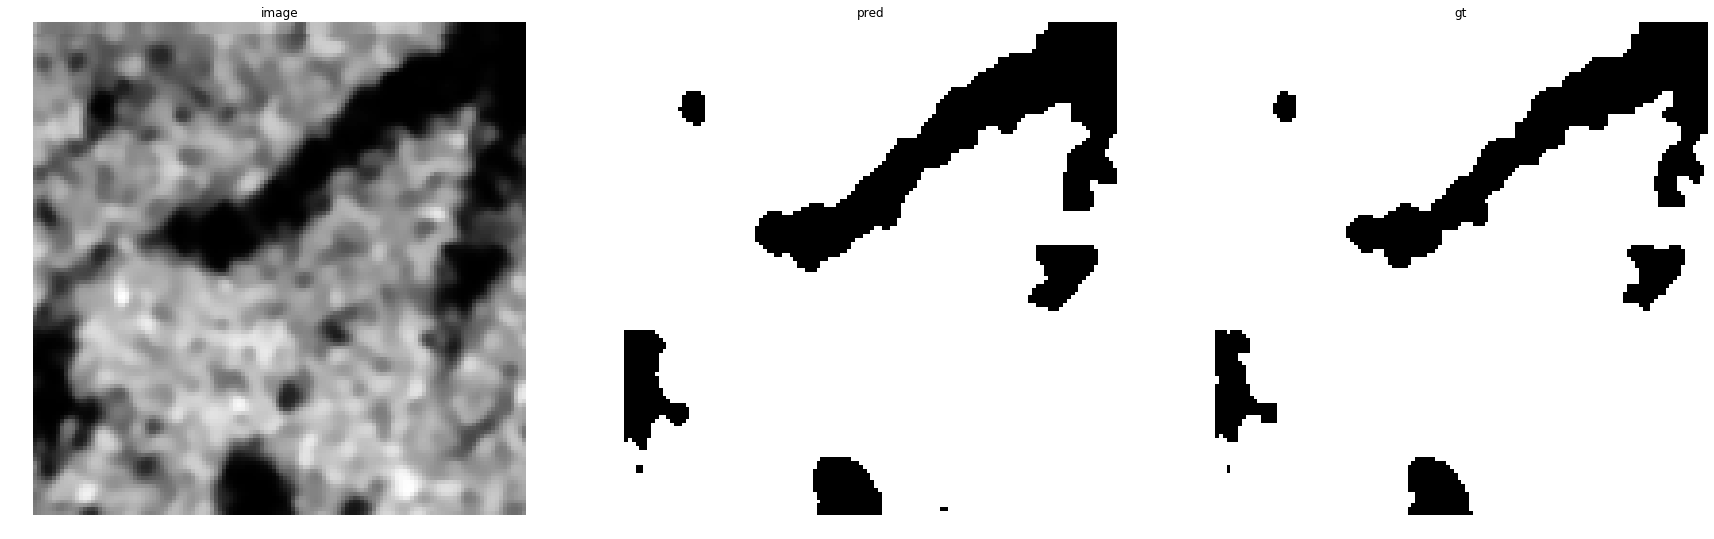

accuracy    : 0.9814453125
precision   : 1.0
recall      : 0.9784136902648584
f1          : 0.9890890819036681
pr_auc      : 0.999933427755295
iou         : 0.9784136902648584


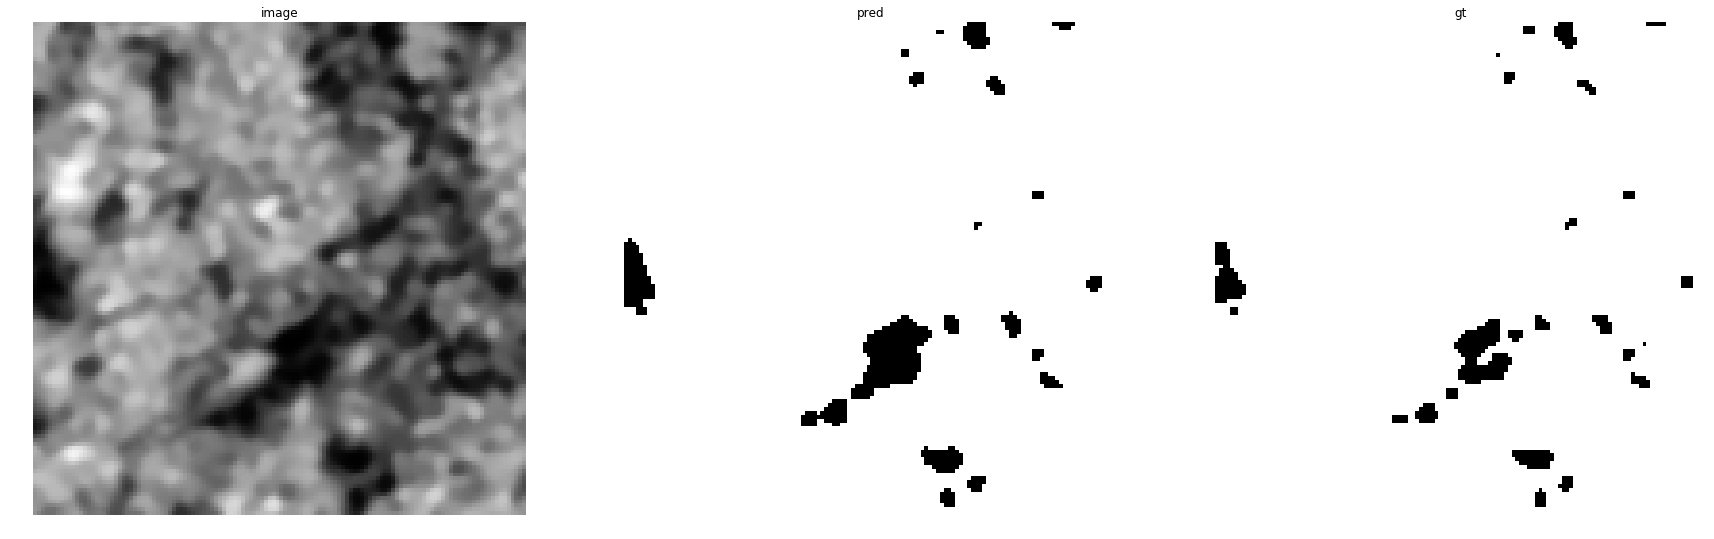

accuracy    : 0.98779296875
precision   : 0.9994908026223664
recall      : 0.987920729789242
f1          : 0.9936720875783079
pr_auc      : 0.9999323516257174
iou         : 0.9874237565239263


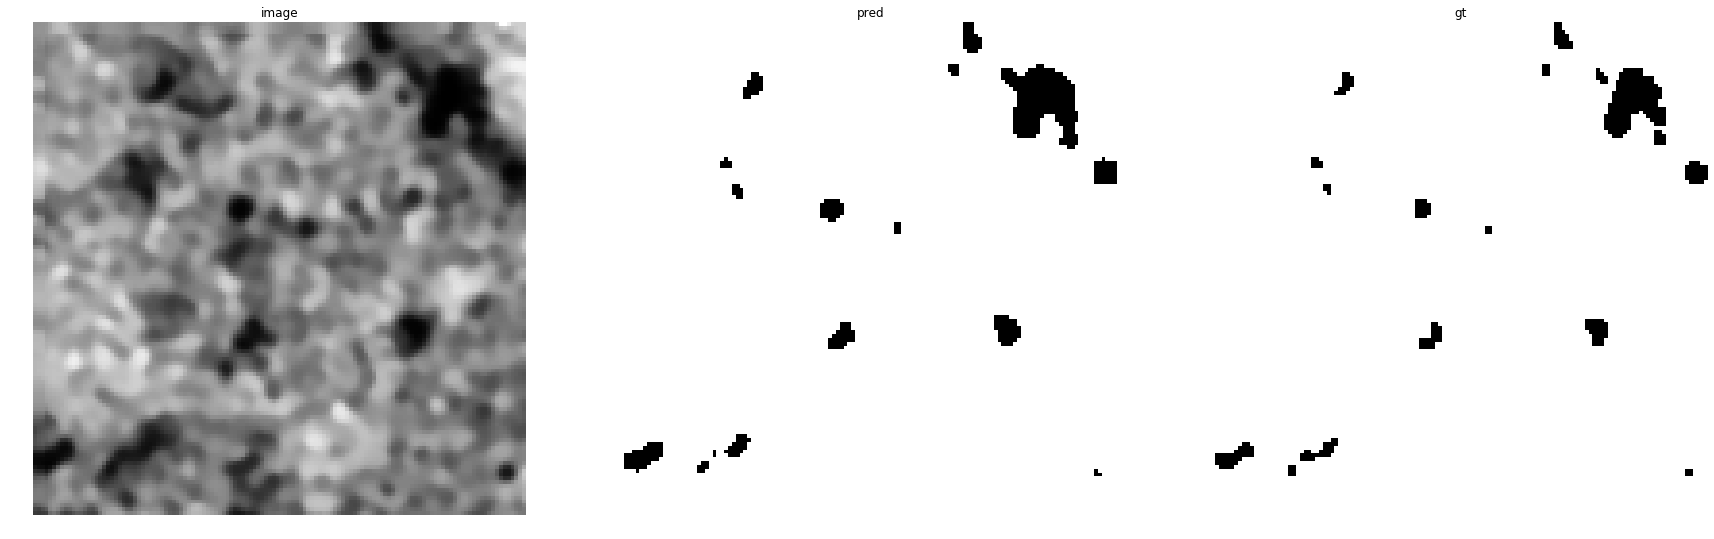

accuracy    : 0.990234375
precision   : 0.9991774754824423
recall      : 0.9907773386034255
f1          : 0.9949596774193549
pr_auc      : 0.9999712150250549
iou         : 0.9899699097291875


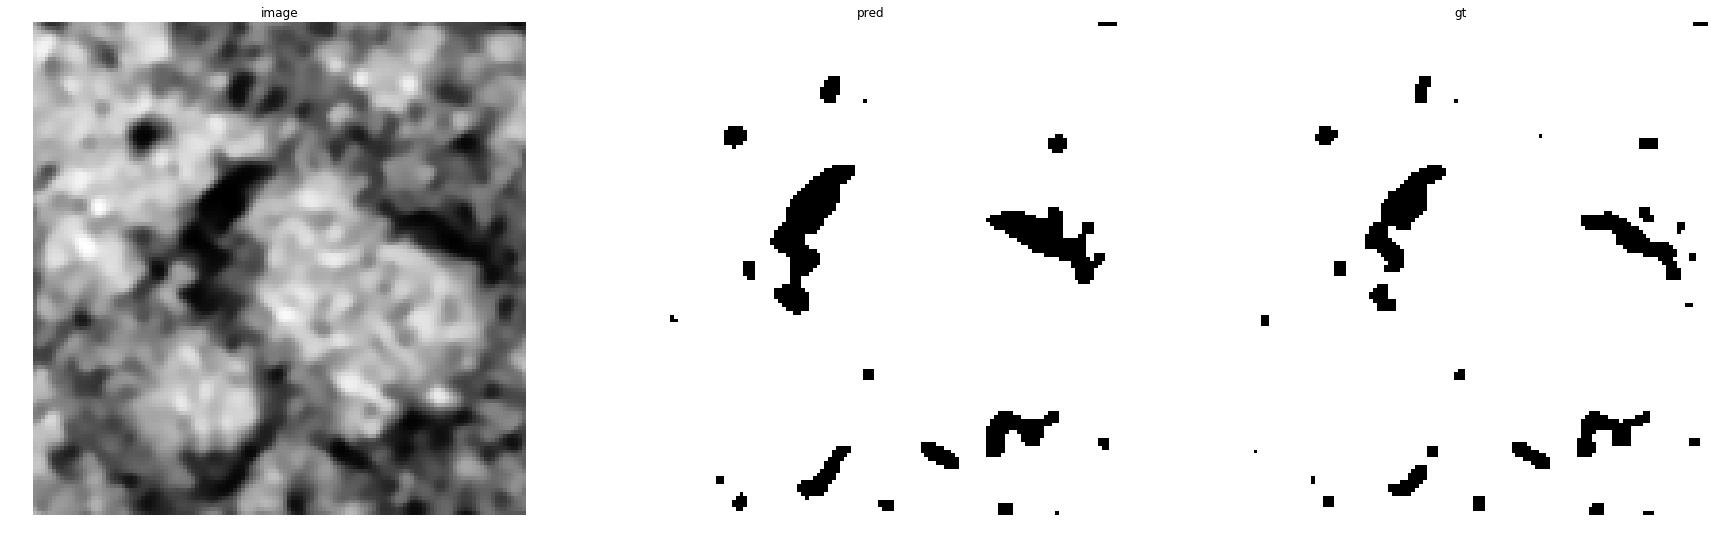

accuracy    : 0.9849853515625
precision   : 0.9990909681189533
recall      : 0.9851462961777322
f1          : 0.9920696324951643
pr_auc      : 0.999888871758823
iou         : 0.984264056802917


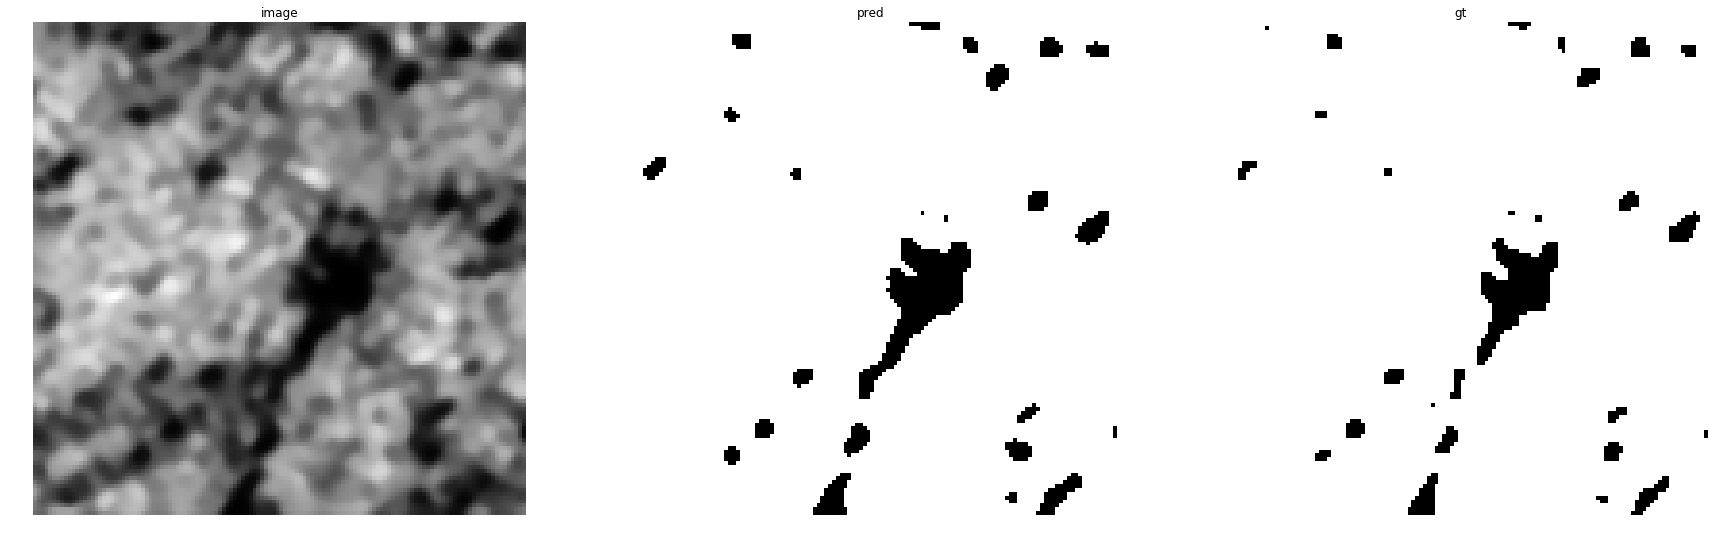

accuracy    : 0.98675537109375
precision   : 0.9996114744544454
recall      : 0.9865158486707567
f1          : 0.9930204882441865
pr_auc      : 0.9999568154839776
iou         : 0.9861377283761339


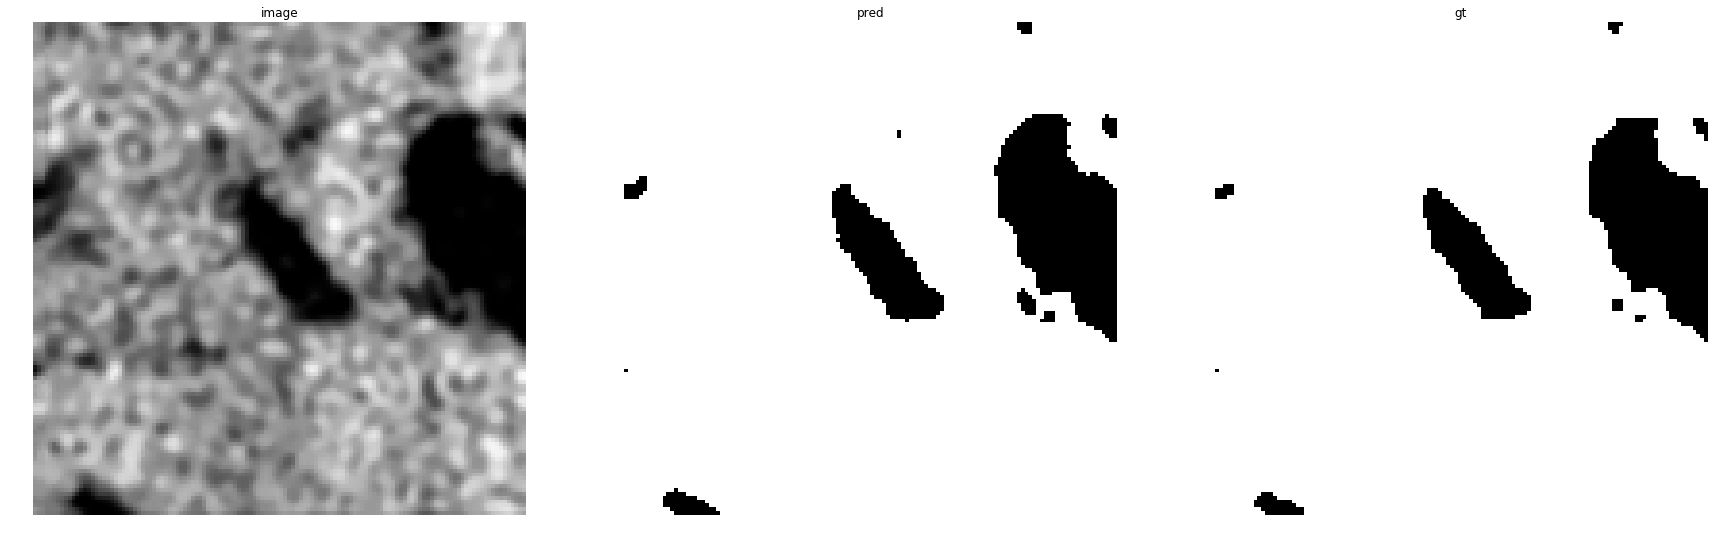

accuracy    : 0.99127197265625
precision   : 0.9998628822158234
recall      : 0.9904244482173175
f1          : 0.995121285524206
pr_auc      : 0.9999902558302745
iou         : 0.9902899436409316


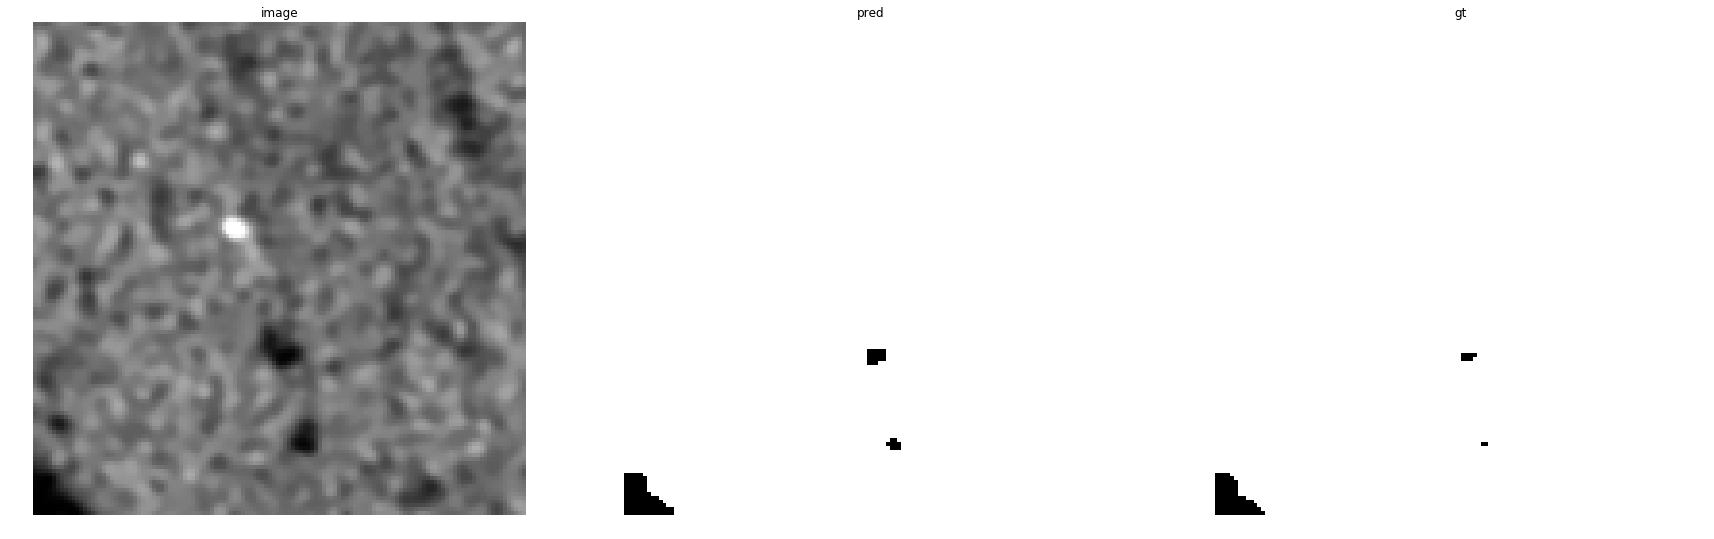

accuracy    : 0.99859619140625
precision   : 1.0
recall      : 0.9985879174852652
f1          : 0.9992934598961694
pr_auc      : 0.9999996645321123
iou         : 0.9985879174852652


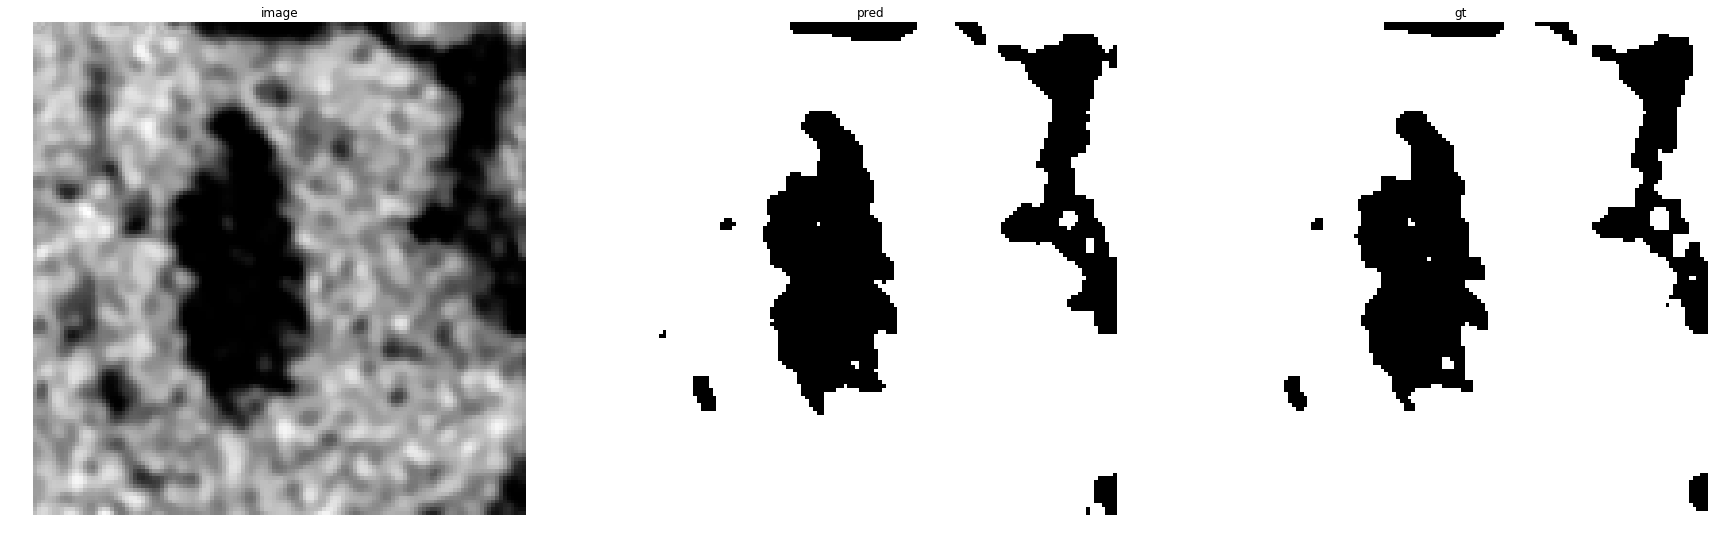

accuracy    : 0.97998046875
precision   : 0.9996261961722488
recall      : 0.9764130276033299
f1          : 0.9878832656076839
pr_auc      : 0.9998932931059381
iou         : 0.9760566464705452


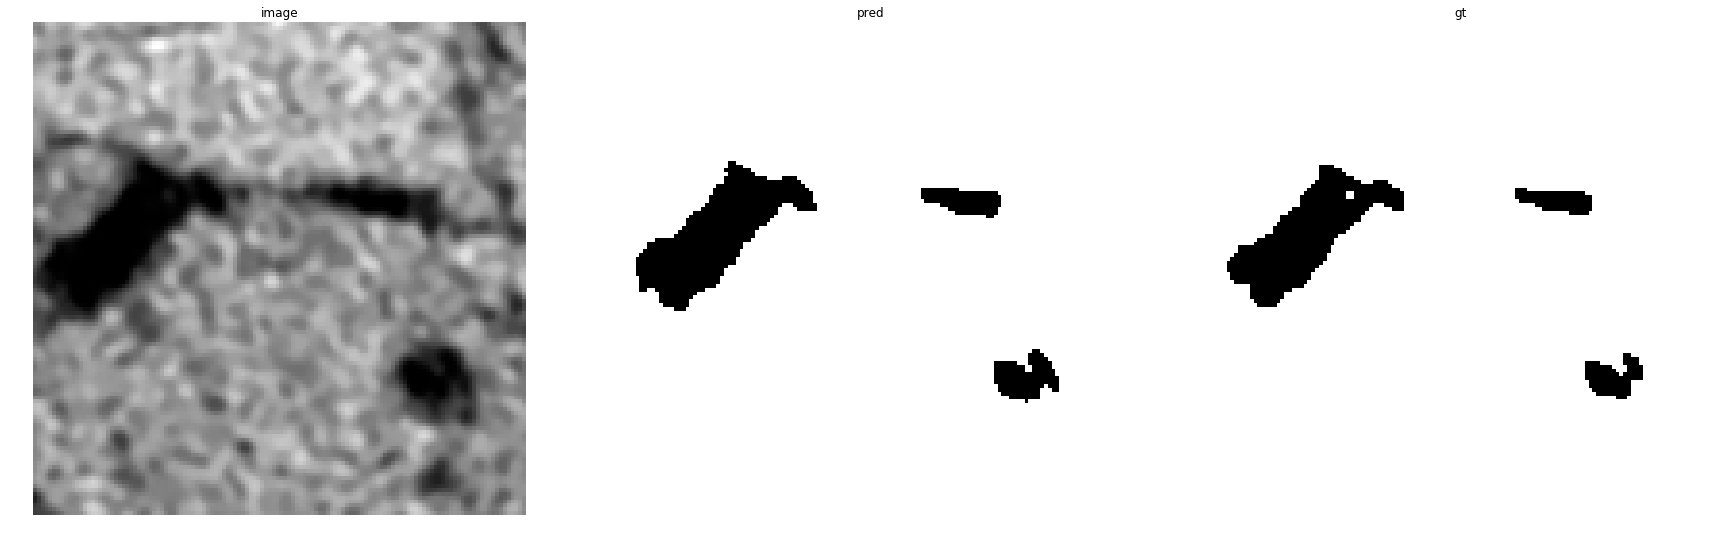

accuracy    : 0.99224853515625
precision   : 0.9999349804941482
recall      : 0.9918735891647855
f1          : 0.9958879715072041
pr_auc      : 0.9999918453864842
iou         : 0.9918096220817748


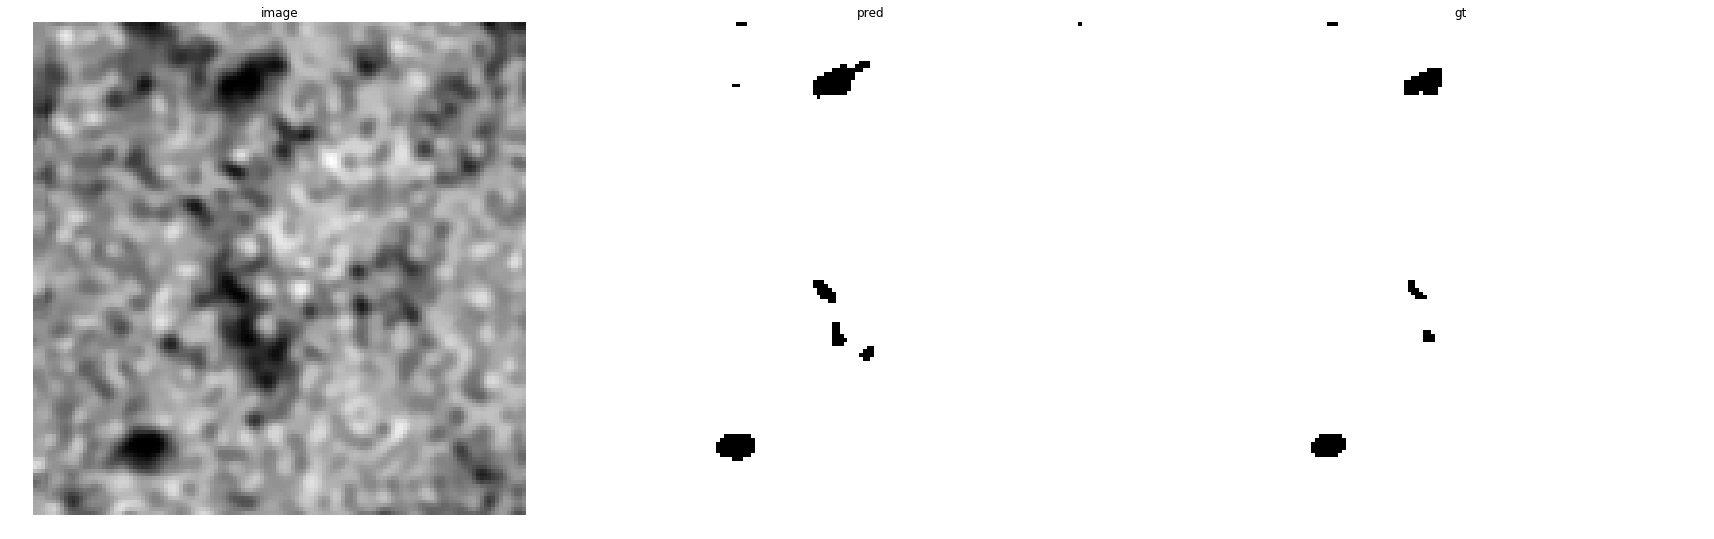

accuracy    : 0.9962158203125
precision   : 1.0
recall      : 0.9961867273510056
f1          : 0.9980897214690658
pr_auc      : 0.9999991562458439
iou         : 0.9961867273510056


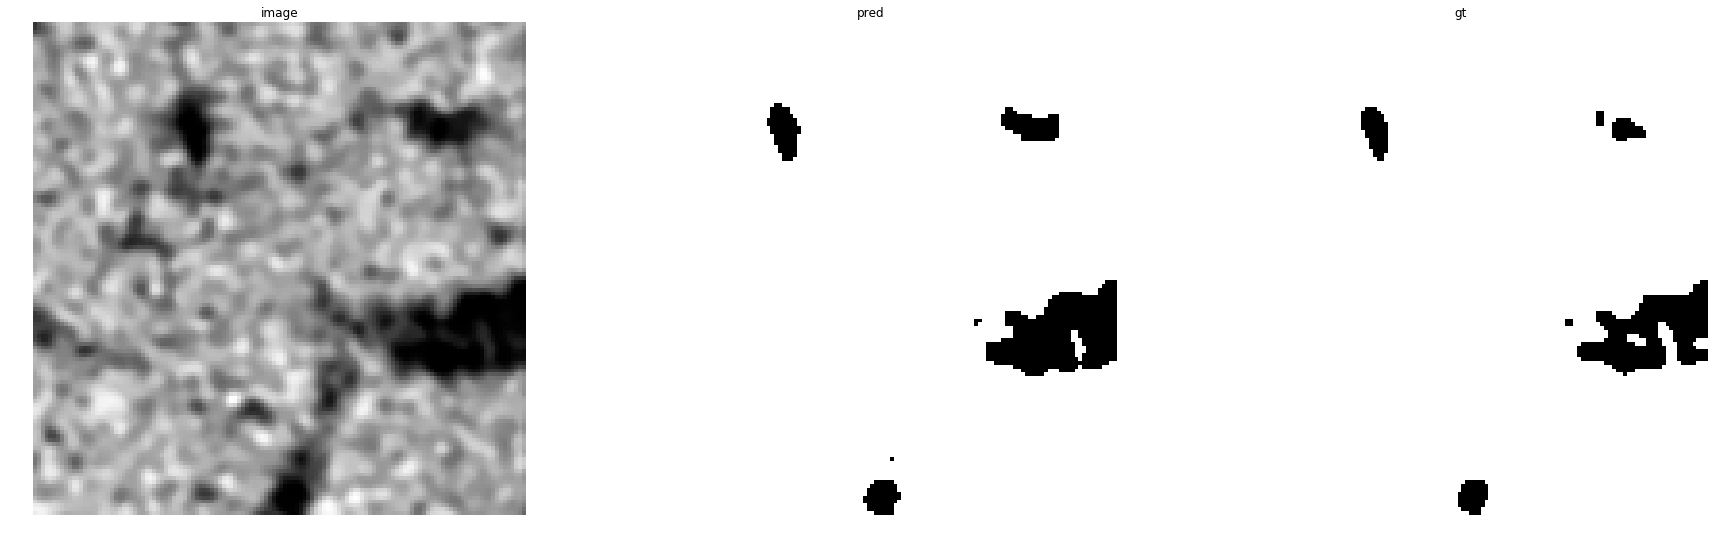

accuracy    : 0.99053955078125
precision   : 0.9999359097609434
recall      : 0.9902259456714902
f1          : 0.9950572403456743
pr_auc      : 0.9999852223596893
iou         : 0.9901631021133465


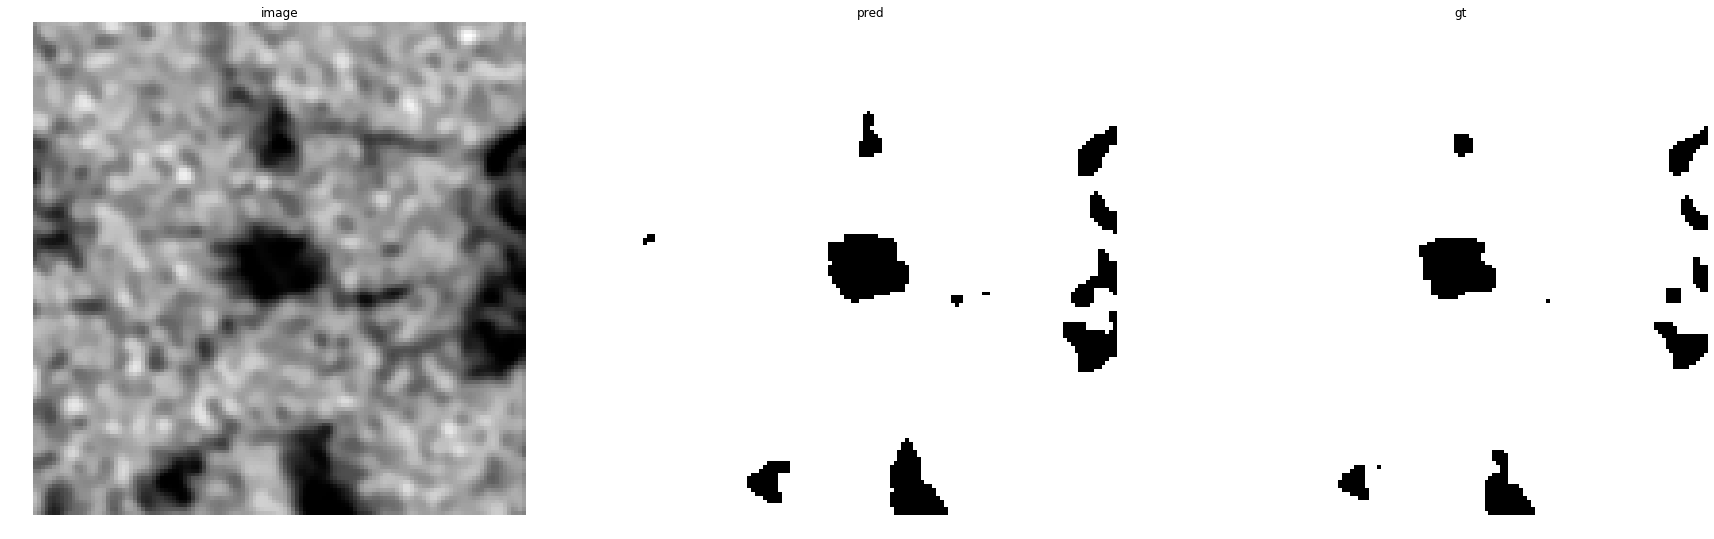

accuracy    : 0.9847412109375
precision   : 1.0
recall      : 0.9840744043827239
f1          : 0.991973287099467
pr_auc      : 0.9999770047187543
iou         : 0.9840744043827239


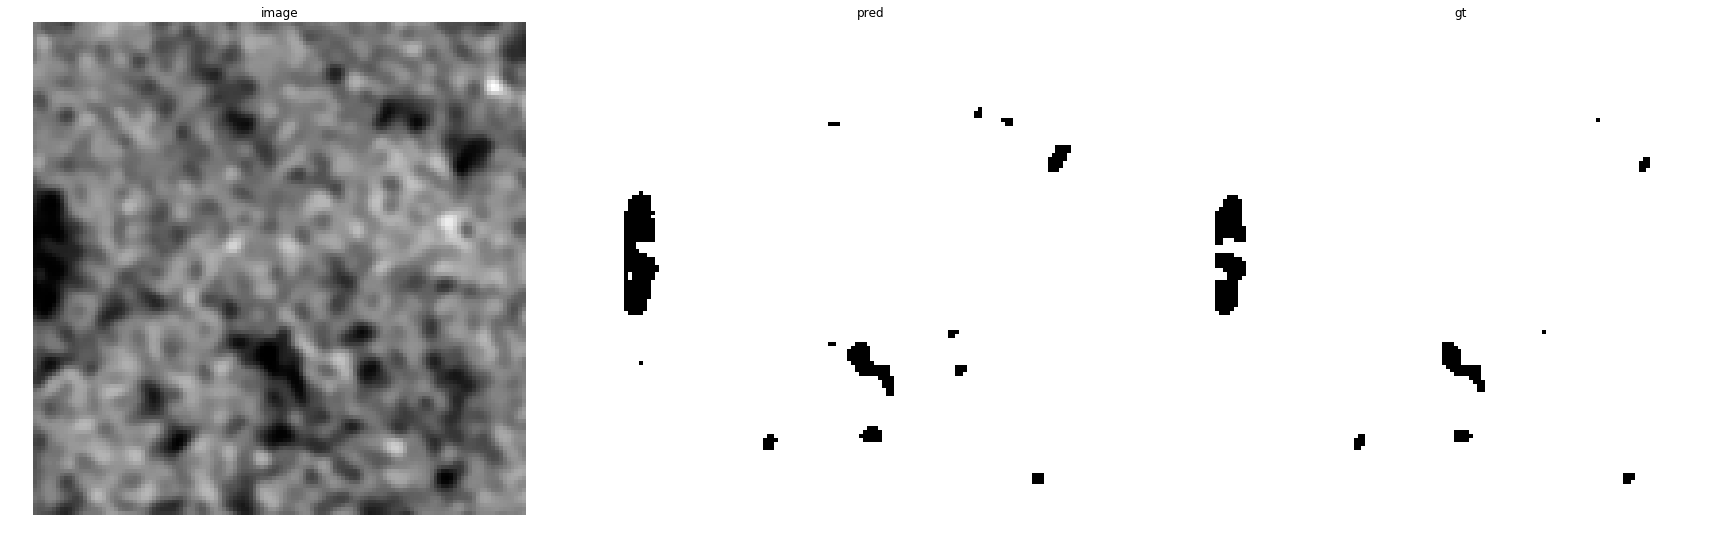

accuracy    : 0.99365234375
precision   : 0.9999375273317923
recall      : 0.9936060587249363
f1          : 0.9967617386972225
pr_auc      : 0.999994045273633
iou         : 0.993544382371198


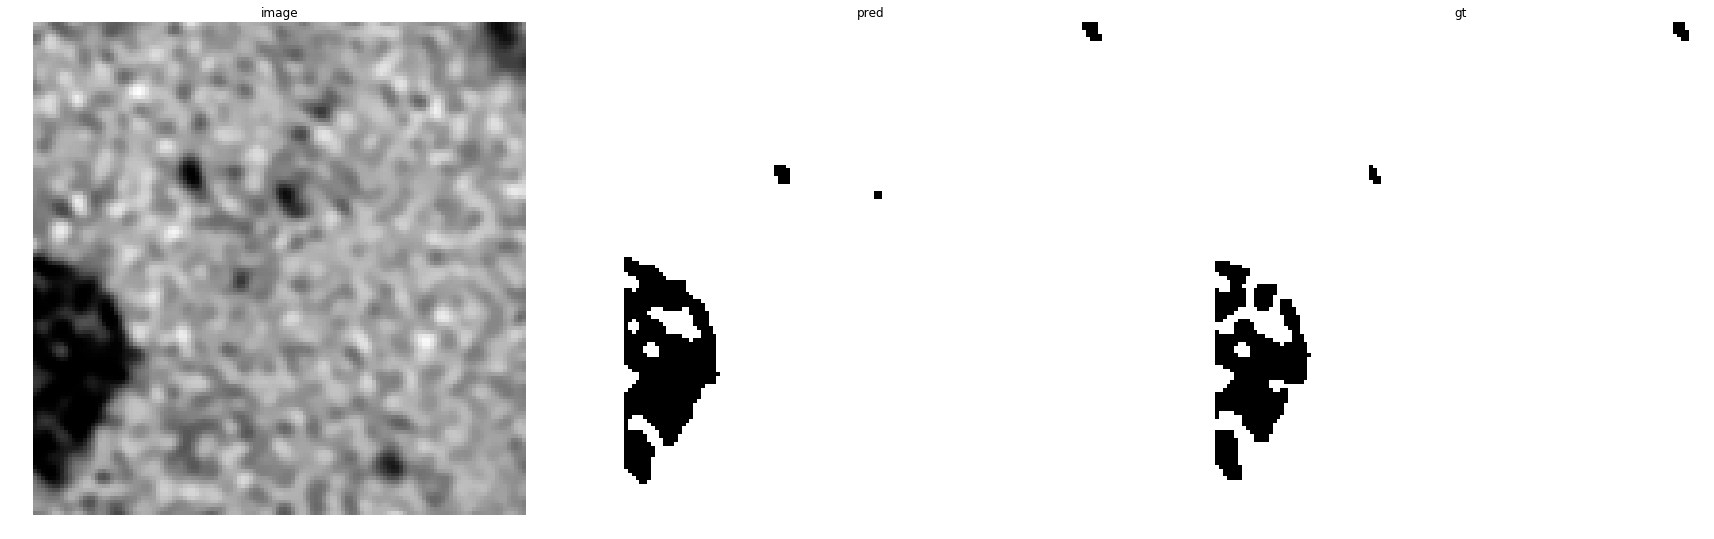

accuracy    : 0.9910888671875
precision   : 0.9998711672249421
recall      : 0.9908081194944466
f1          : 0.9953190125040077
pr_auc      : 0.9999730474330497
iou         : 0.9906816441153944


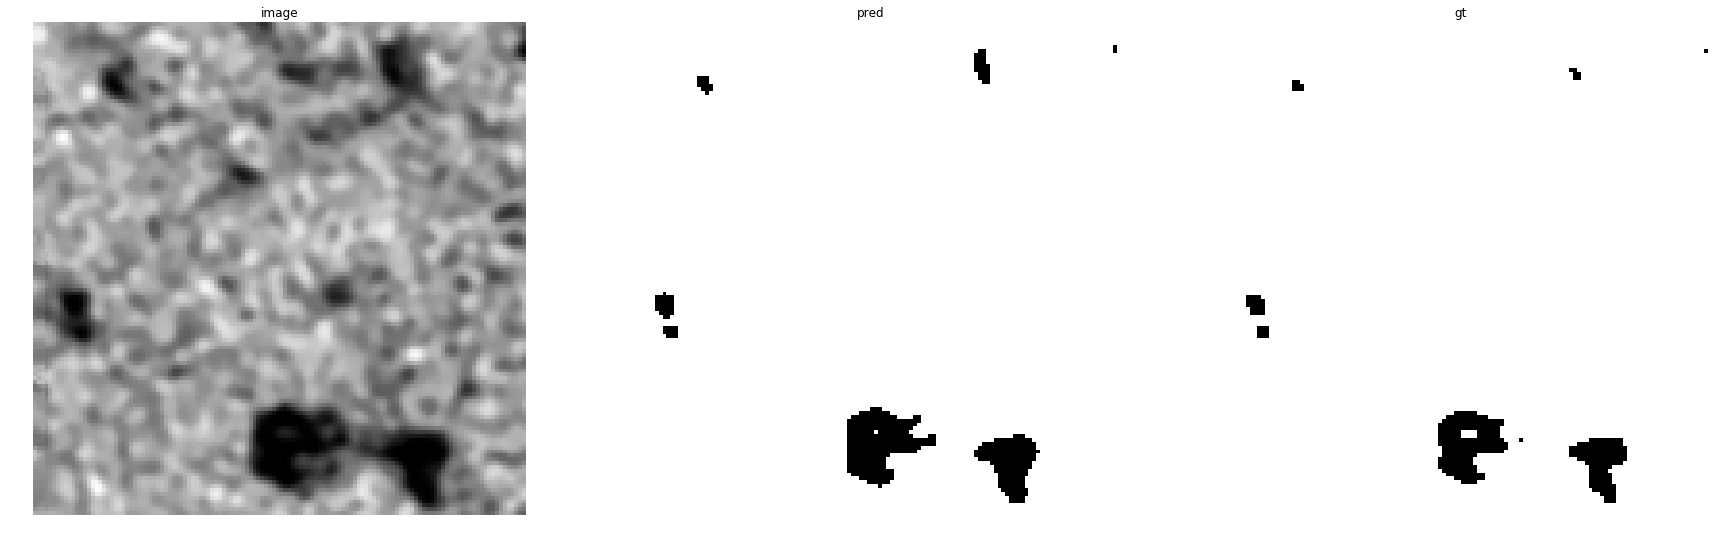

accuracy    : 0.99310302734375
precision   : 1.0
recall      : 0.9929242329367565
f1          : 0.9964495554089295
pr_auc      : 0.9999942210291847
iou         : 0.9929242329367565


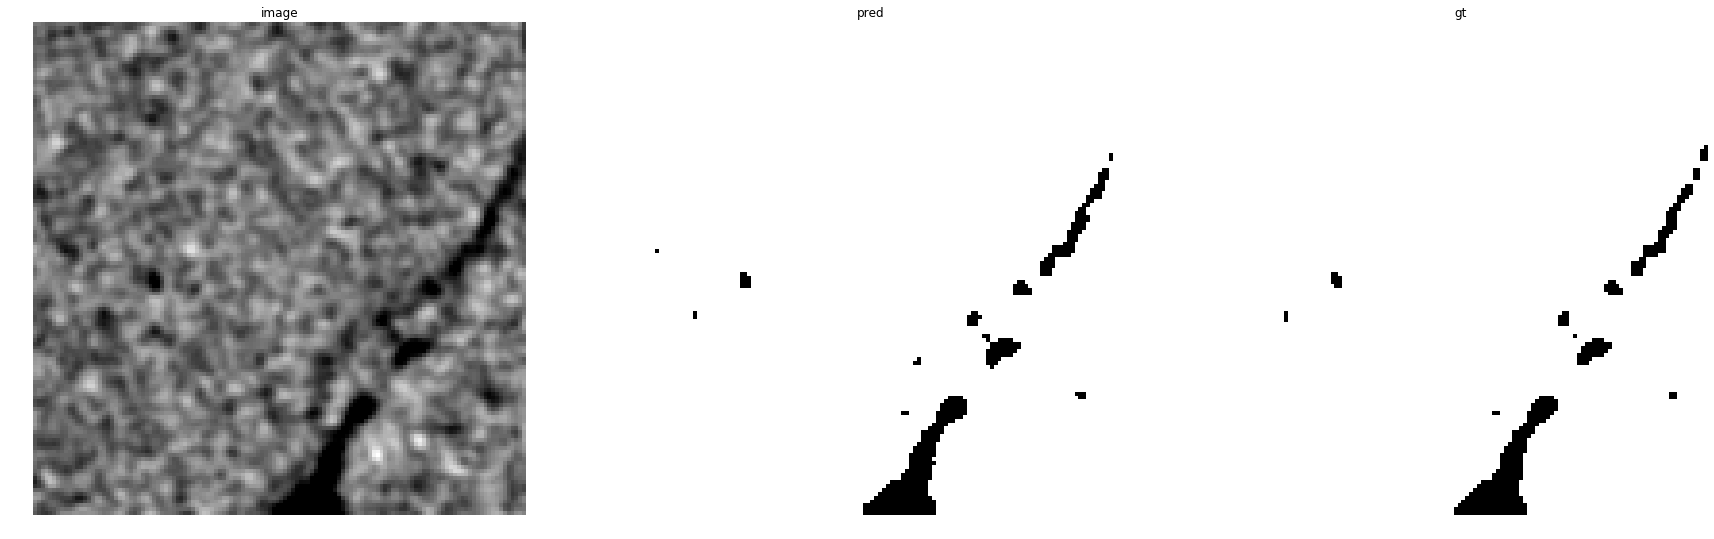

accuracy    : 0.9974365234375
precision   : 0.9995602462620933
recall      : 0.9978050921861282
f1          : 0.9986818980667839
pr_auc      : 0.9999945296993705
iou         : 0.9973672663448881


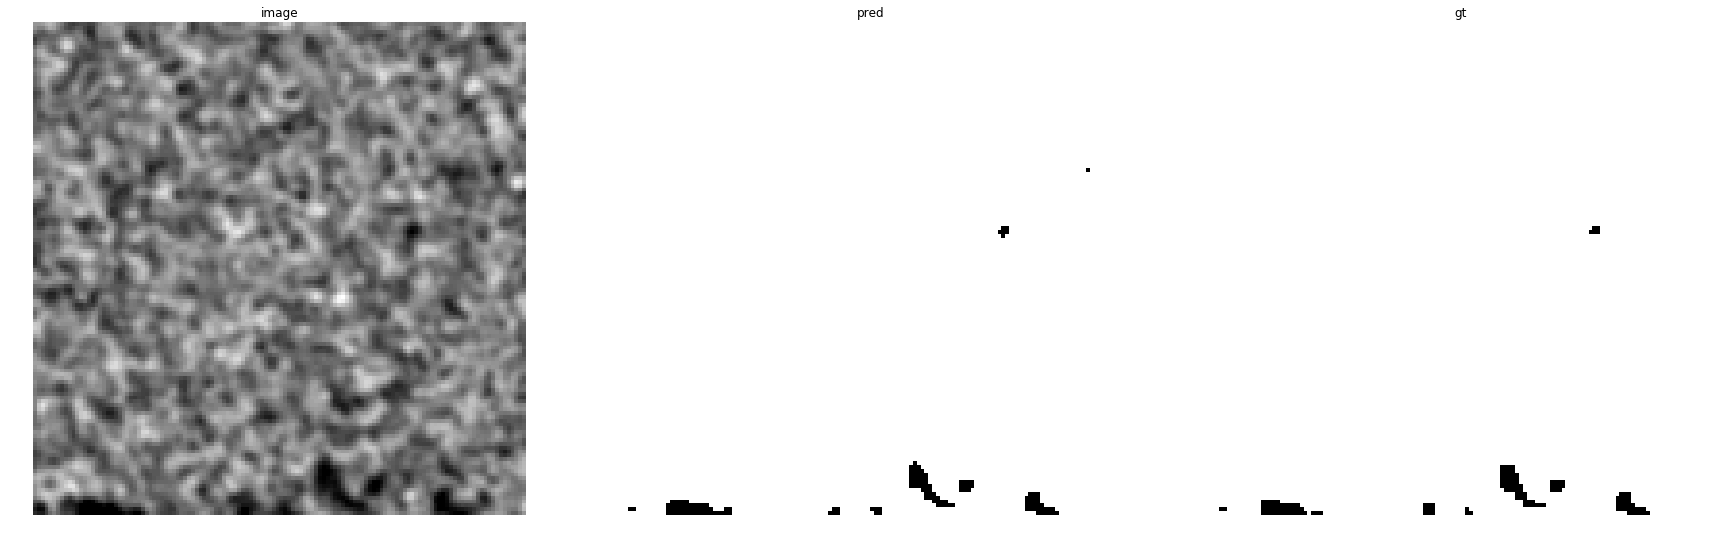

accuracy    : 0.99859619140625
precision   : 0.9994454371803562
recall      : 0.9991376124183812
f1          : 0.9992915010935527
pr_auc      : 0.9999985889395964
iou         : 0.9985840054177184


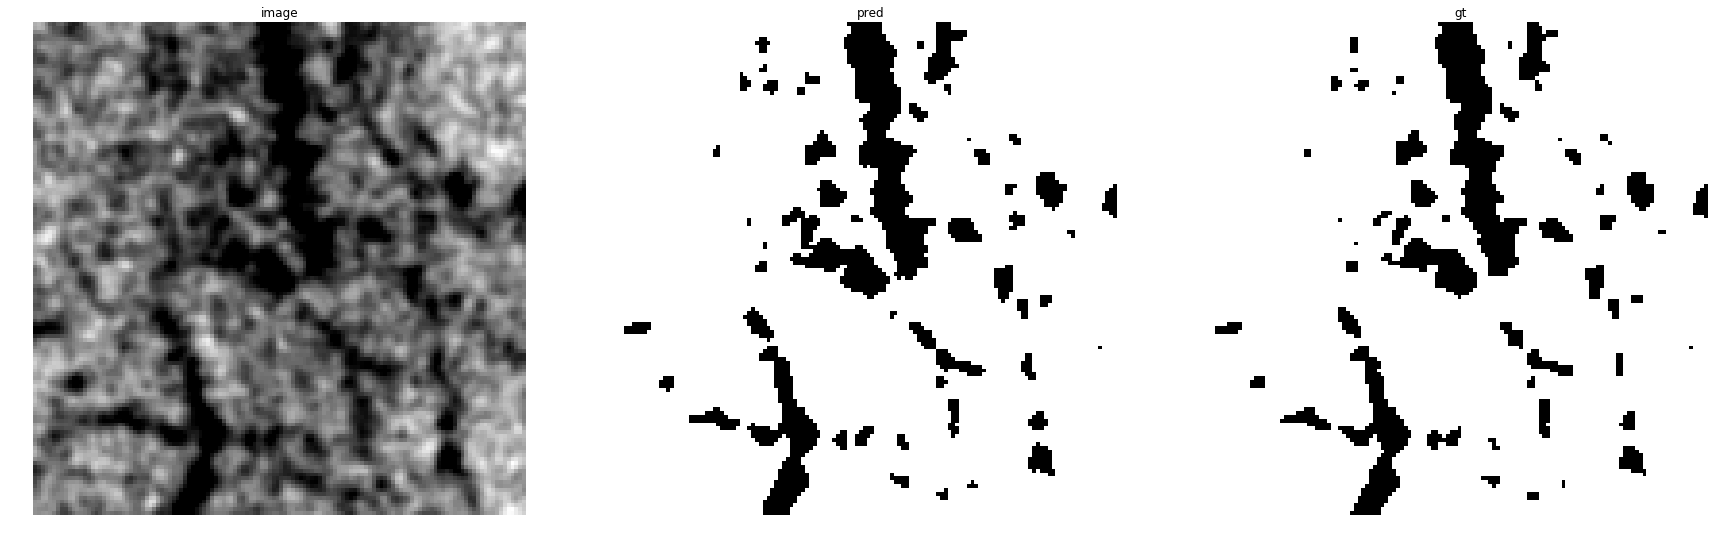

accuracy    : 0.9866943359375
precision   : 0.9979095533412305
recall      : 0.9870425253291061
f1          : 0.9924462924462923
pr_auc      : 0.999906119119894
iou         : 0.9850058463443153


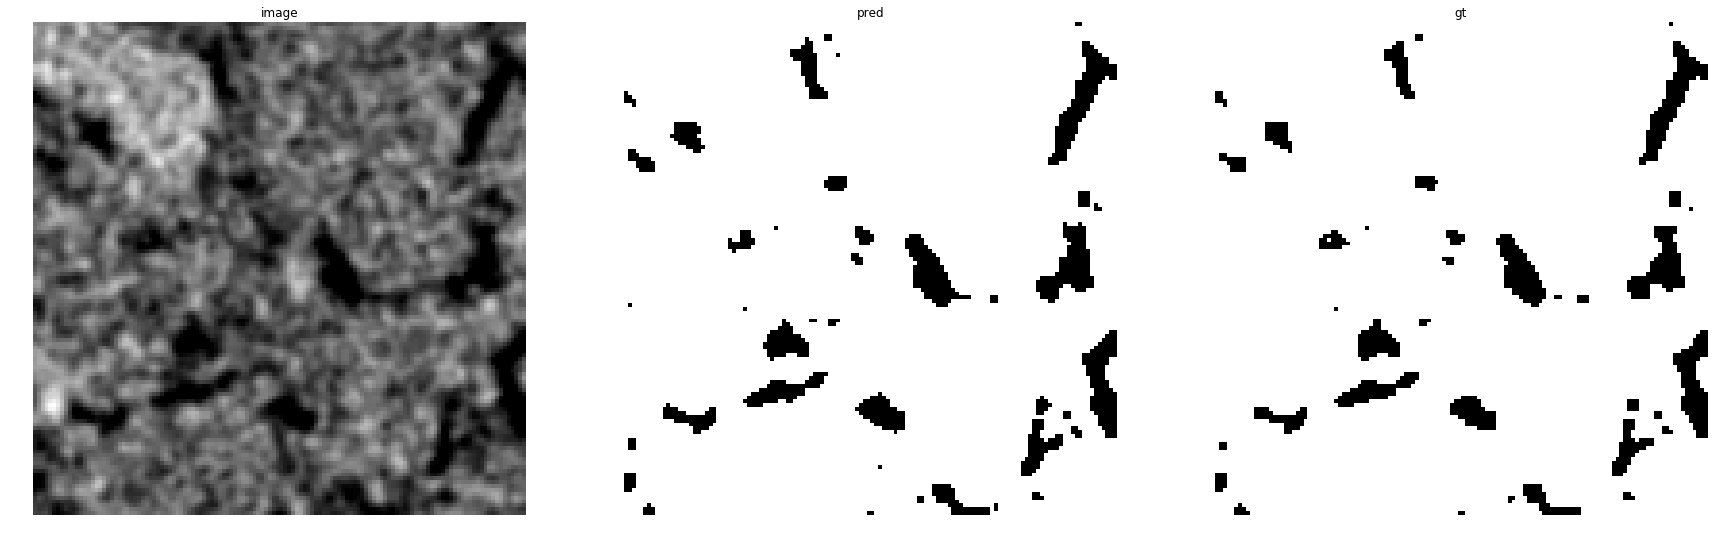

accuracy    : 0.99224853515625
precision   : 0.9989362409414267
recall      : 0.9926664904862579
f1          : 0.9957914968353382
pr_auc      : 0.9999627237728638
iou         : 0.9916182682154171


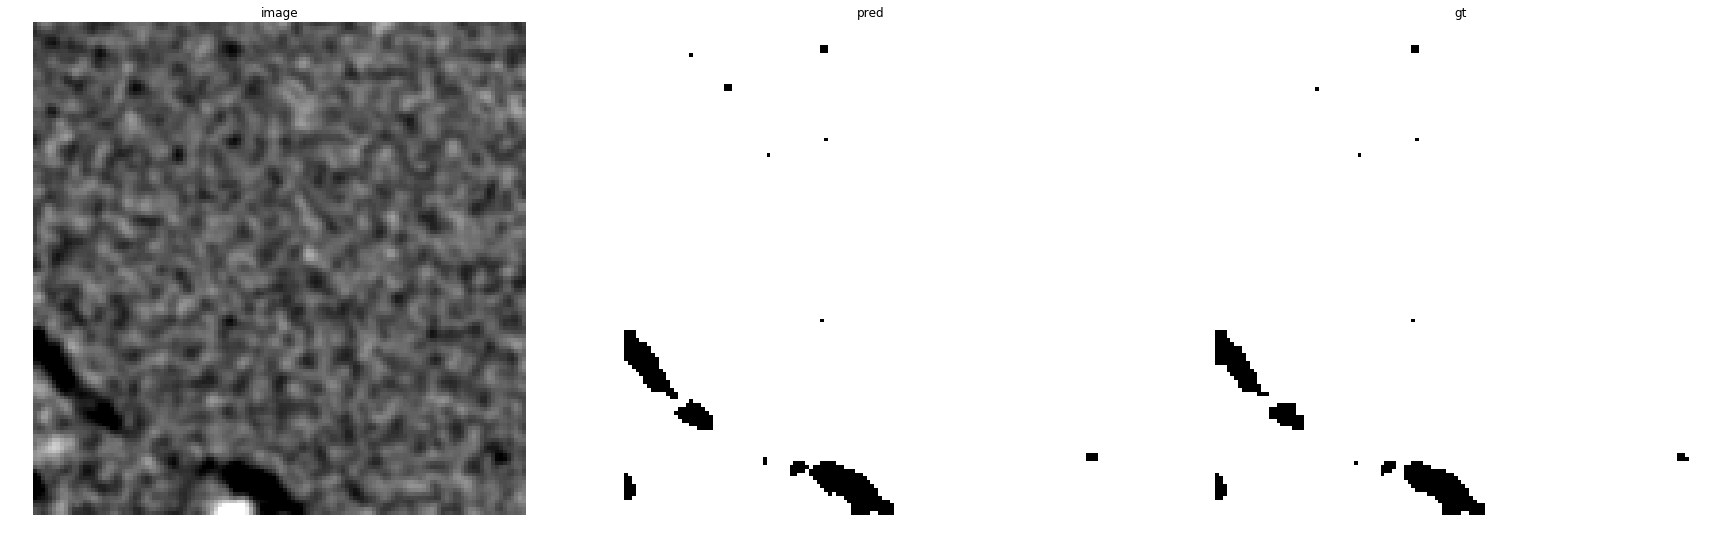

accuracy    : 0.9981689453125
precision   : 0.9998751716389964
recall      : 0.9982552342971087
f1          : 0.999064546304958
pr_auc      : 0.9999990176869554
iou         : 0.9981308411214953


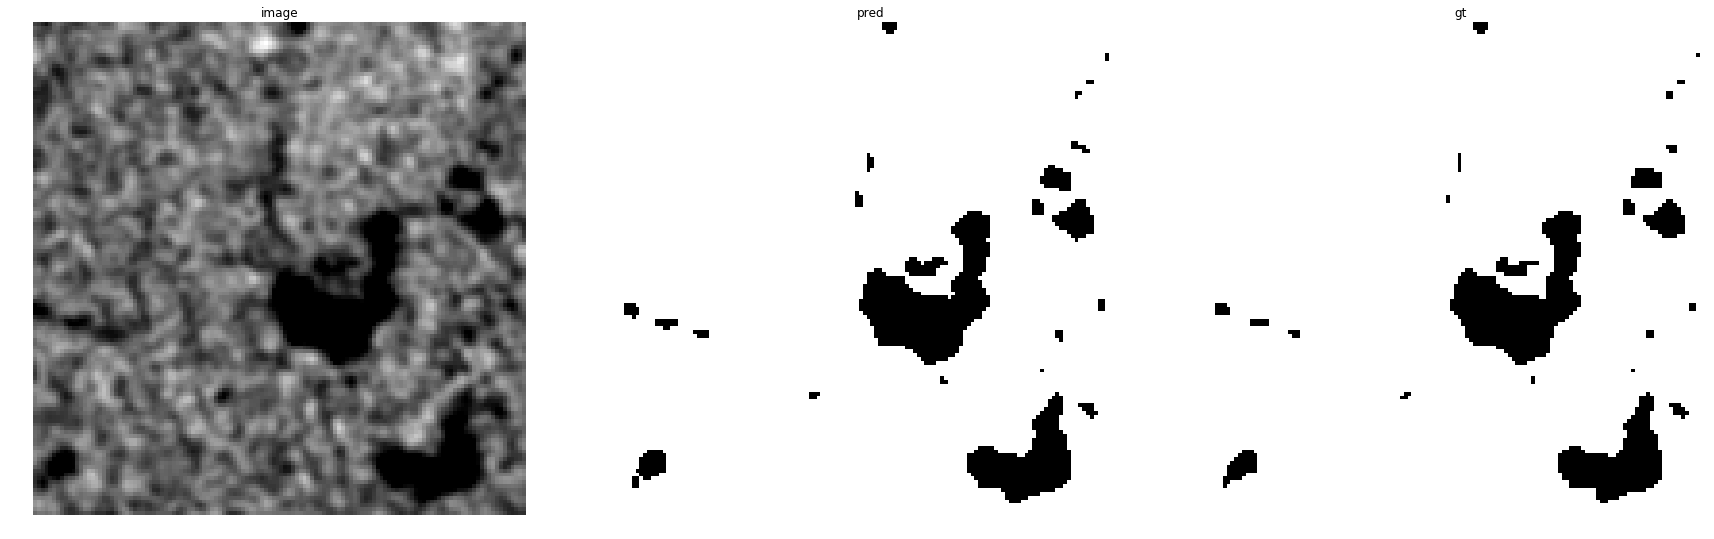

accuracy    : 0.9949951171875
precision   : 0.9991364421416234
recall      : 0.9954334877564527
f1          : 0.9972815276488529
pr_auc      : 0.9999883944863983
iou         : 0.9945777954109635


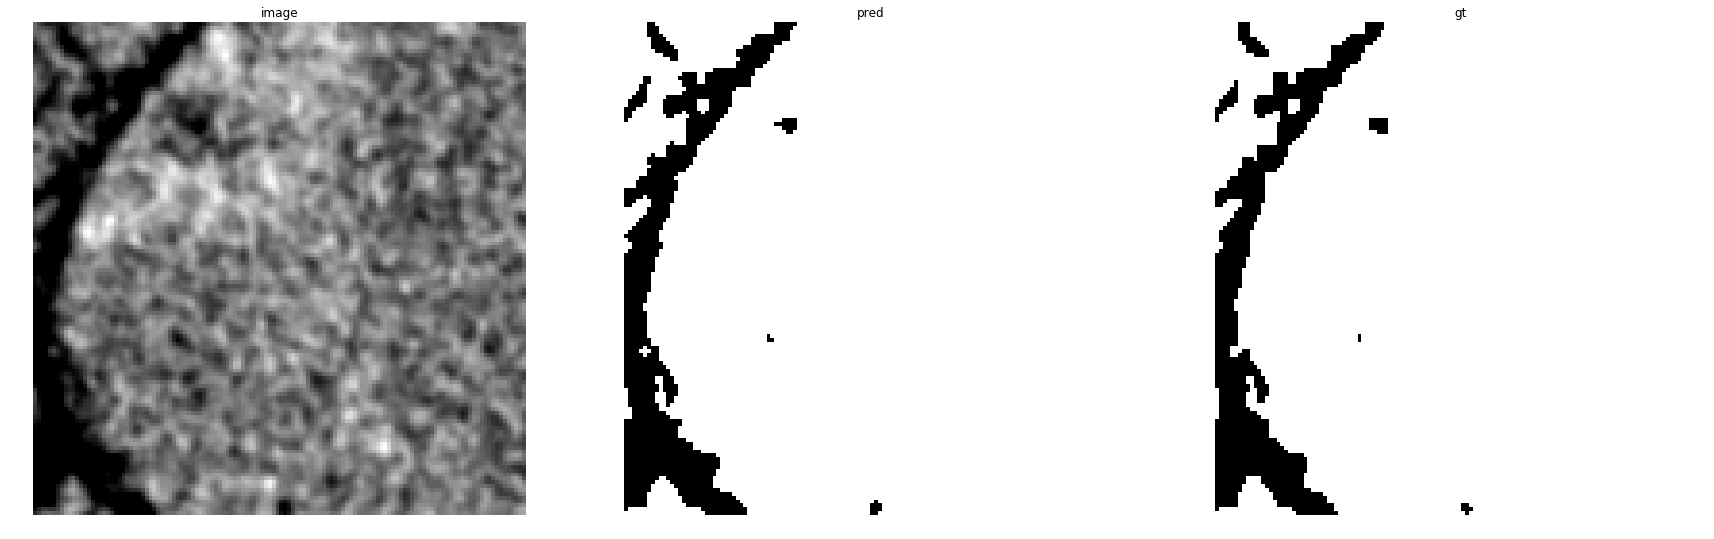

accuracy    : 0.9949951171875
precision   : 0.9991936567665637
recall      : 0.9953145917001339
f1          : 0.9972503520890618
pr_auc      : 0.9999866307294868
iou         : 0.9945157838416265


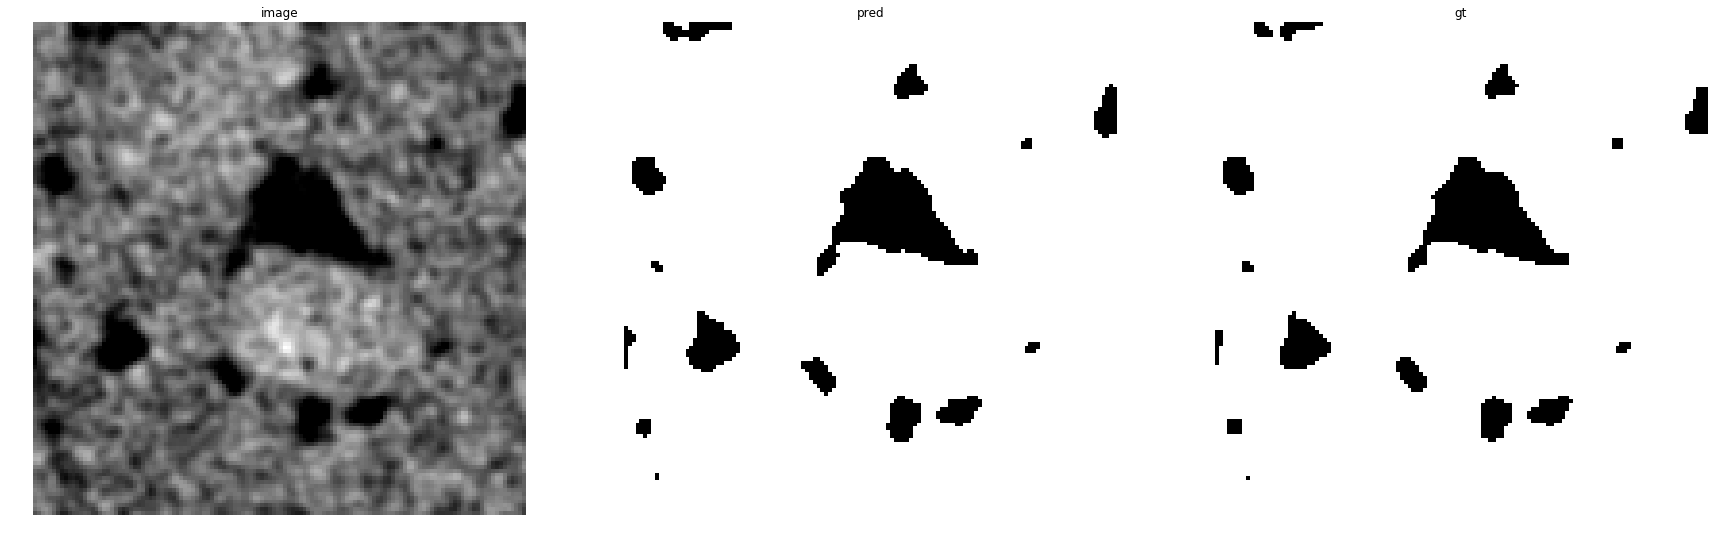

accuracy    : 0.99530029296875
precision   : 0.9995386237806486
recall      : 0.9954053167049557
f1          : 0.9974676883612327
pr_auc      : 0.9999883208171406
iou         : 0.9949481695315575


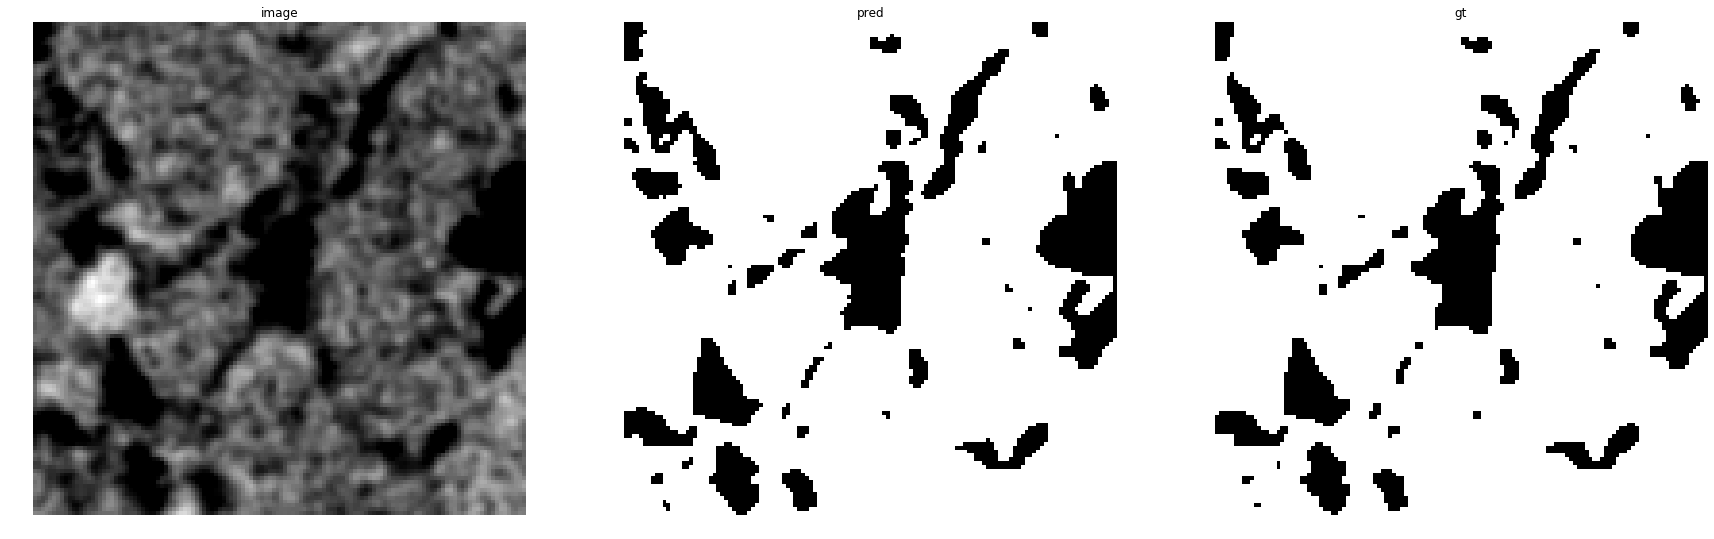

accuracy    : 0.98712158203125
precision   : 0.9982061439569474
recall      : 0.9861911091419289
f1          : 0.9921622525166227
pr_auc      : 0.9998783400278867
iou         : 0.9844464101430046


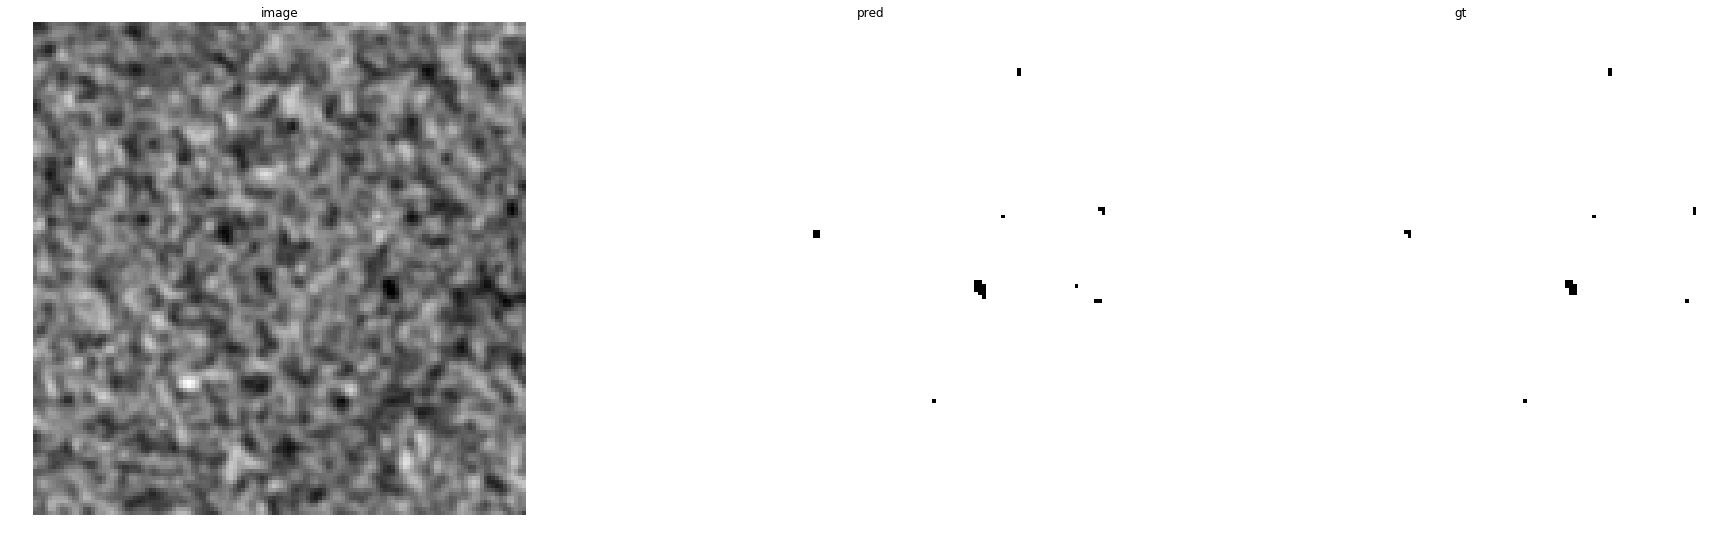

accuracy    : 0.9996337890625
precision   : 1.0
recall      : 0.9996333638863428
f1          : 0.9998166483314999
pr_auc      : 0.9999999738685399
iou         : 0.9996333638863428


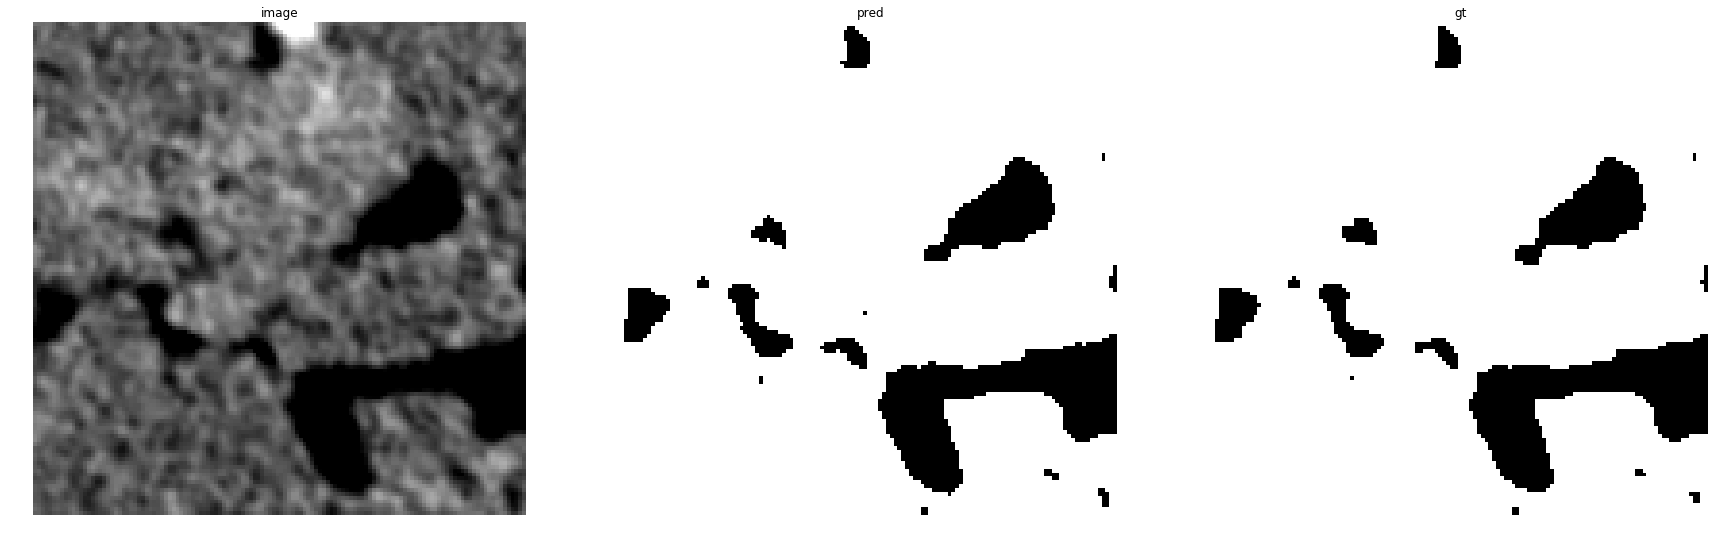

accuracy    : 0.9959716796875
precision   : 0.9990254089801601
recall      : 0.9963896410470041
f1          : 0.9977057842046719
pr_auc      : 0.999985193576649
iou         : 0.9954220711659846


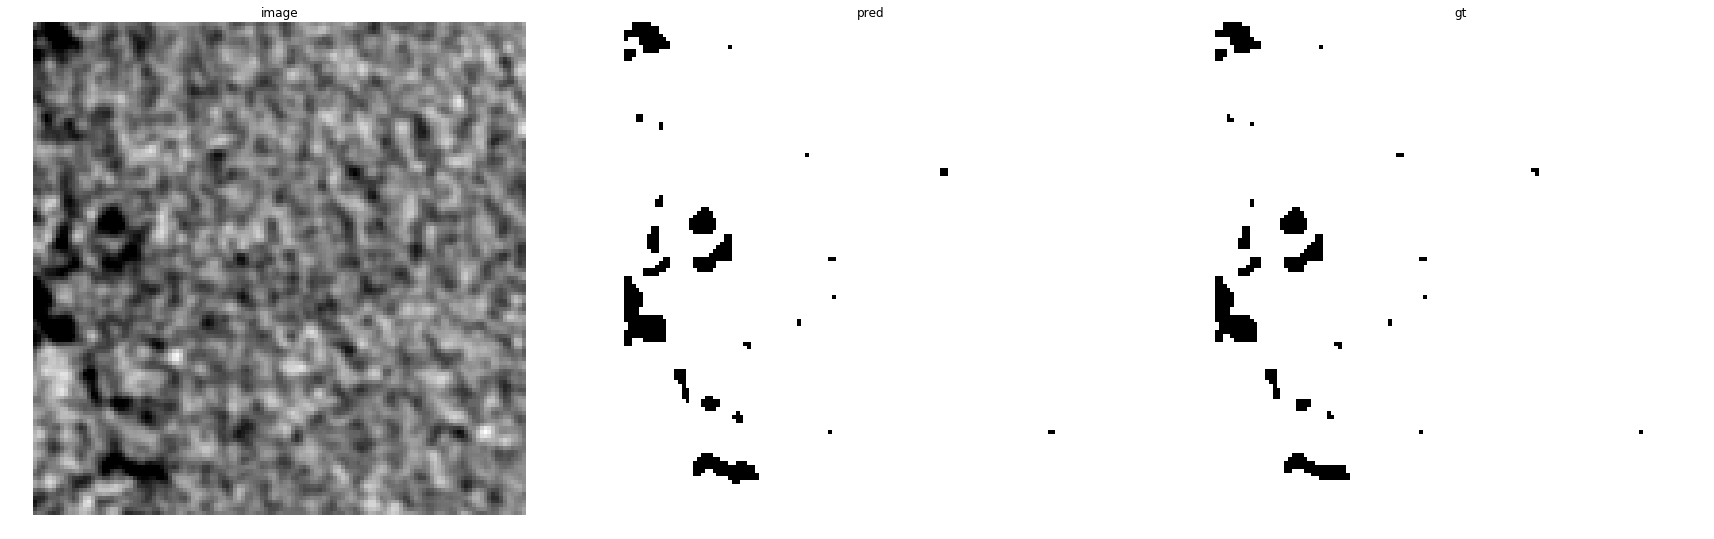

accuracy    : 0.997314453125
precision   : 0.9998745452264459
recall      : 0.9973720435489927
f1          : 0.9986217266006766
pr_auc      : 0.9999967643456454
iou         : 0.9972472472472472


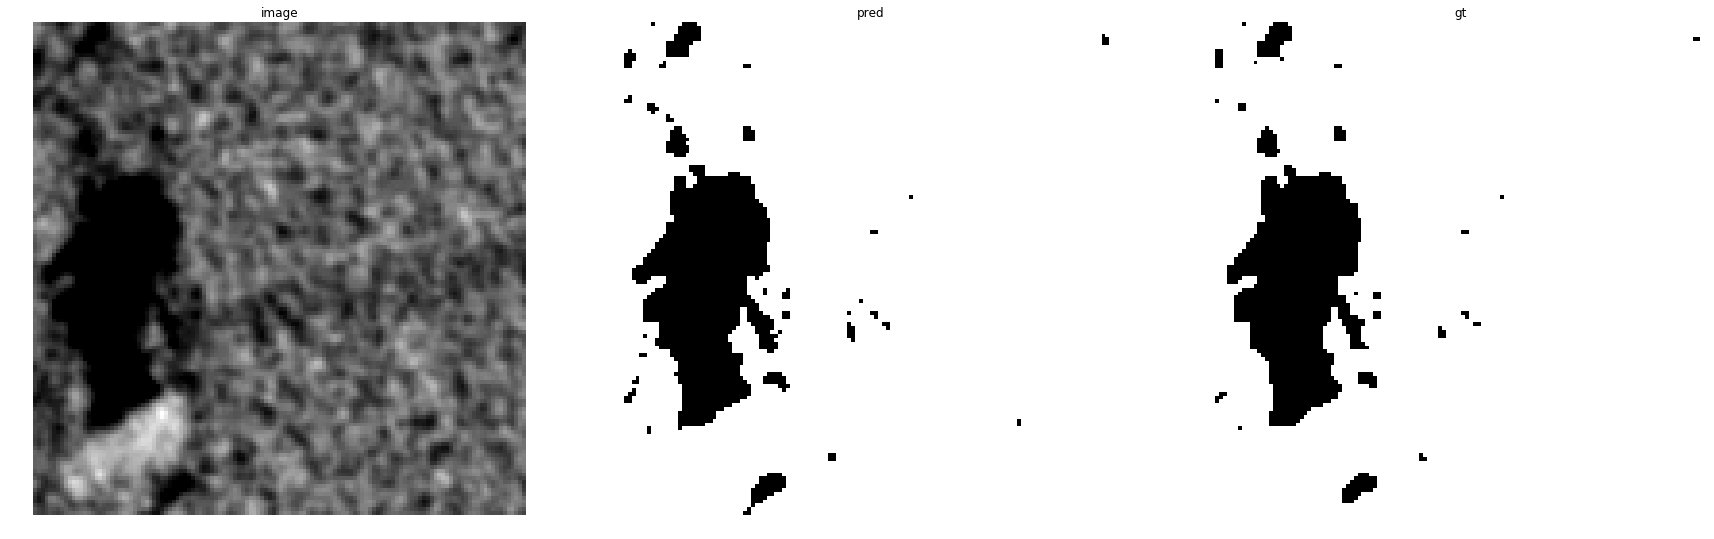

accuracy    : 0.9942626953125
precision   : 0.998905758446177
recall      : 0.9946880958866794
f1          : 0.9967924657066812
pr_auc      : 0.9999803842356076
iou         : 0.9936054421768707


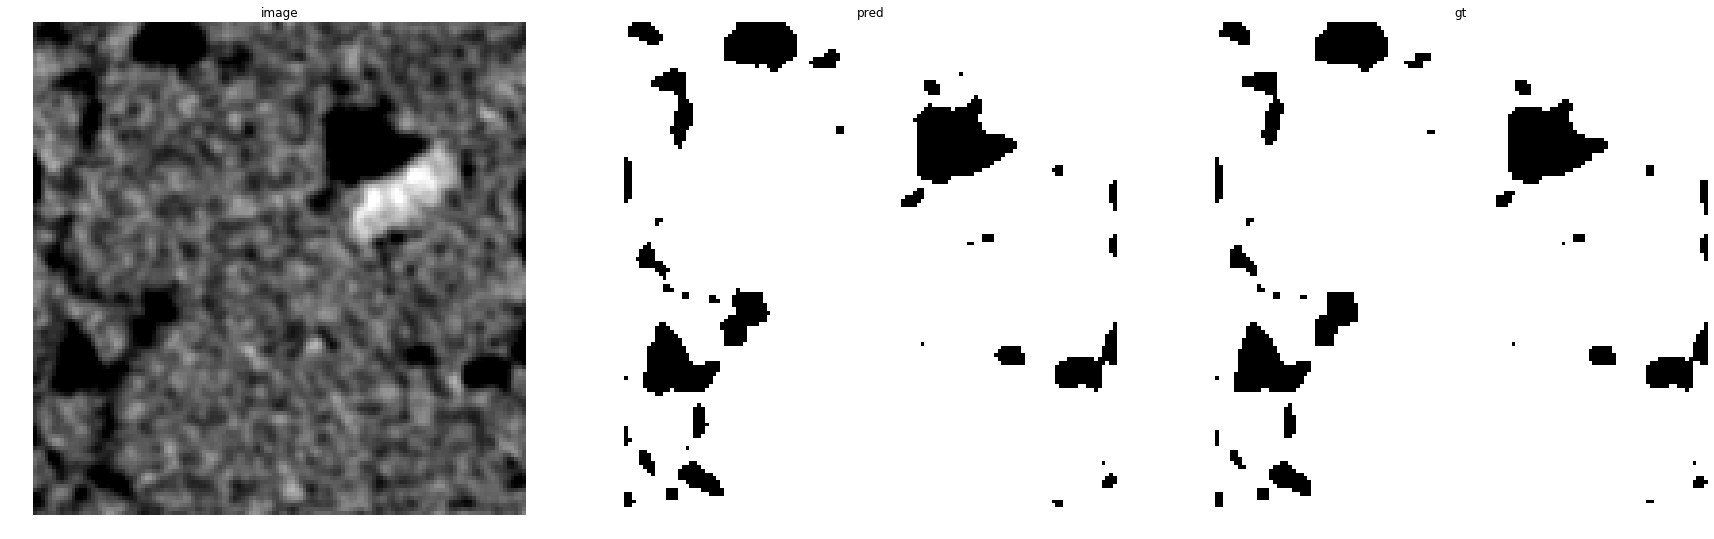

accuracy    : 0.99371337890625
precision   : 0.999260553912342
recall      : 0.9938490338971719
f1          : 0.9965474474575136
pr_auc      : 0.9999794799100341
iou         : 0.9931186531266702


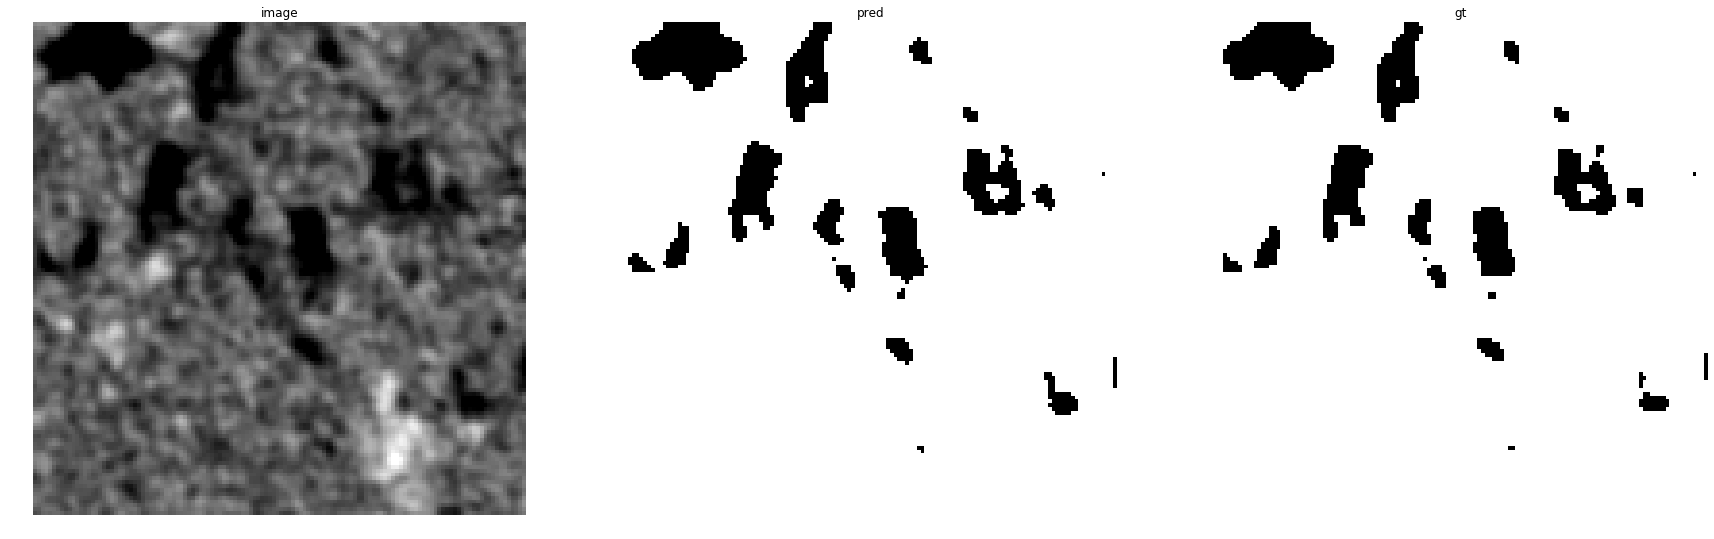

accuracy    : 0.99285888671875
precision   : 0.999131306381557
recall      : 0.9930924548352816
f1          : 0.9961027280903368
pr_auc      : 0.9999779837583667
iou         : 0.9922357157077444


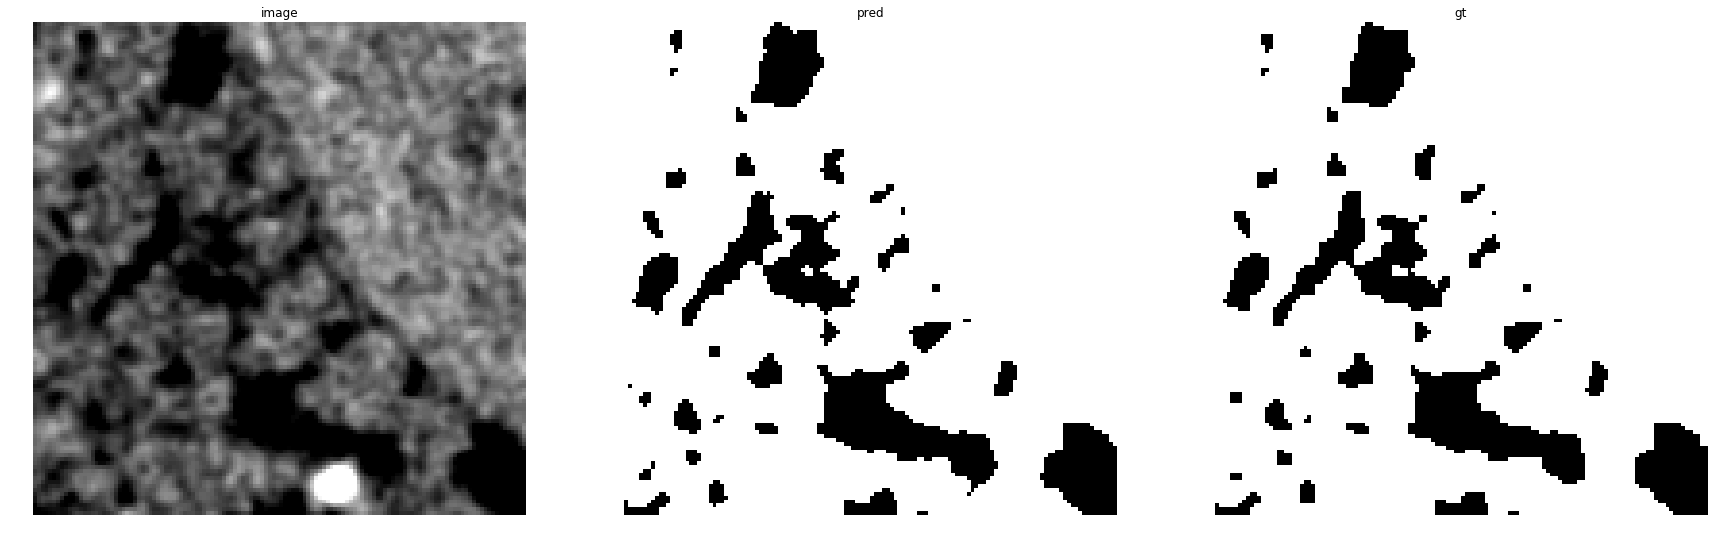

accuracy    : 0.989990234375
precision   : 0.9979764399797644
recall      : 0.990247400501972
f1          : 0.9940968972716148
pr_auc      : 0.9999261916349784
iou         : 0.9882630787948186


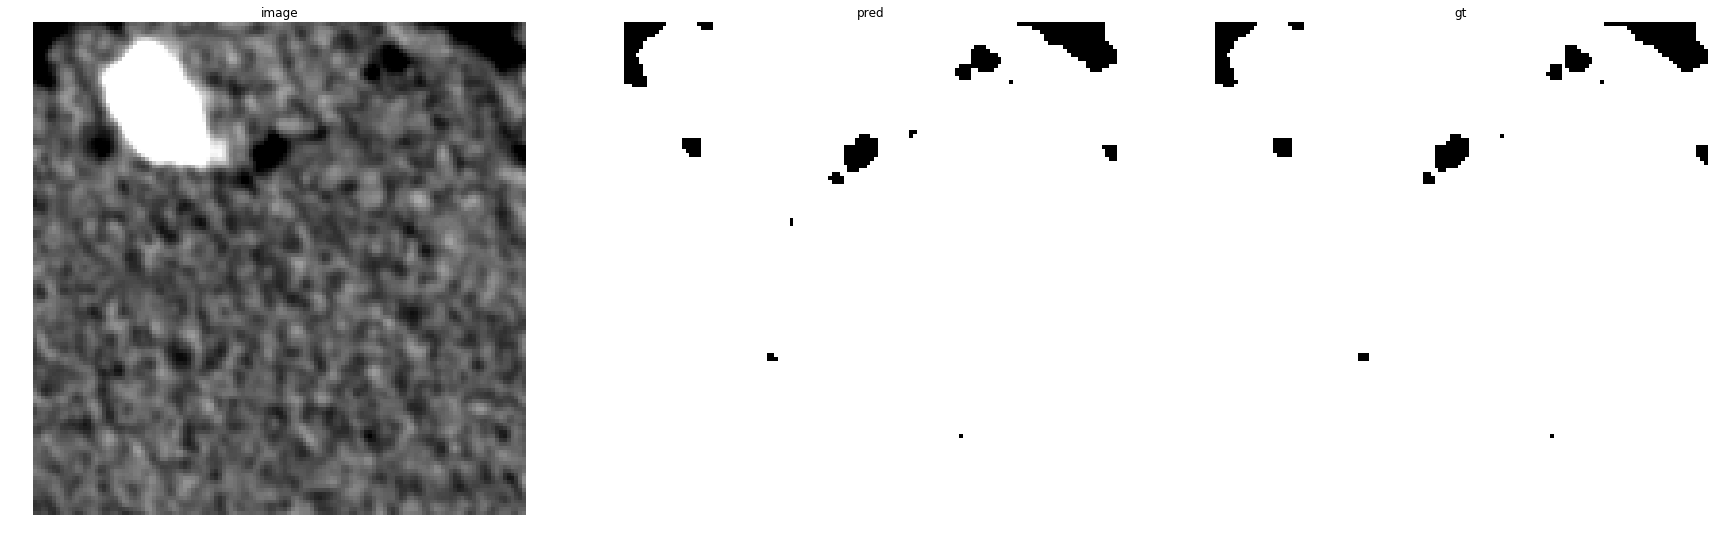

accuracy    : 0.9984130859375
precision   : 0.9995605499403604
recall      : 0.99880810488677
f1          : 0.9991841857546281
pr_auc      : 0.9999980599037772
iou         : 0.9983697015299724


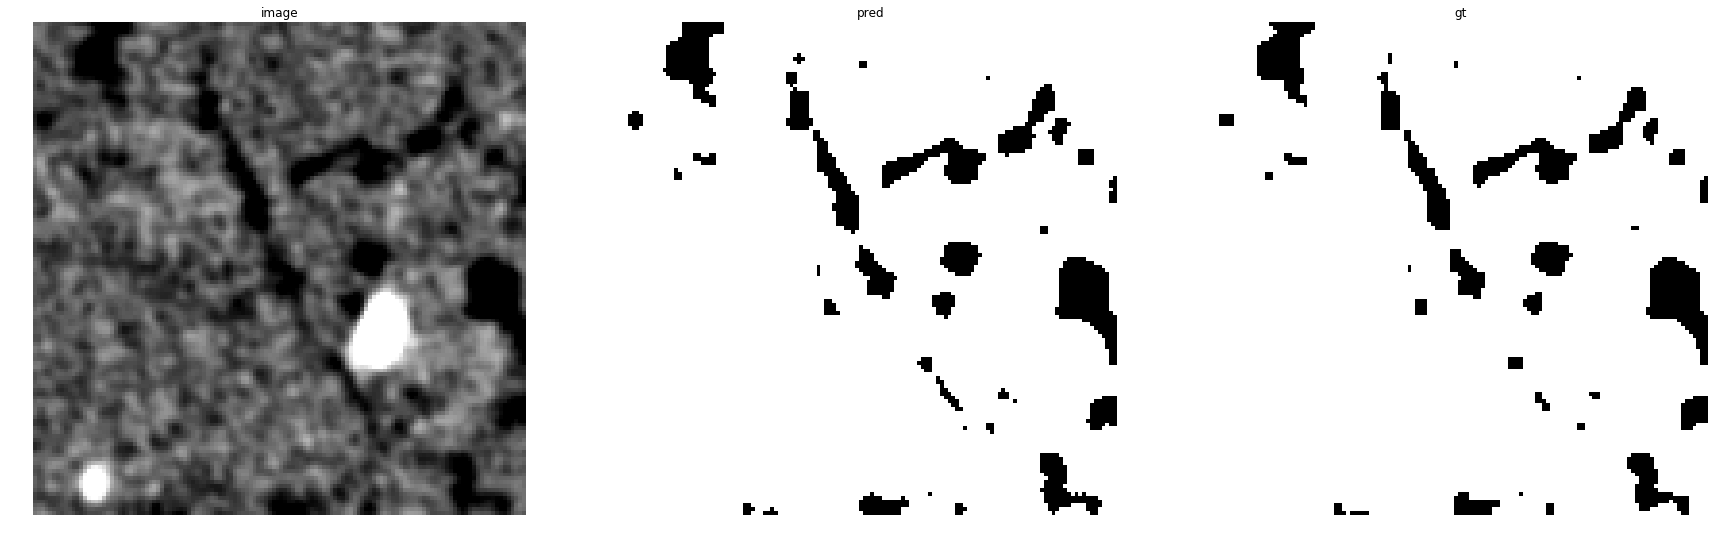

accuracy    : 0.990966796875
precision   : 0.9984568936598457
recall      : 0.9916705537415873
f1          : 0.9950521529820808
pr_auc      : 0.999957472507647
iou         : 0.9901530272787757


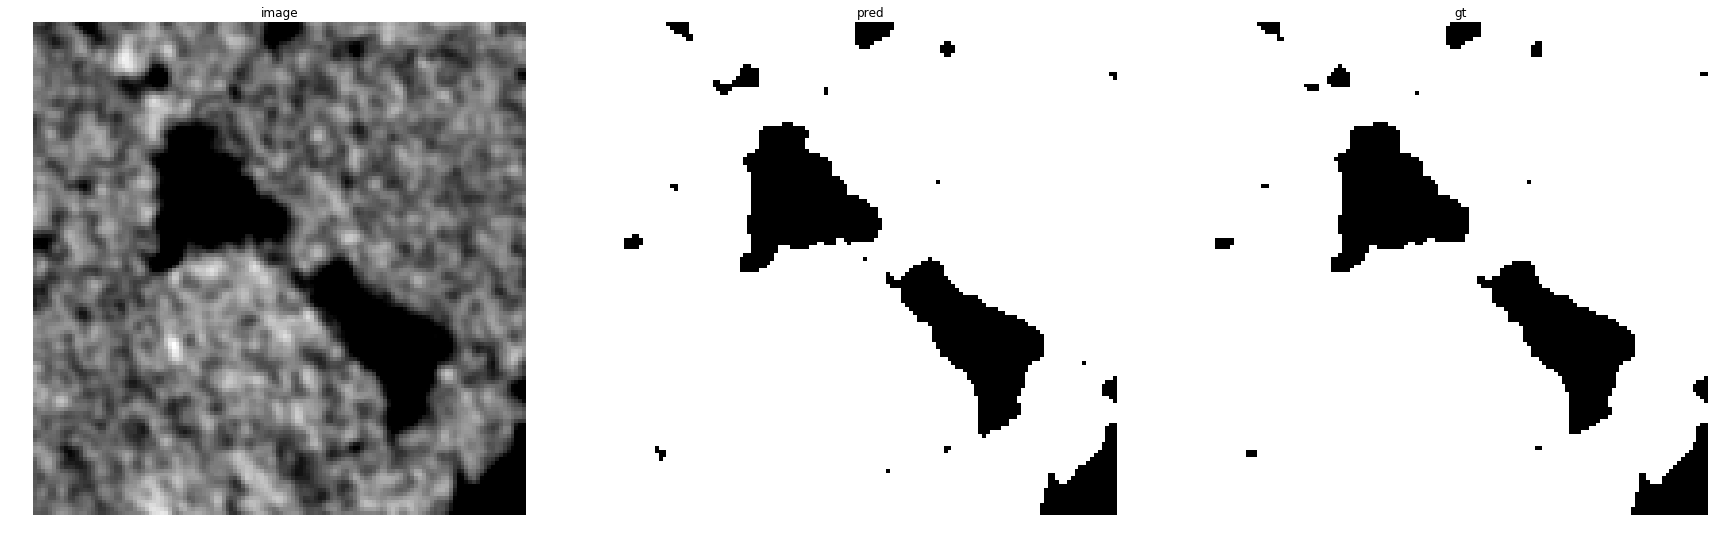

accuracy    : 0.99591064453125
precision   : 0.9994423532692039
recall      : 0.9959019240119469
f1          : 0.9976689976689977
pr_auc      : 0.9999881784493696
iou         : 0.9953488372093023


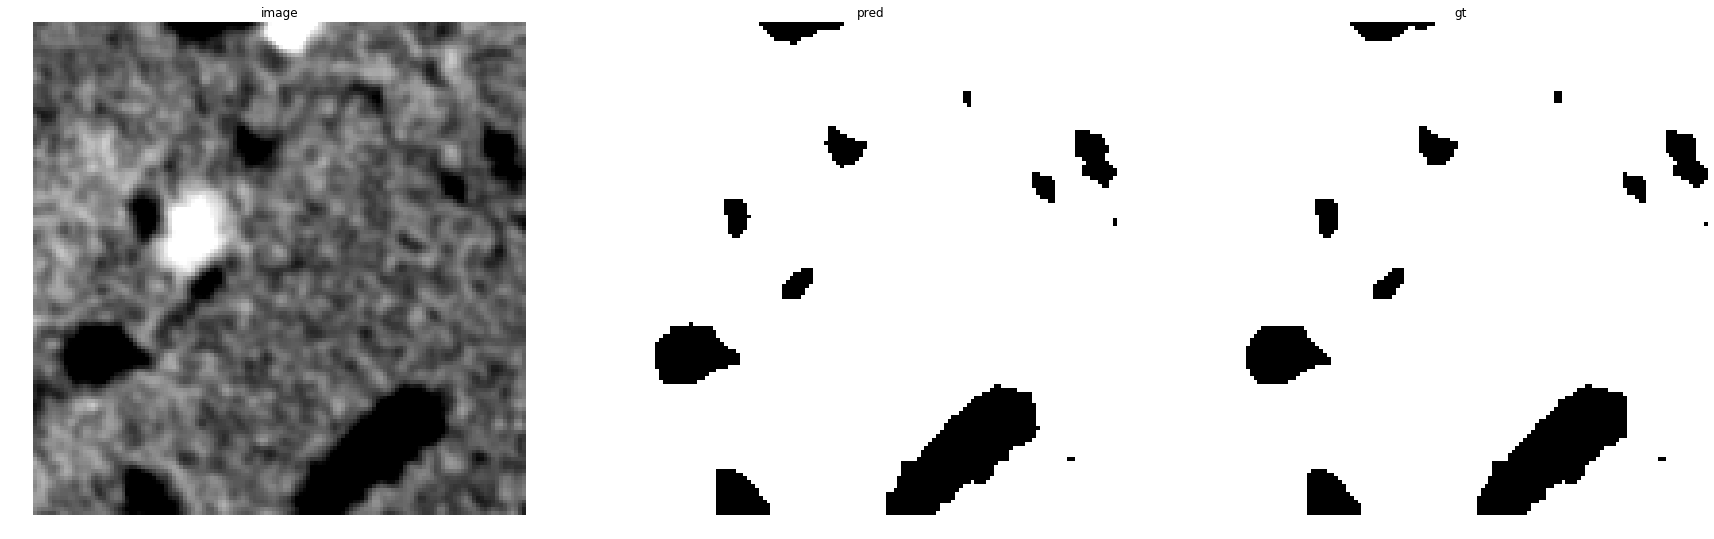

accuracy    : 0.9970703125
precision   : 0.9992644108599705
recall      : 0.9975300400534045
f1          : 0.9983964722389256
pr_auc      : 0.9999939587227213
iou         : 0.9967980788473084


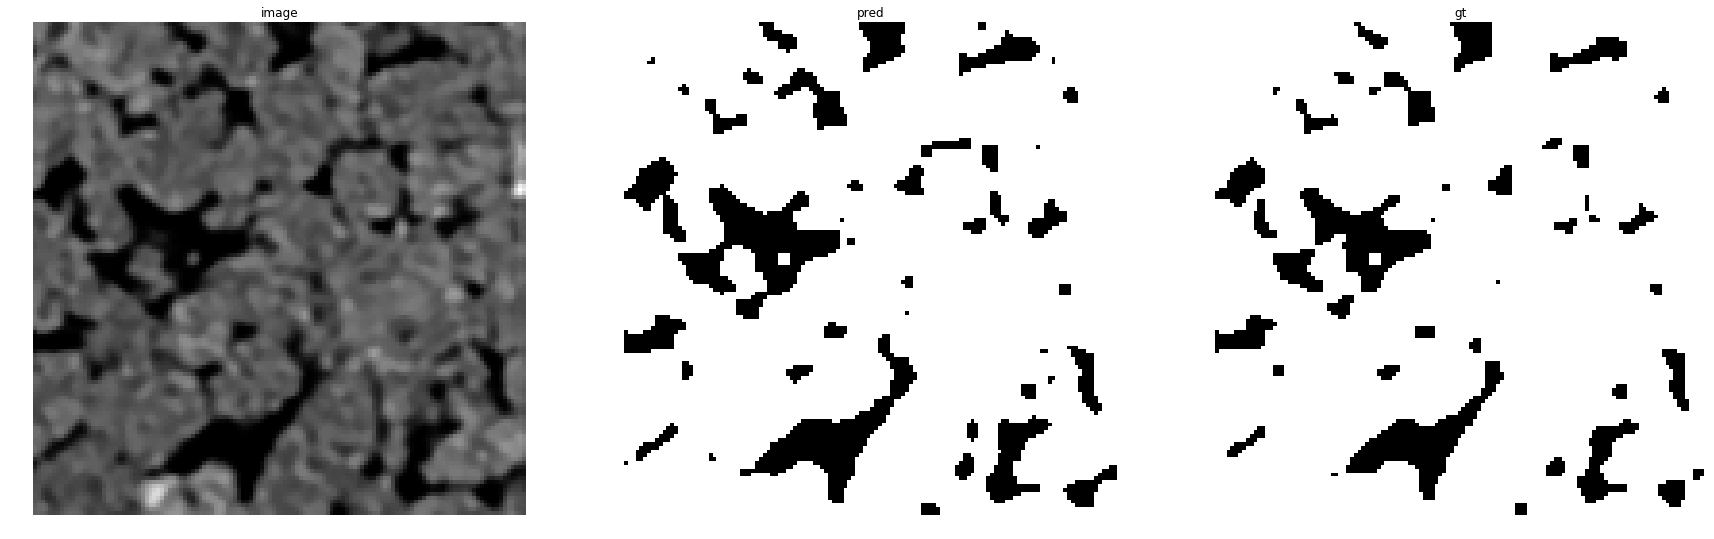

accuracy    : 0.9703369140625
precision   : 1.0
recall      : 0.9663084922010399
f1          : 0.9828656042871246
pr_auc      : 0.9999028679220416
iou         : 0.9663084922010399


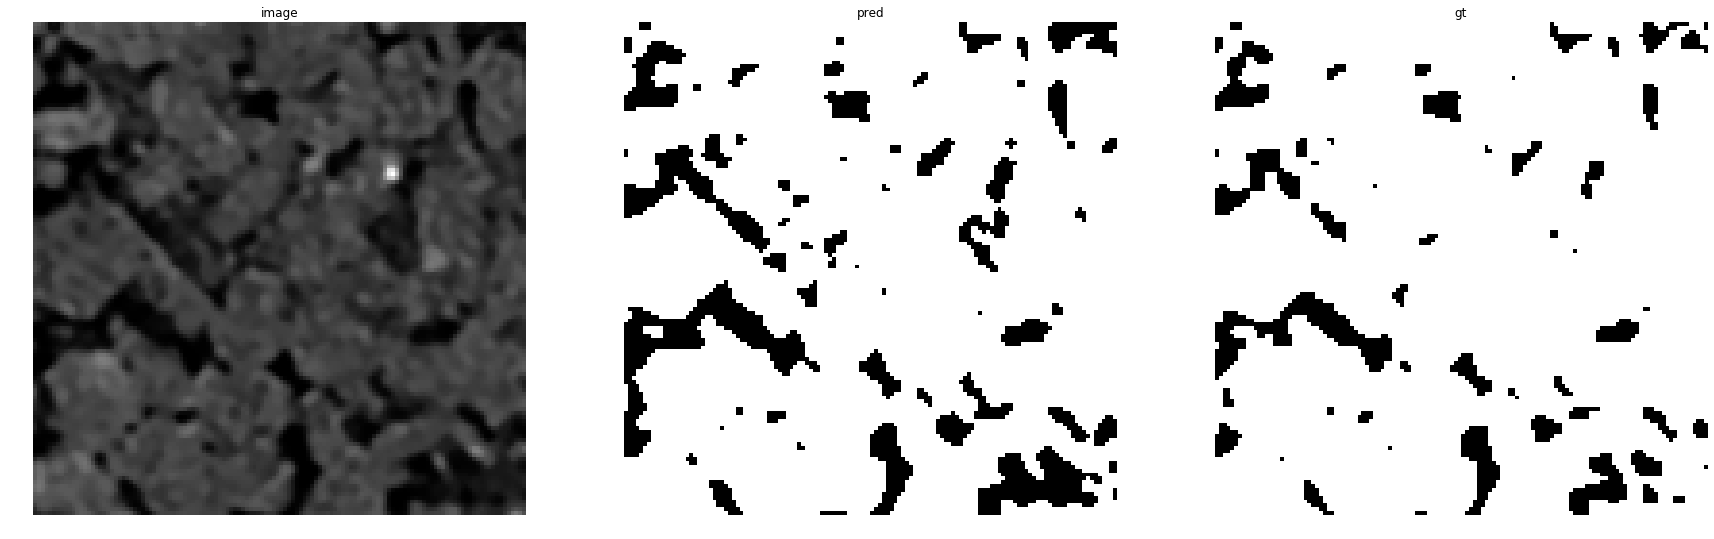

accuracy    : 0.94549560546875
precision   : 1.0
recall      : 0.9392434344808818
f1          : 0.9686699645651335
pr_auc      : 0.9997356616218165
iou         : 0.9392434344808818


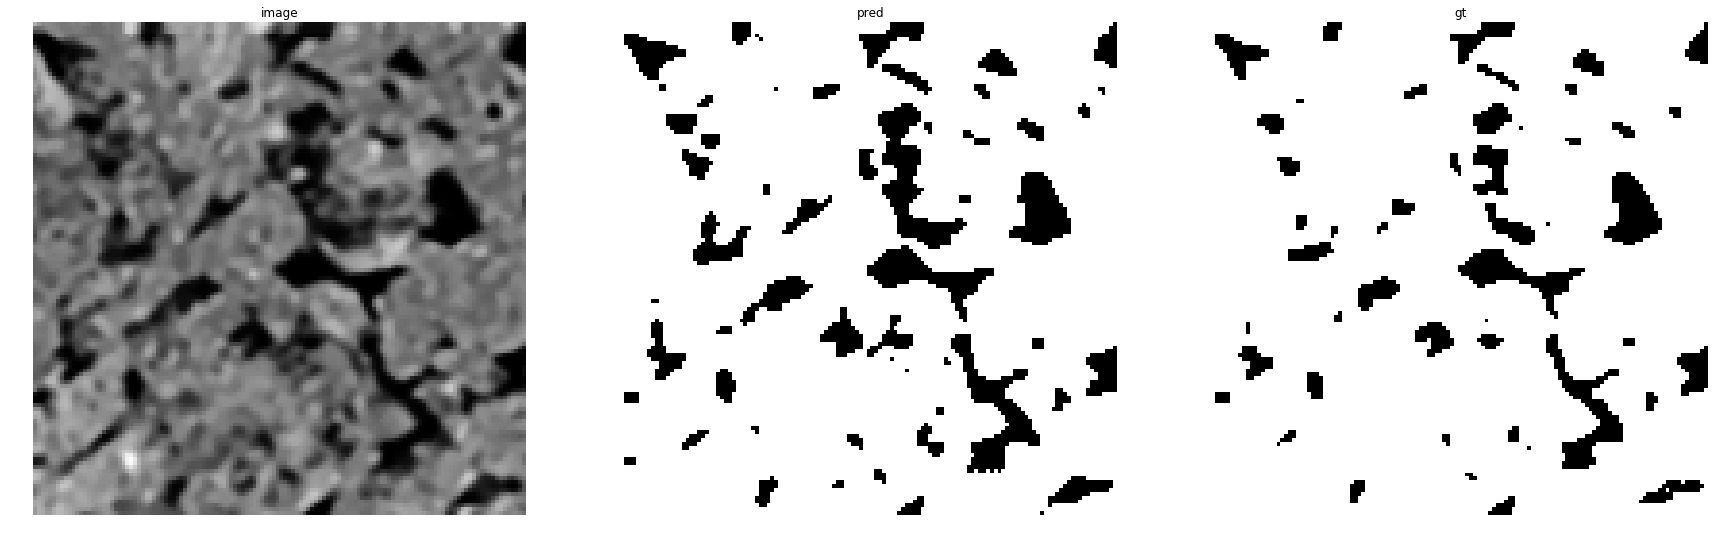

accuracy    : 0.95843505859375
precision   : 1.0
recall      : 0.9537206931702344
f1          : 0.9763122195554628
pr_auc      : 0.9998403656114687
iou         : 0.9537206931702344


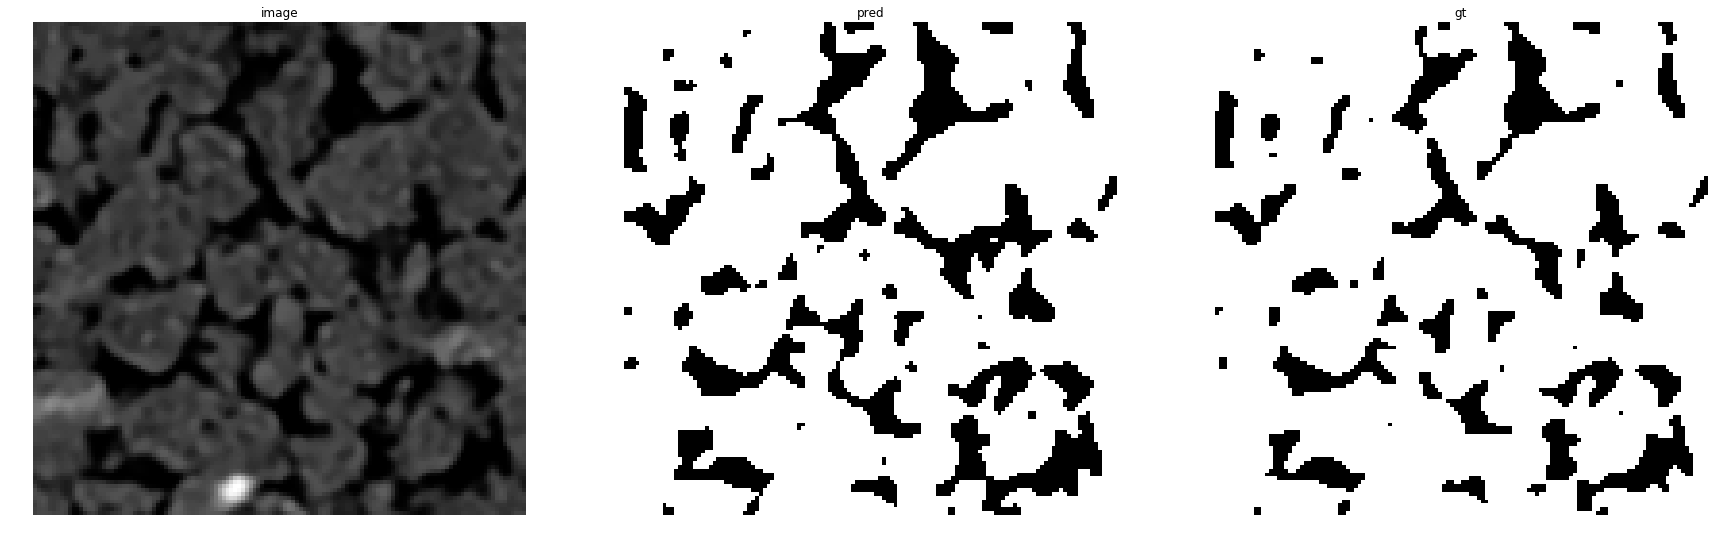

accuracy    : 0.9541015625
precision   : 1.0
recall      : 0.9447180768948026
f1          : 0.9715732970439254
pr_auc      : 0.9997664541815461
iou         : 0.9447180768948026


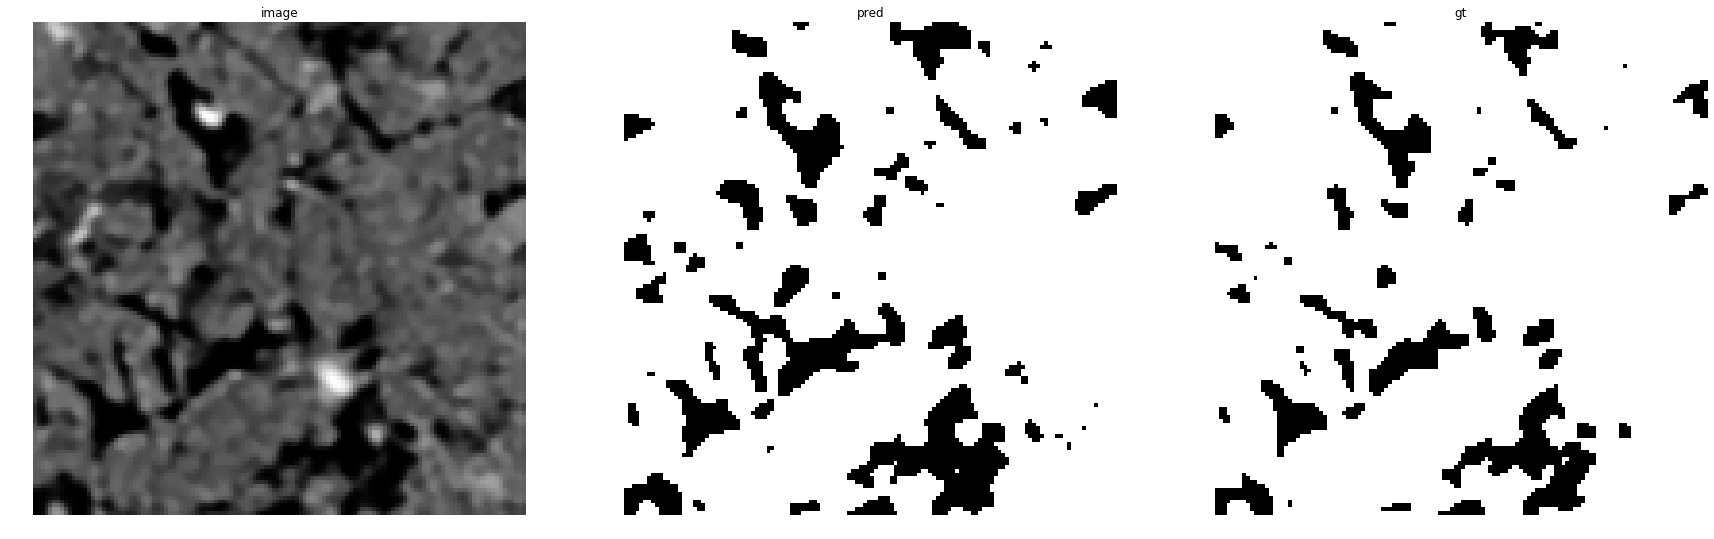

accuracy    : 0.9559326171875
precision   : 1.0
recall      : 0.9499896100297845
f1          : 0.97435350951975
pr_auc      : 0.9998092682331561
iou         : 0.9499896100297845


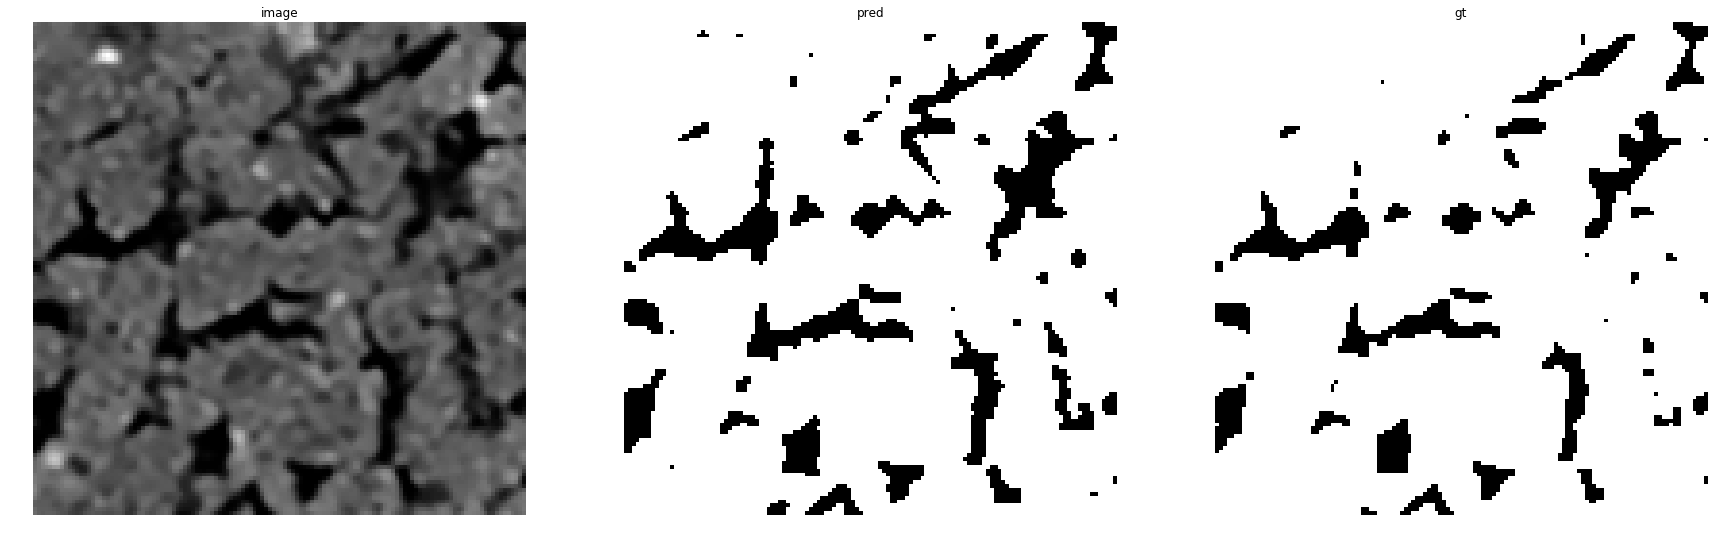

accuracy    : 0.95635986328125
precision   : 1.0
recall      : 0.9509265614275909
f1          : 0.9748460861917325
pr_auc      : 0.9998245390193912
iou         : 0.9509265614275909


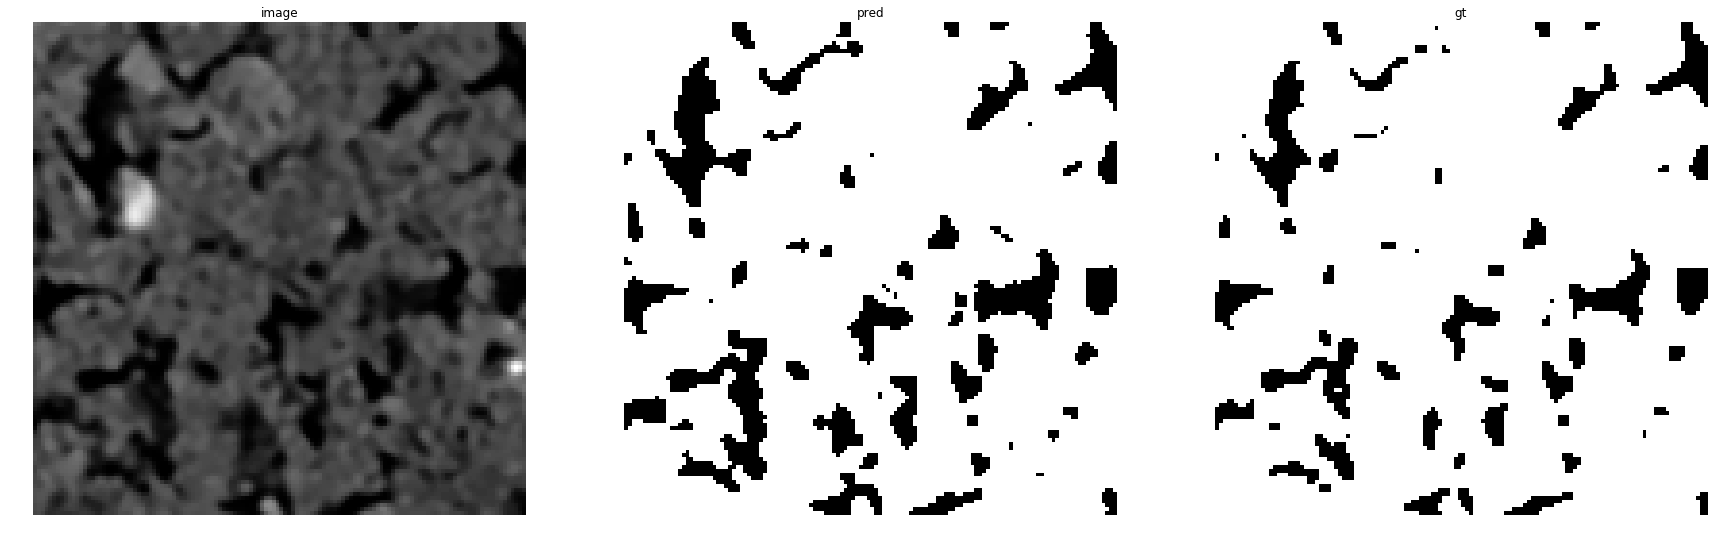

accuracy    : 0.955810546875
precision   : 1.0
recall      : 0.9499204537594245
f1          : 0.9743171337353672
pr_auc      : 0.9998082933376488
iou         : 0.9499204537594245


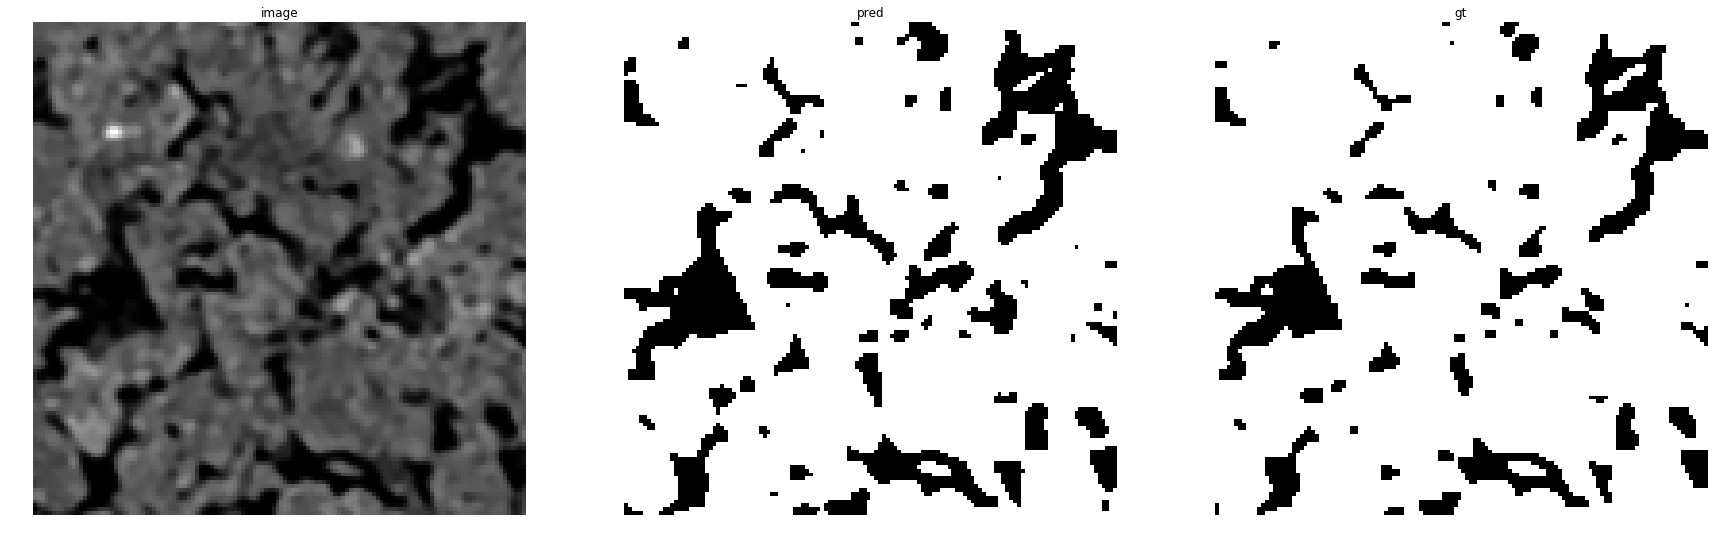

accuracy    : 0.960205078125
precision   : 1.0
recall      : 0.9531070195627158
f1          : 0.9759905729857122
pr_auc      : 0.9998330014400243
iou         : 0.9531070195627158


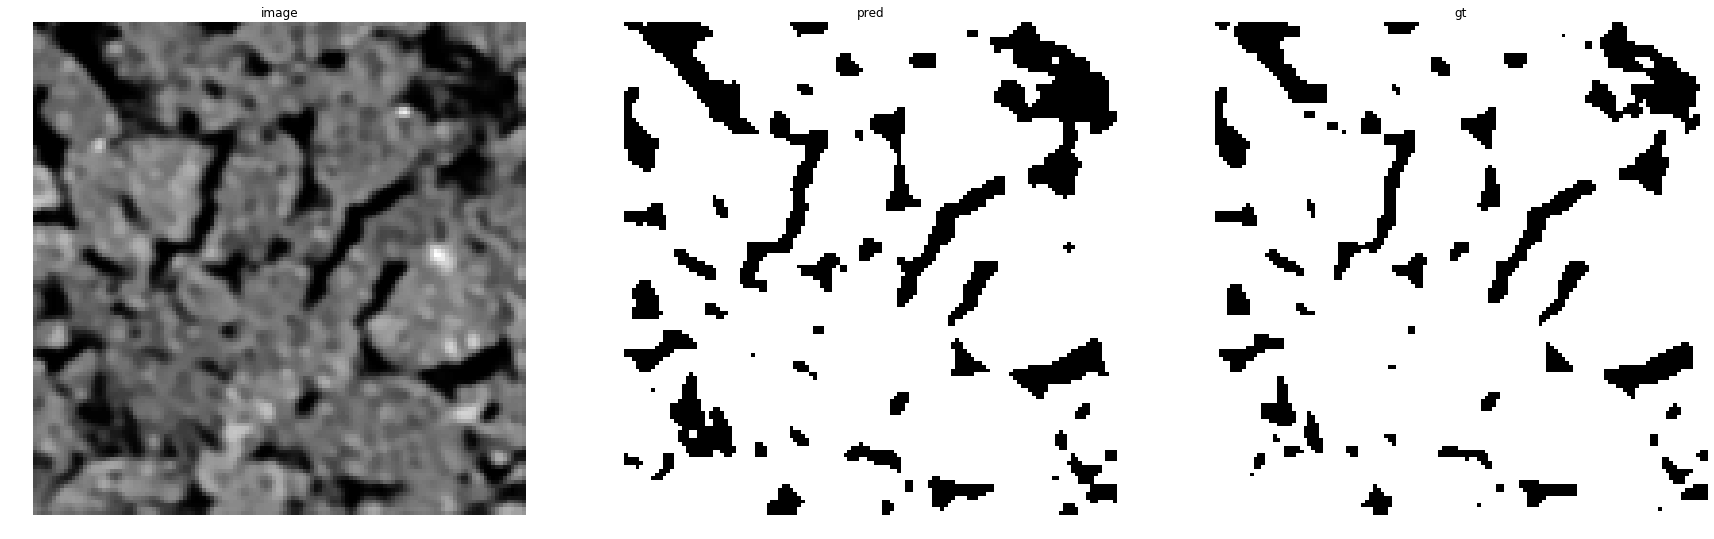

accuracy    : 0.95355224609375
precision   : 1.0
recall      : 0.9462380784175203
f1          : 0.9723764927946569
pr_auc      : 0.9996714290623313
iou         : 0.9462380784175203


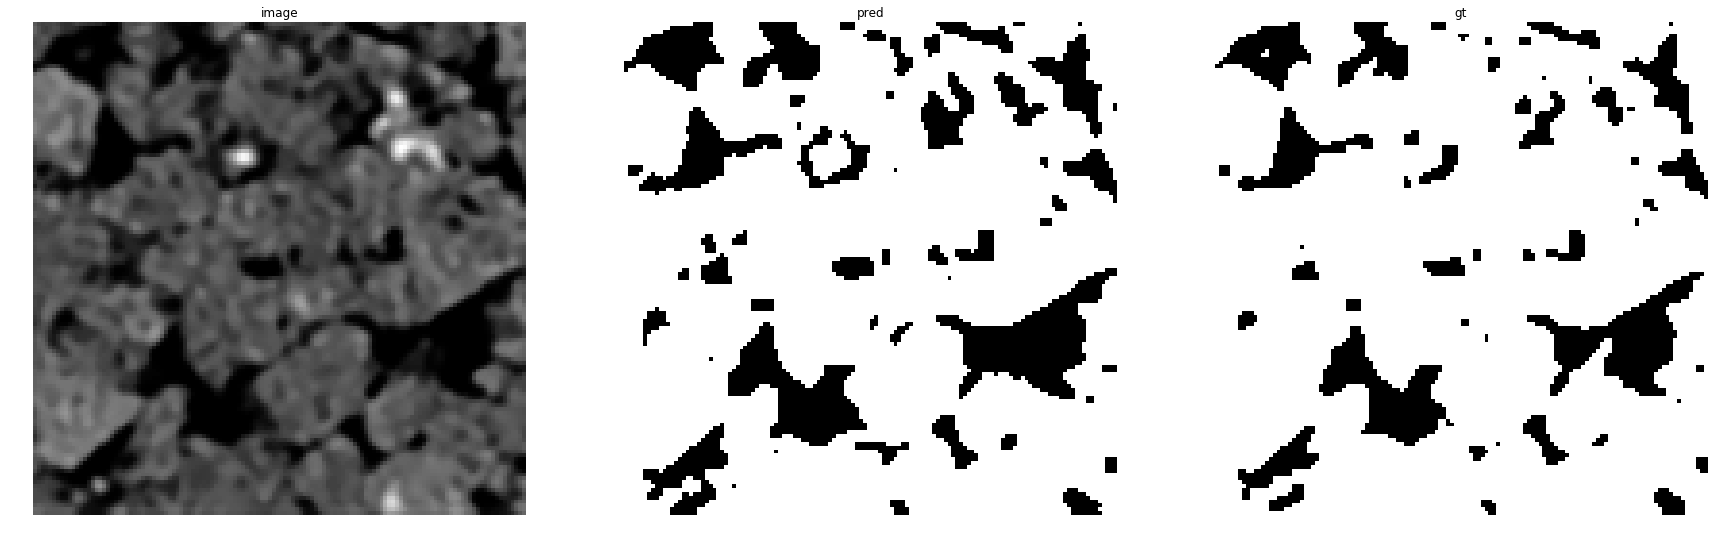

accuracy    : 0.9539794921875
precision   : 1.0
recall      : 0.9450036469730124
f1          : 0.9717242931073278
pr_auc      : 0.9997320428103748
iou         : 0.9450036469730124


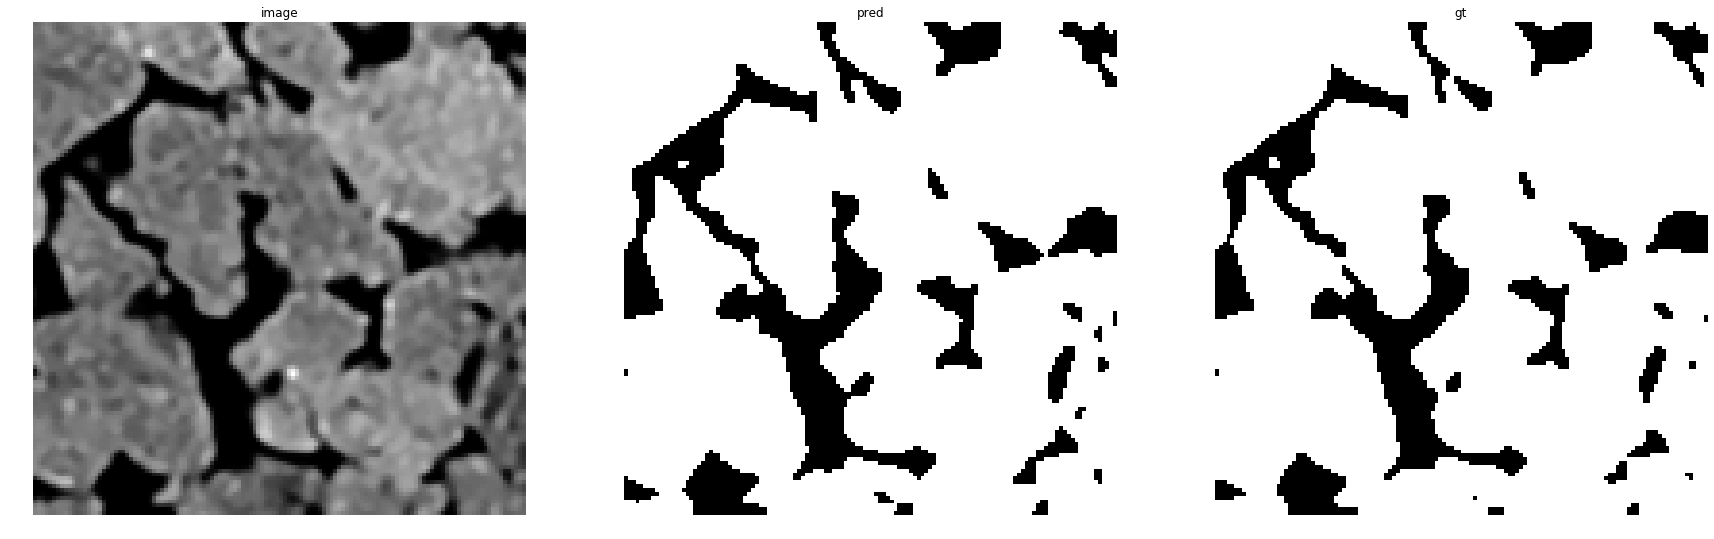

accuracy    : 0.980224609375
precision   : 1.0
recall      : 0.9761009072803718
f1          : 0.9879059350503919
pr_auc      : 0.9999237860756763
iou         : 0.9761009072803718


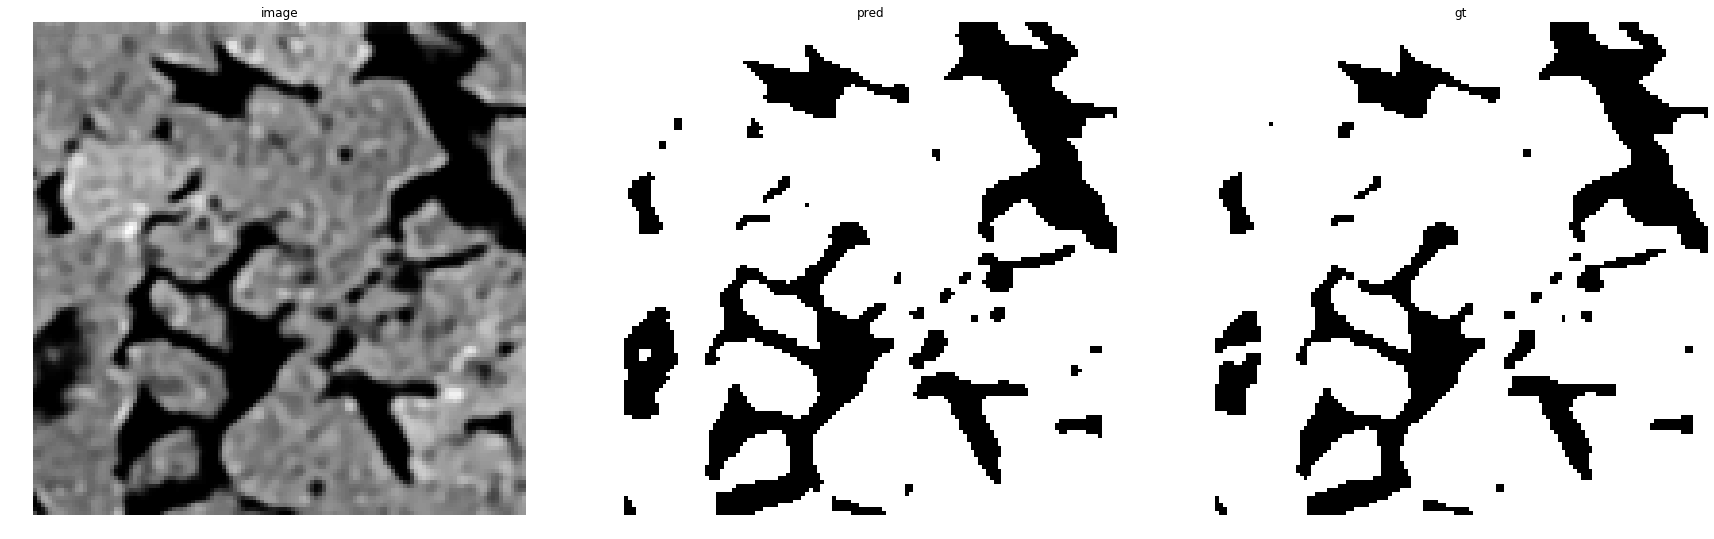

accuracy    : 0.97442626953125
precision   : 0.9999207230061836
recall      : 0.9679226459980047
f1          : 0.9836615324624682
pr_auc      : 0.999832887930723
iou         : 0.9678483732351135


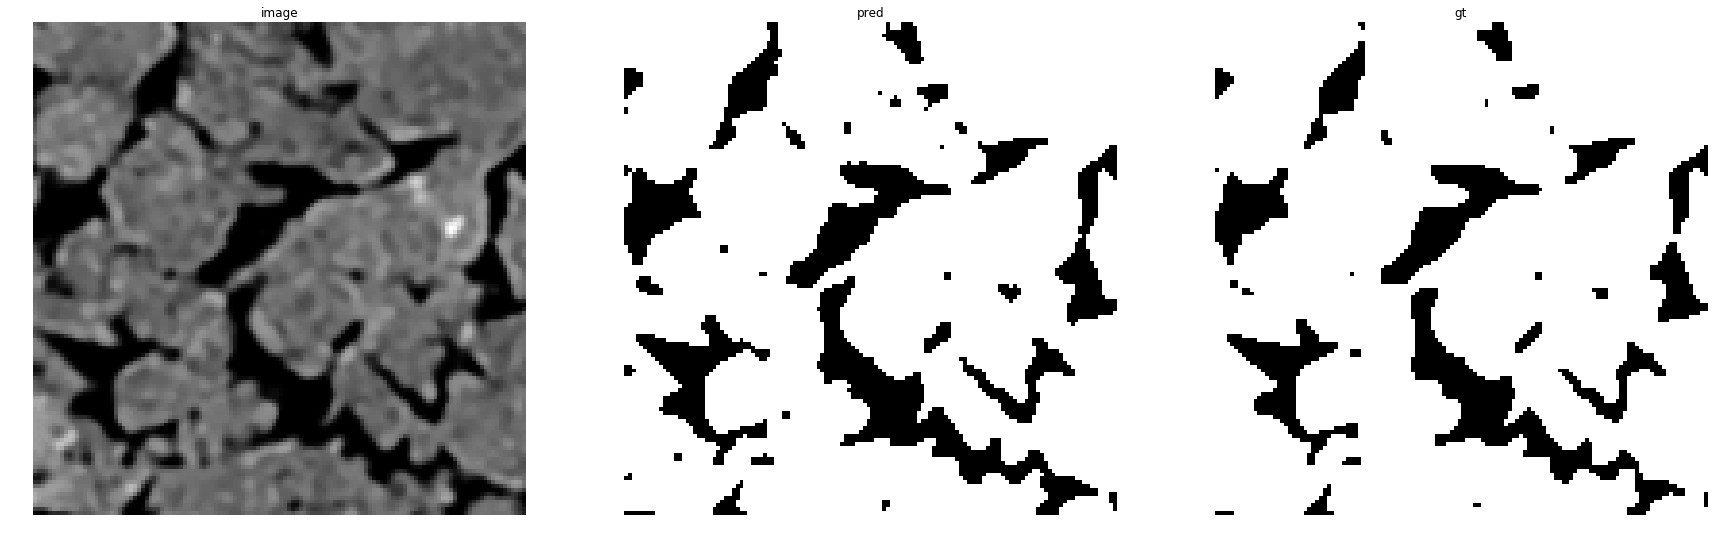

accuracy    : 0.973876953125
precision   : 1.0
recall      : 0.9687932920160408
f1          : 0.9841493222724242
pr_auc      : 0.9999037285541088
iou         : 0.9687932920160408


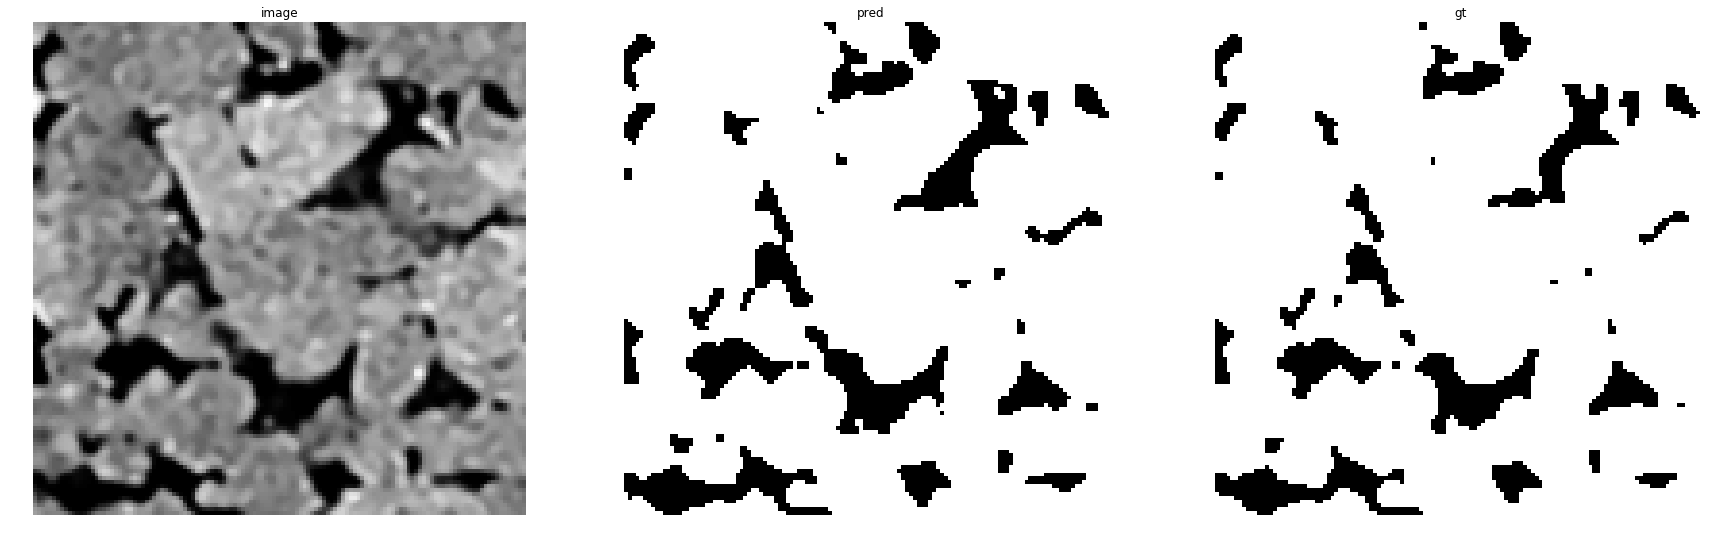

accuracy    : 0.97613525390625
precision   : 1.0
recall      : 0.9724531492179794
f1          : 0.9860342179519234
pr_auc      : 0.9998651470374685
iou         : 0.9724531492179794


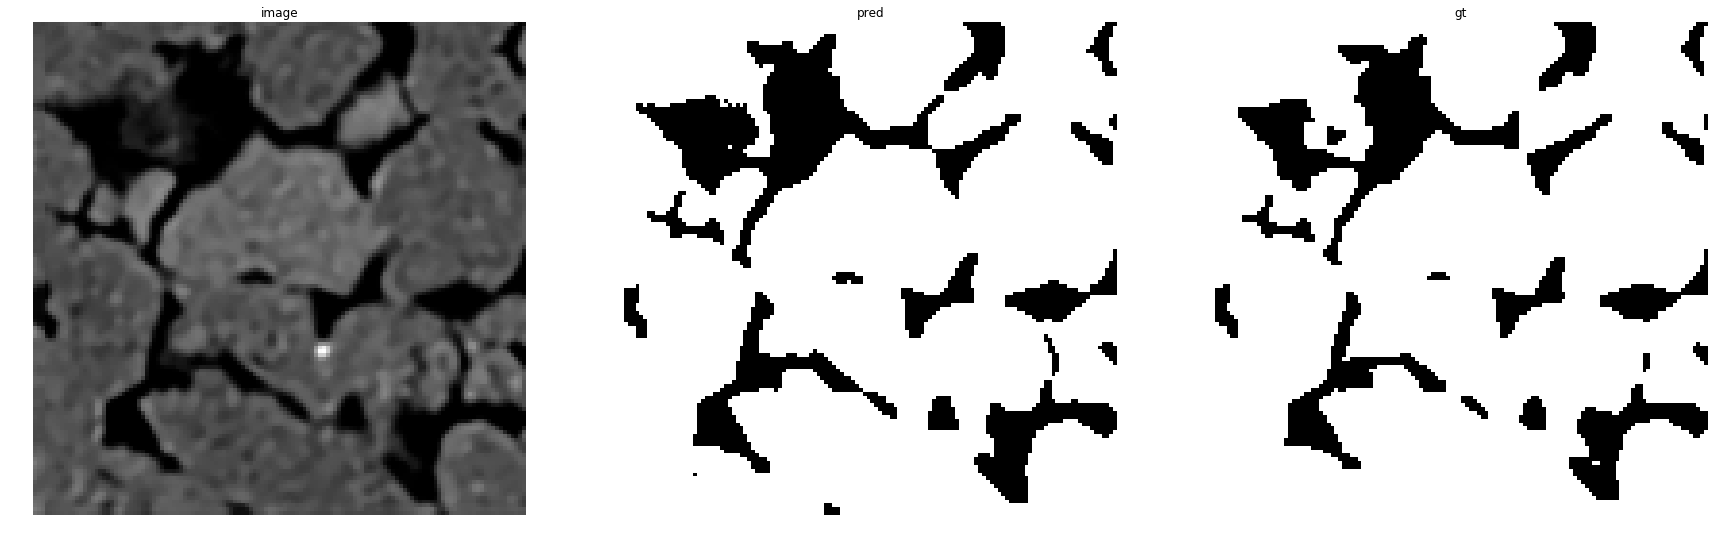

accuracy    : 0.97265625
precision   : 0.9999237339841367
recall      : 0.9670305354772091
f1          : 0.9832020997375329
pr_auc      : 0.9998155593833935
iou         : 0.966959215281363


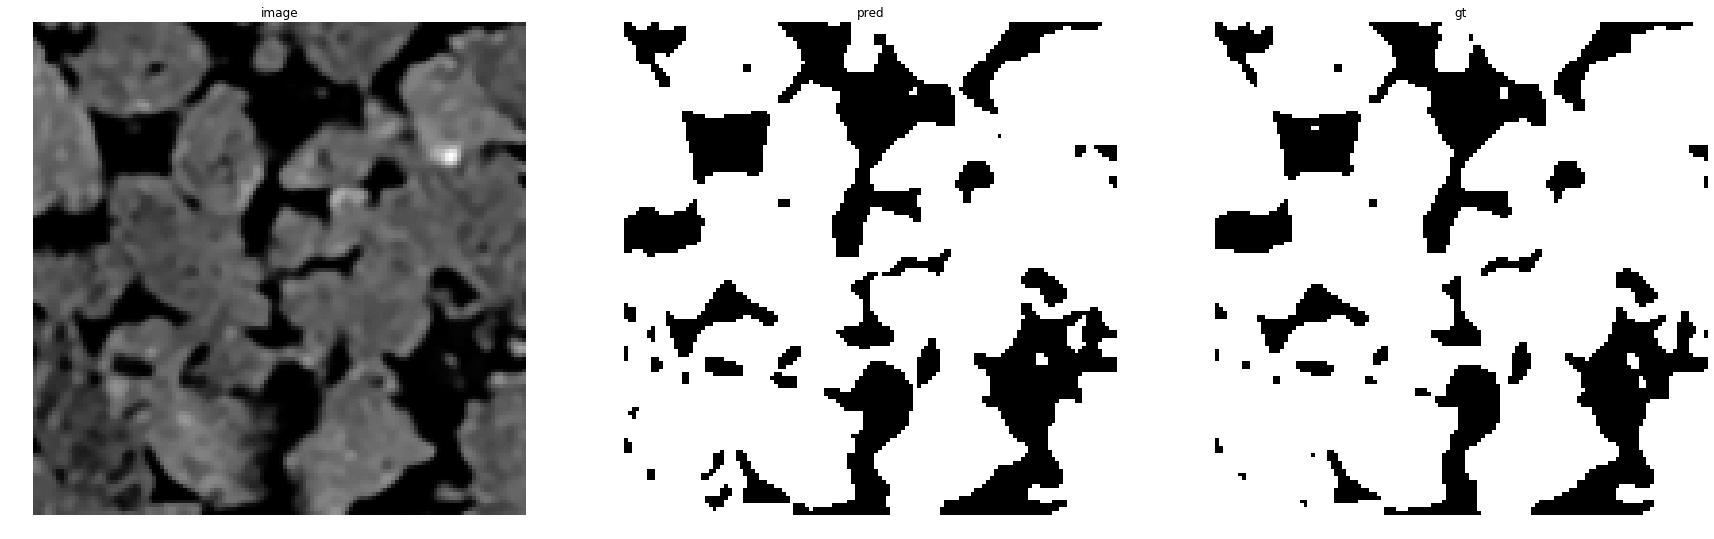

accuracy    : 0.97021484375
precision   : 1.0
recall      : 0.9614076710162119
f1          : 0.9803241674058544
pr_auc      : 0.9998197479889396
iou         : 0.9614076710162119


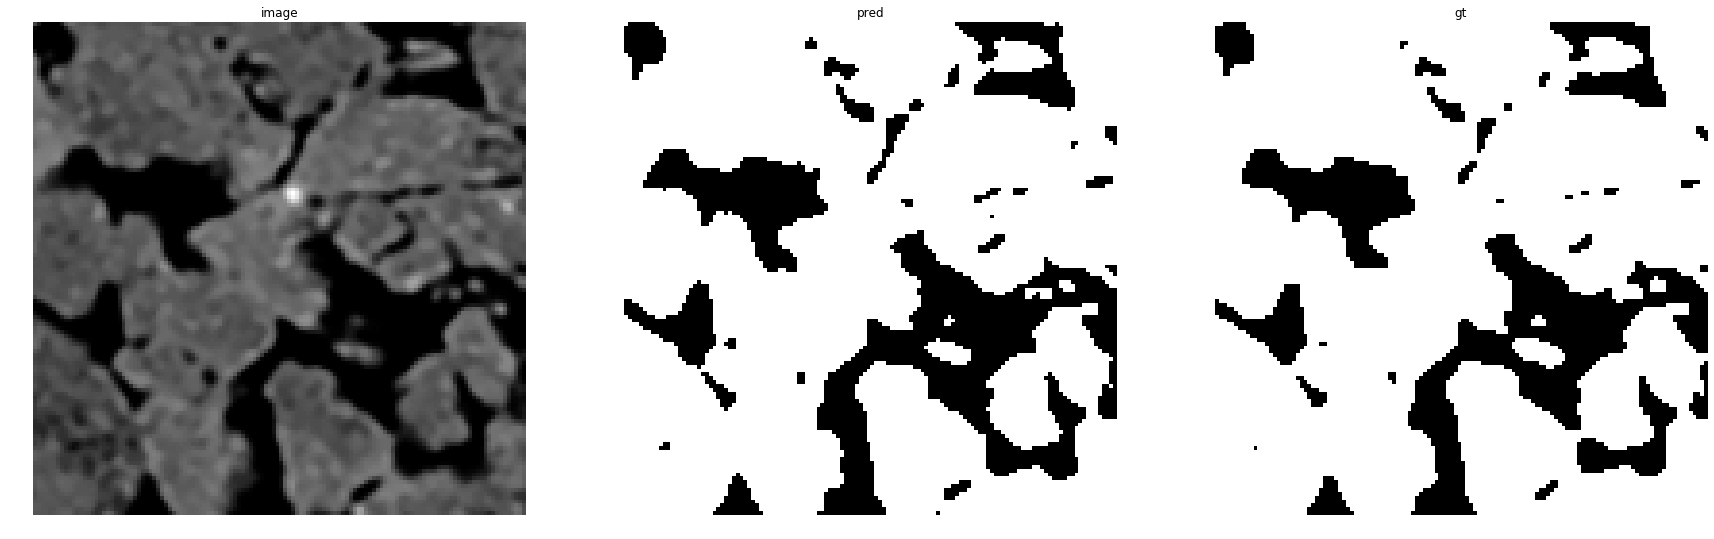

accuracy    : 0.97747802734375
precision   : 1.0
recall      : 0.9714374177567924
f1          : 0.9855117986571911
pr_auc      : 0.9998851567773244
iou         : 0.9714374177567924


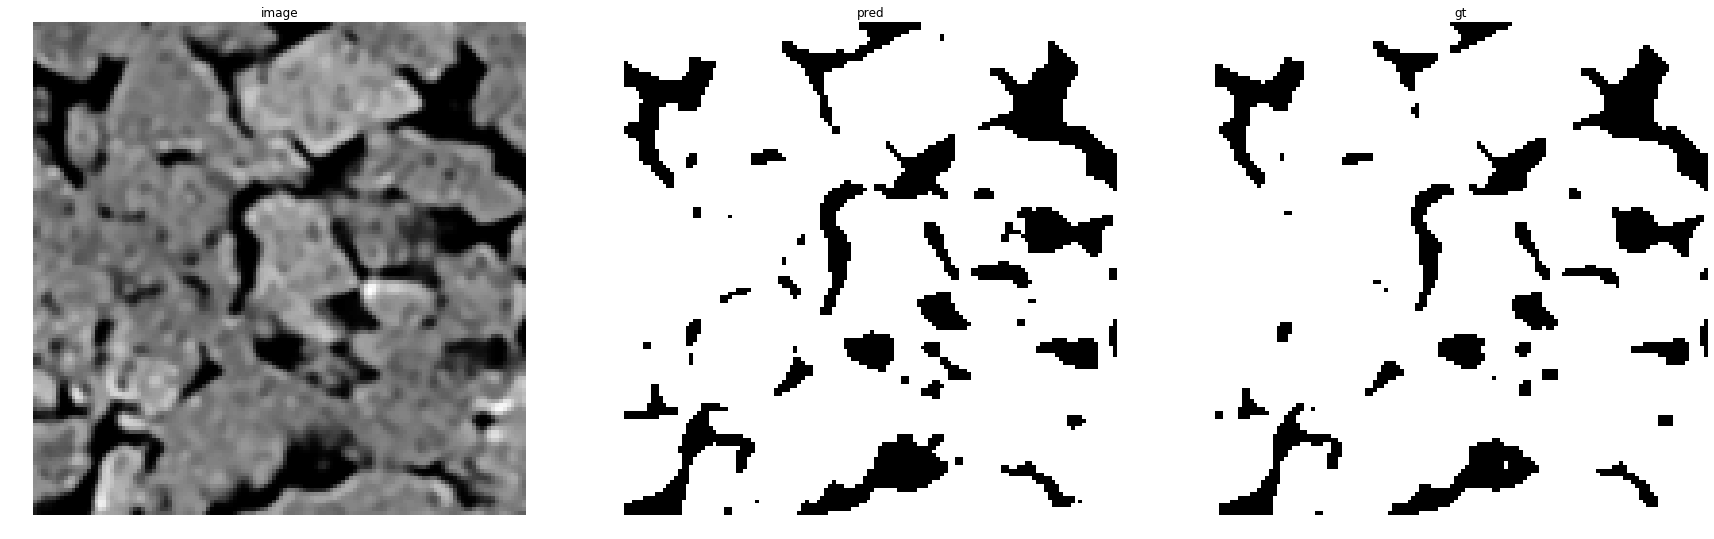

accuracy    : 0.9693603515625
precision   : 1.0
recall      : 0.9641991156753673
f1          : 0.9817732916999492
pr_auc      : 0.9998622843093804
iou         : 0.9641991156753673


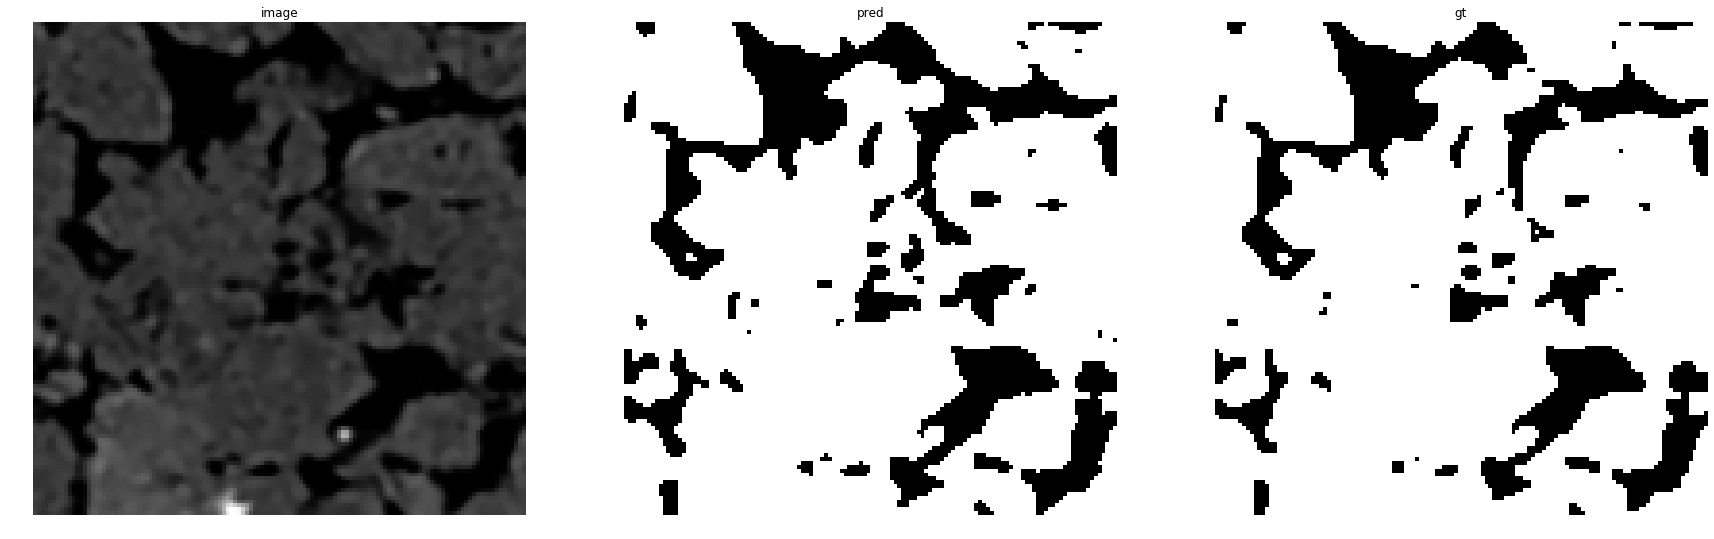

accuracy    : 0.96673583984375
precision   : 1.0
recall      : 0.958409645909646
f1          : 0.9787631999376535
pr_auc      : 0.9997516359092218
iou         : 0.958409645909646


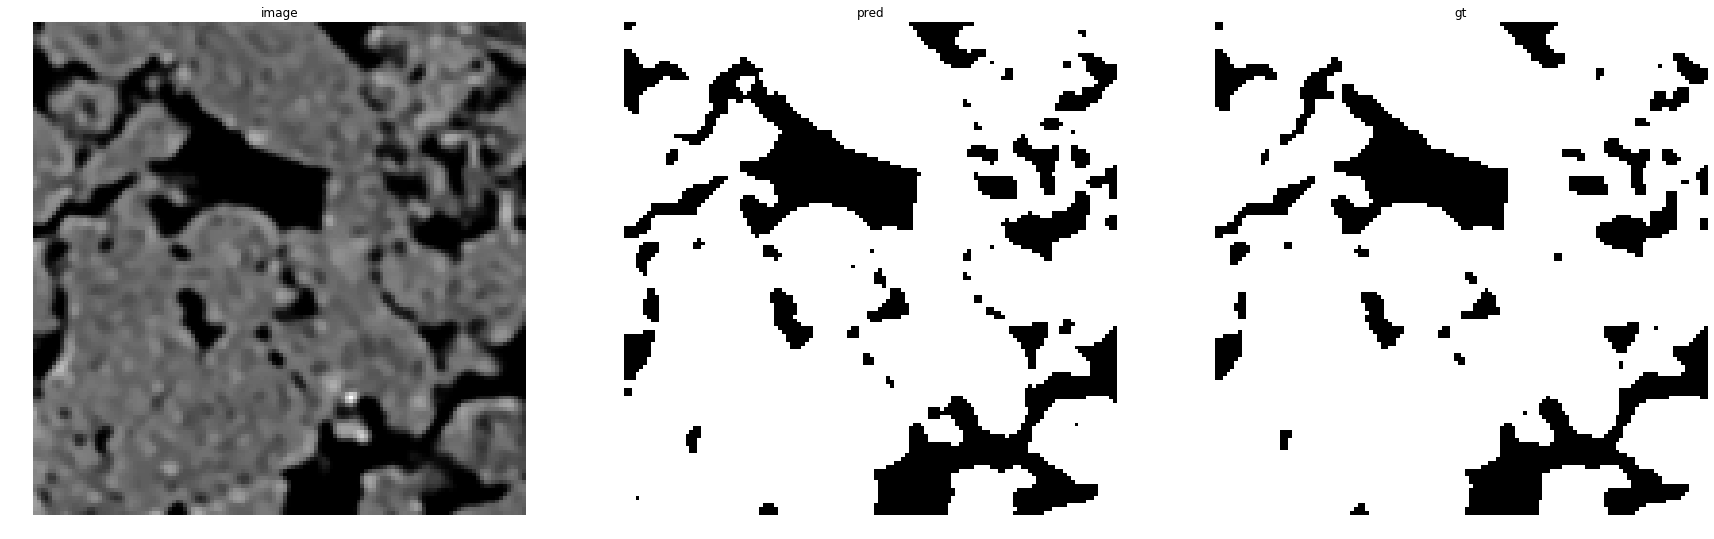

accuracy    : 0.97216796875
precision   : 1.0
recall      : 0.9659879167599016
f1          : 0.9826997496016391
pr_auc      : 0.9998604716302575
iou         : 0.9659879167599016


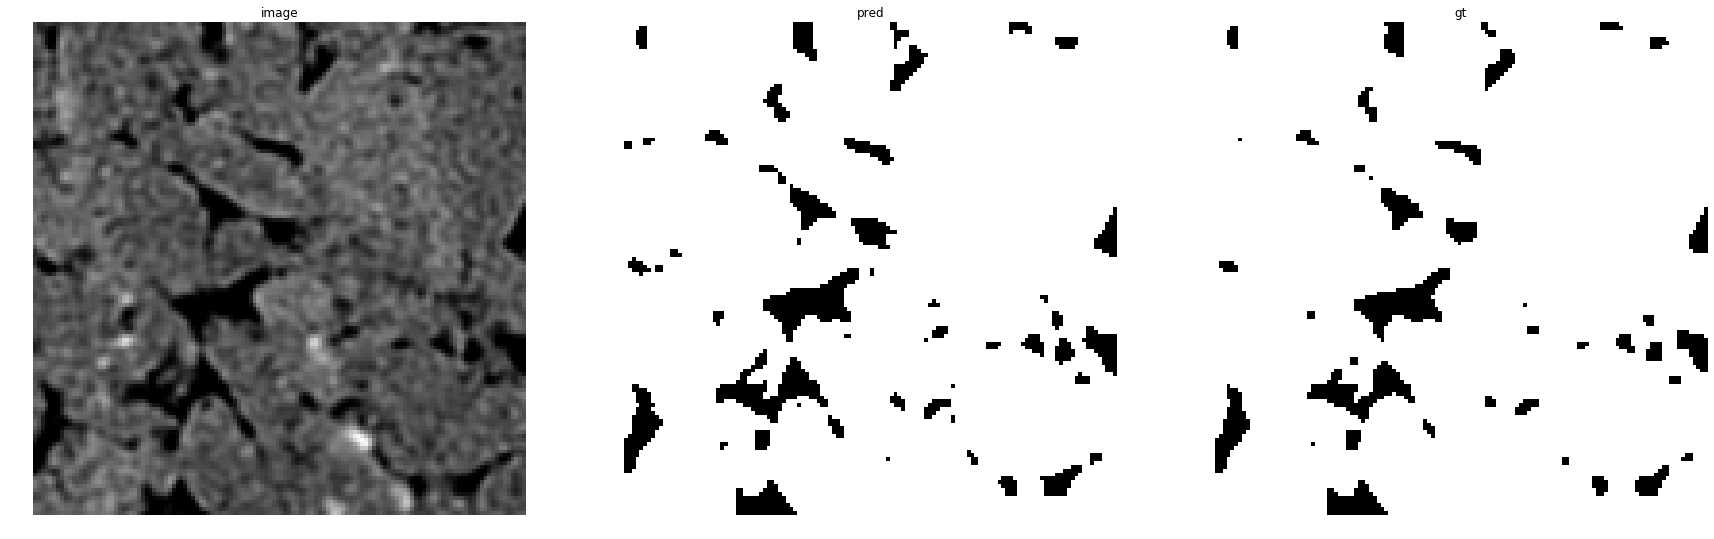

accuracy    : 0.98480224609375
precision   : 0.9997329416477501
recall      : 0.9839017018200933
f1          : 0.9917541477630227
pr_auc      : 0.9999417921137514
iou         : 0.9836431715167838


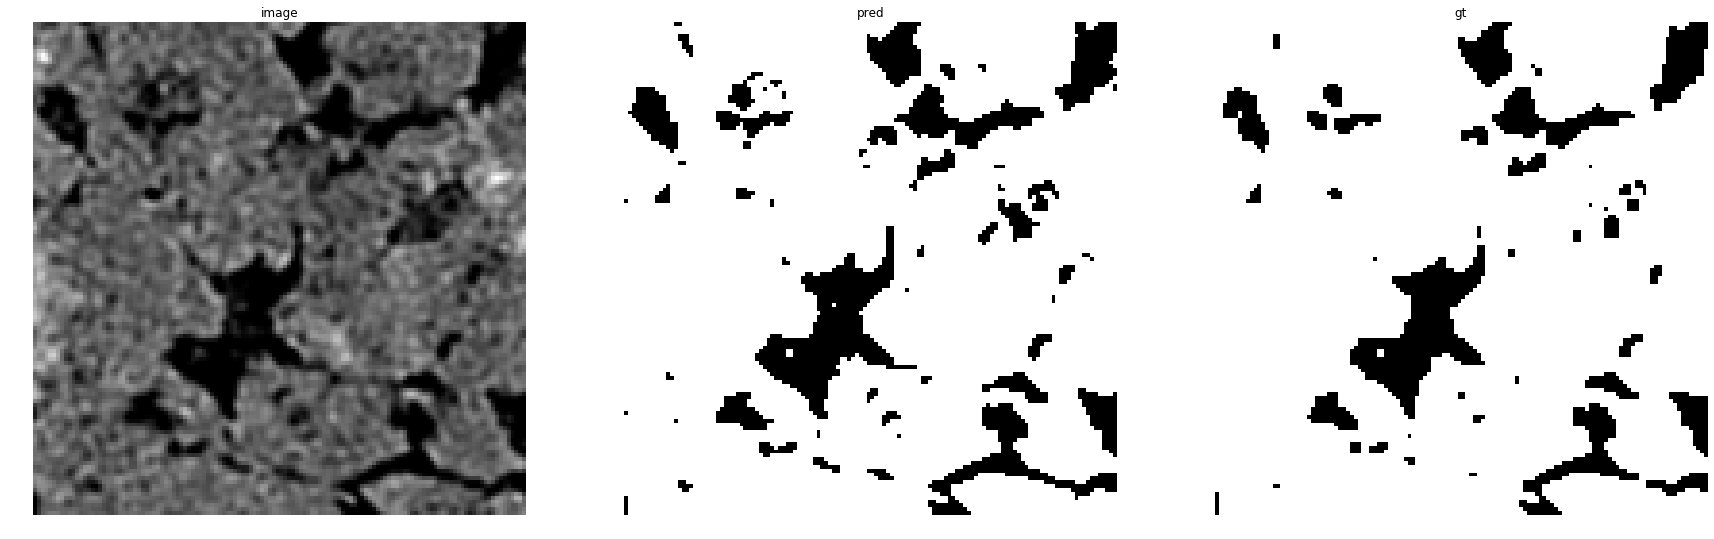

accuracy    : 0.97589111328125
precision   : 0.9995674116798846
recall      : 0.9727075001754016
f1          : 0.9859545567684813
pr_auc      : 0.9998304573553798
iou         : 0.9722981976295673


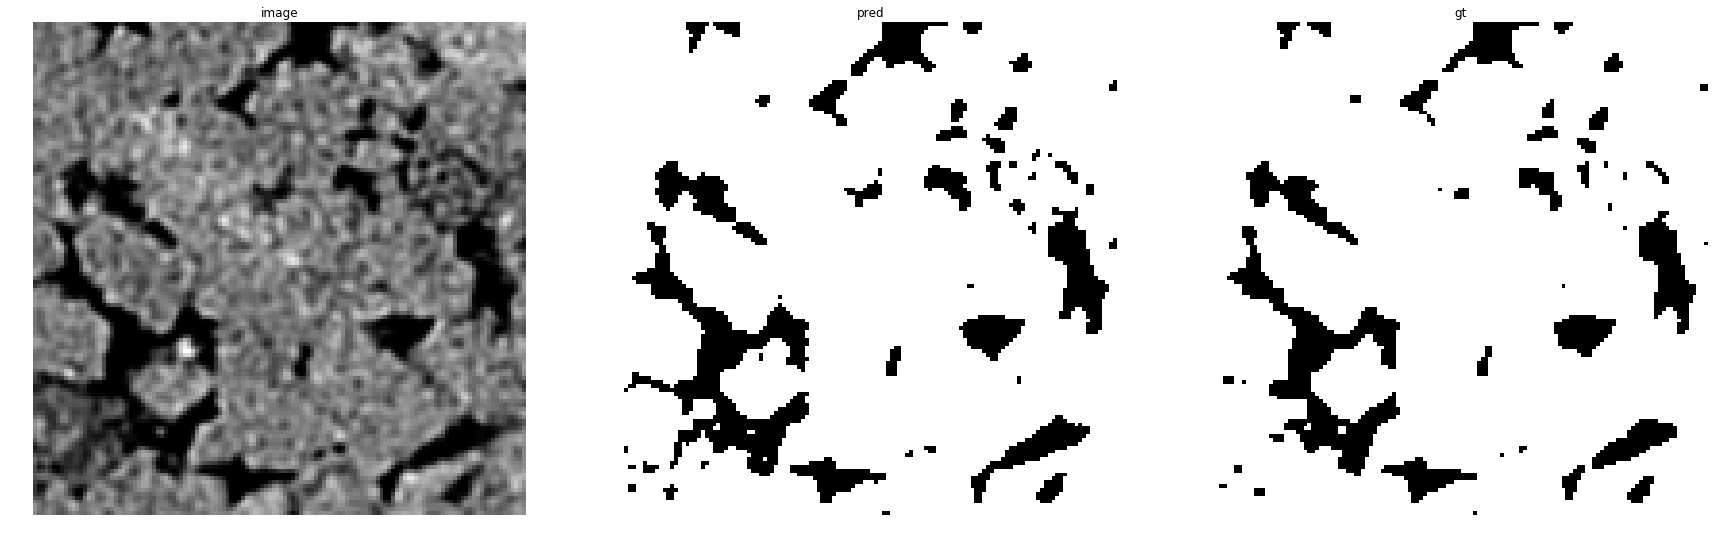

accuracy    : 0.97662353515625
precision   : 0.9990679667335819
recall      : 0.9741349178608878
f1          : 0.9864439174600927
pr_auc      : 0.9998308998879091
iou         : 0.9732504539740188


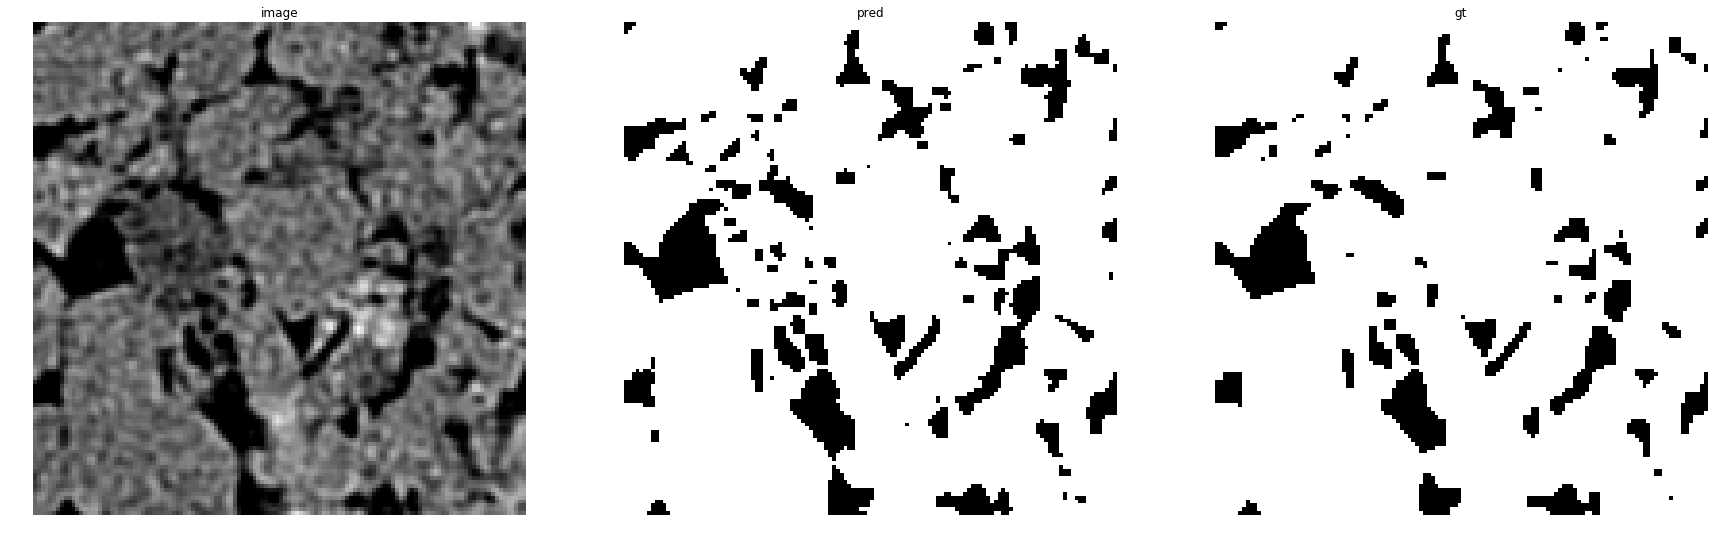

accuracy    : 0.9666748046875
precision   : 0.9994914269107817
recall      : 0.9622971460548405
f1          : 0.9805416963649323
pr_auc      : 0.9997459144714589
iou         : 0.9618261903097253


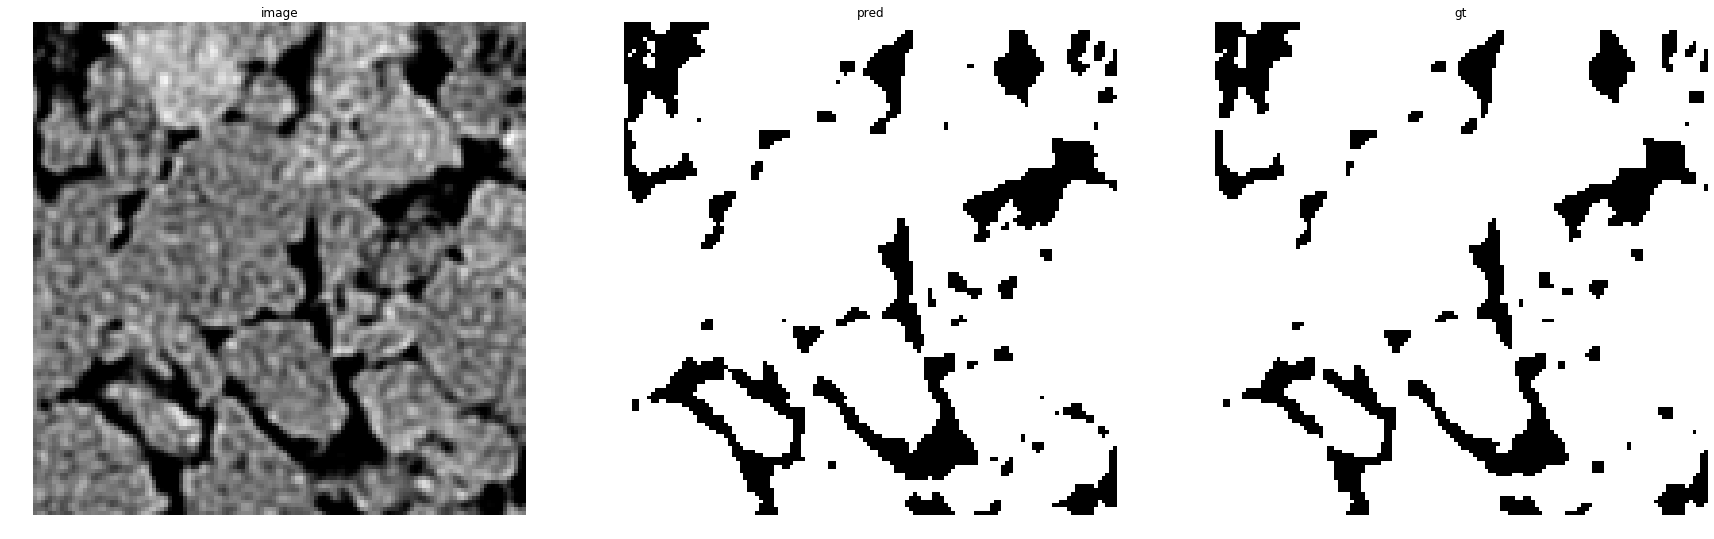

accuracy    : 0.975830078125
precision   : 0.9994833567052919
recall      : 0.9720766635560979
f1          : 0.9855895196506551
pr_auc      : 0.9998329197742086
iou         : 0.9715884631941455


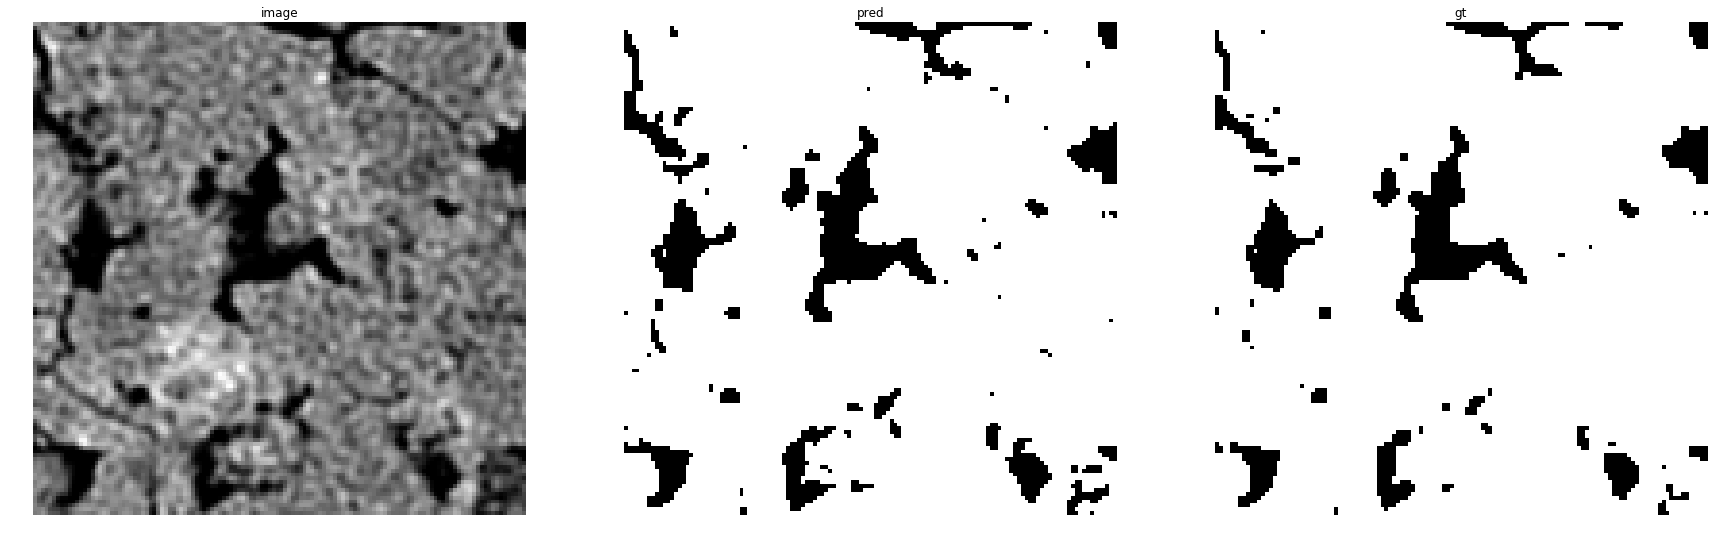

accuracy    : 0.97808837890625
precision   : 0.9992359519344308
recall      : 0.9763811592235645
f1          : 0.9876763585184167
pr_auc      : 0.999878898967377
iou         : 0.9756527636486945


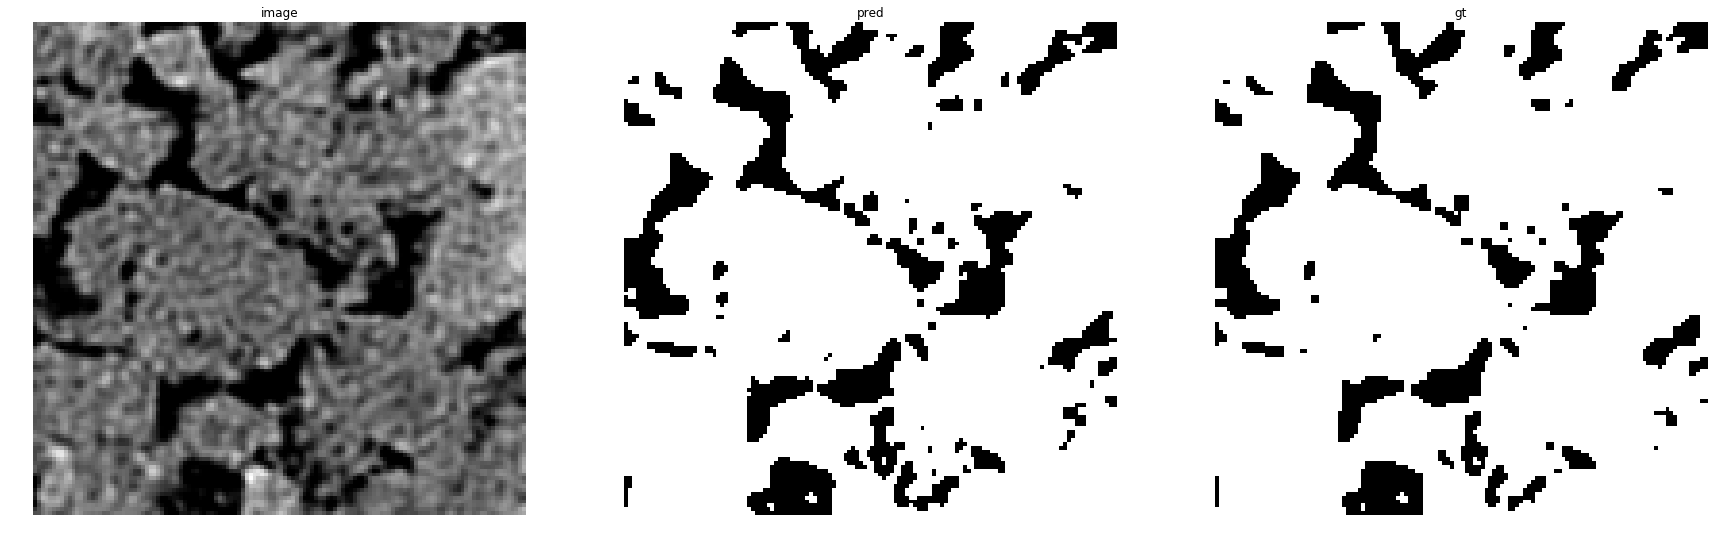

accuracy    : 0.97576904296875
precision   : 0.9992548990388198
recall      : 0.9719524568778084
f1          : 0.9854146000955215
pr_auc      : 0.999785462945721
iou         : 0.9712485515643106


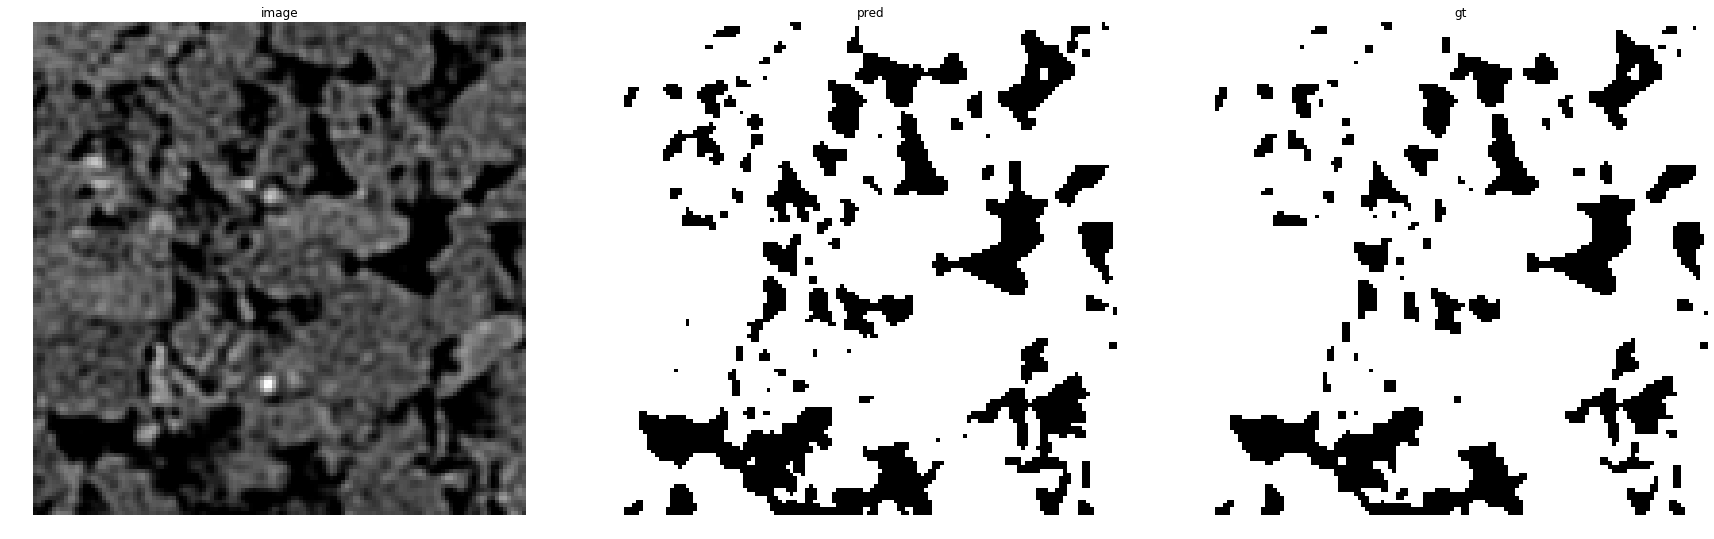

accuracy    : 0.96038818359375
precision   : 0.9993734335839599
recall      : 0.9521677486754719
f1          : 0.9751996637242539
pr_auc      : 0.99957123164484
iou         : 0.9515996718621821


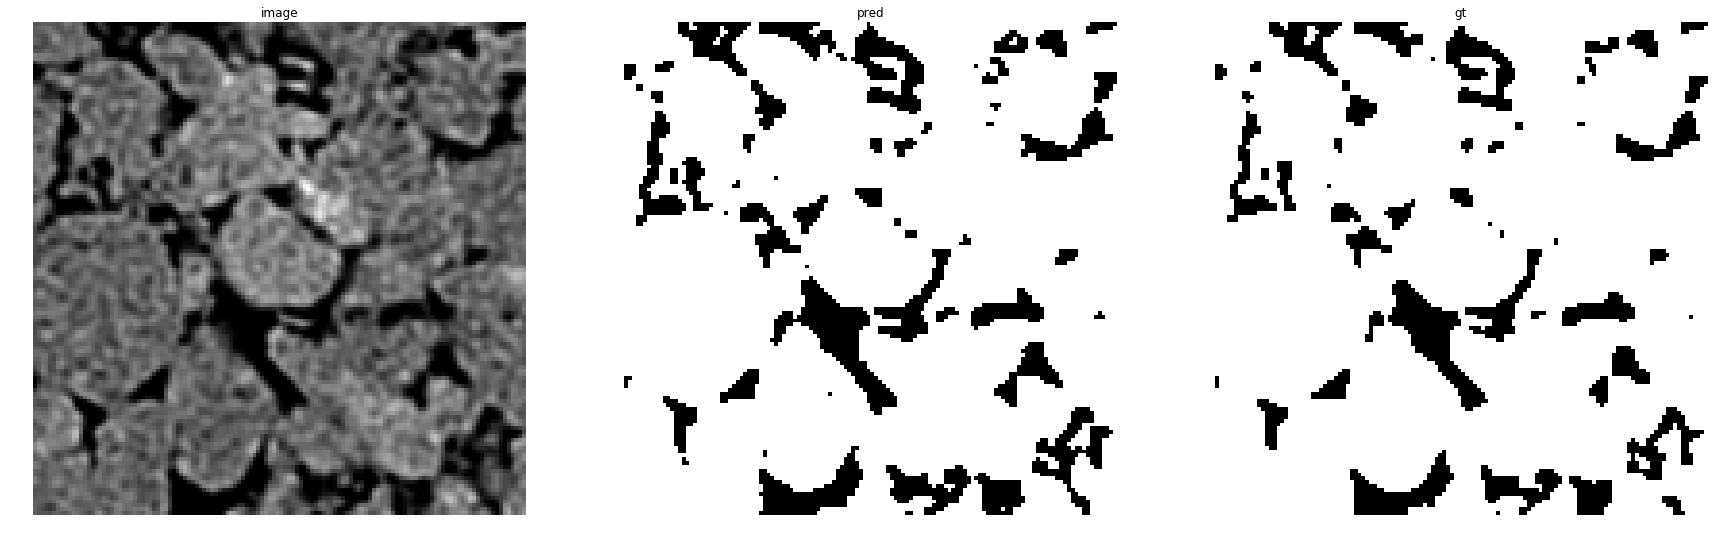

accuracy    : 0.9718017578125
precision   : 0.9986068338466051
recall      : 0.968496657658939
f1          : 0.9833212996389892
pr_auc      : 0.9997129303195447
iou         : 0.9671898302677366


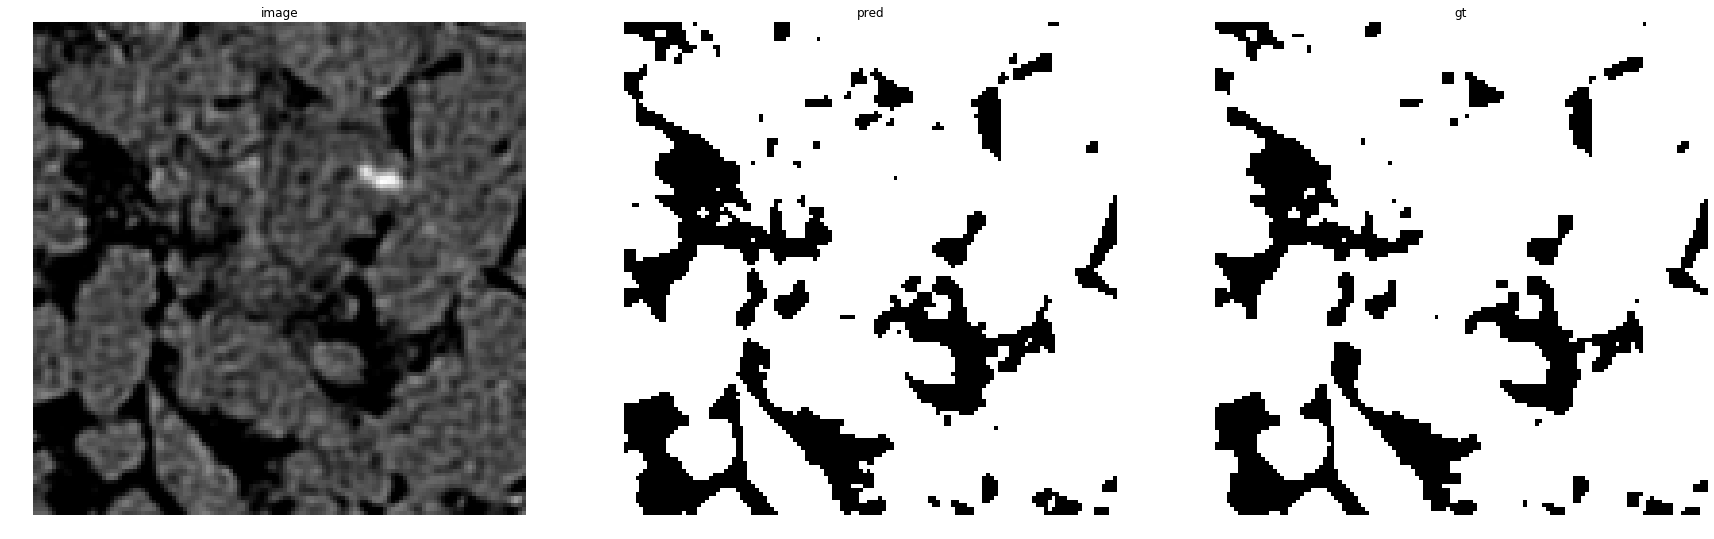

accuracy    : 0.96881103515625
precision   : 0.9985197880959801
recall      : 0.9630325343752348
f1          : 0.98045515394913
pr_auc      : 0.9996225367334699
iou         : 0.9616596638655462


In [27]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [12]:
stack = Stack.read_from_source('../../data/Urna_34')

700it [00:01, 693.91it/s]
100%|██████████| 700/700 [00:07<00:00, 94.66it/s] 


In [13]:
predicted_stack = stack.apply(model, 
                              patch_sizes=(128, 128, 1), 
                              bs=32, num_workers=8, device='cuda:0',
                              threshold=None)

25200it [00:00, 234165.00it/s]
25200it [02:00, 209.65it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3196.99it/s]


In [14]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                              v((predicted_stack.targets / 255).astype(np.uint8), 
                                predicted_stack.preds, 
                                mode='stack')))

accuracy    : 0.974142
precision   : 0.999086
recall      : 0.970331
f1          : 0.984499
pr_auc      : 0.999783
iou         : 0.969471


In [18]:
predicted_stack.dump('./Urna_34_{}'.format(data_conf['conf_name']), features=False, targets=False, preds=True)

100%|██████████| 700/700 [00:04<00:00, 173.70it/s]
